<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025/blob/main/FICCD_Claudomiro_ativ_02_Z_Score_Binomial_Dist_Raimunda_Branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 2 - Z-score e Binomial Distribution](https://docs.google.com/presentation/d/1b749DbNJmSCVaVJ-F9kYw2lcjAJ4pAVKf0-KBKWOxNU/edit#slide=id.g34Clay_Percefd0b8b_0_0)**

**Belém, 23 de abril de 2025.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import kagglehub as kh
from scipy.stats import norm
import math

#####**A)** Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

Contexto do **[Dataset](https://www.kaggle.com/datasets/lauroliveira/enem-2019-dados-tratados/data)**:

Proposta: Análise de dados da Secretaria de Educação.


* Como foi a performance dos alunos em 2019 no Enem?

* Dados reais de todos os inscritos do ENEM de 2019, para entender como os alunos performaram e extrair informações e insights tal que a Secretária de Educação possa agir e aconselhar as escolas na metodologia ou no foco do ensino.

* A Secretaria selecionou algumas informações (classes e features) que julgou reviamente como mais importantes.

* Os dados em csv estão tratados e possuem mais de 5 milhões de linhas e 21 colunas ao todo.

![Screenshot 2025-04-22 124932.png](_Percg1bViDAv6Avw+qyQLAQzx6EppfX8dR60Q0MLebzHyFr0OaNYYdaZY5+tHXfwR+vAzLjUfAKRMhhBBC6peKC6VNy18E8Ed8/ZX7SxixI7/QGPkzbZX+4Q/Sg+U/YvuPnVsIIWRR8ghf/9ERIP/4L+hxClay_PercSt8F1Nv8AFOQ8W//mvAnac8pnlIs09Ekmdo6WATAghhJBFS8WF0iwnnBN/++fa0YUQYmvFQ5wdkCpo0g6Jce8IIUsKeRpZeMk4RzTsQO2PaUaxAnvPRb8JVdi/ijk5rRZZ5ugVqOlrhBBCCCFlU3mhFK/jp0l2PNKGFD9ZJ2yTXl4W8AwJ4NPPcT+k1pXAo5K37gMnCAAwcwt3Sn0UIYTUIRMX/gVFqLieK7DxlR9re02ToFdcA2EvqhwmiXle2alGRF7PMxG3iSlPR498mm2OXv7Sj4E/3sVNR0134rM/AHgRy5NsOAghhBBSc6oglAJtf/eP2P7jP+Dv3RAC0otiET/BL5VzjKZf4D//BCj+8/9uXPspjvzDHwDXuYUmIPh++h7+3tA+y4Z0AGIt0OTOvHUdIYQsPmY+fAt//wdg1d9EDoqa3tqJVfgD/t70bj7zEf7un/+oQ3nZ4bUkcqNwlfR+1LZLxJzuMQTQmQ//d1z544+xfVdw4g7wOn7+lz92POlGp6M/fz3bHC3K9EdcGTDKJN8JseHJCCGEEFI3PDc/Pz/vfqn4+skc/tcX/hf368zMfPgWev7ZPnIs/OU/BtSv/Gvt6x7i7J6/wpUX/xpj2tOj/E7d8uO/wNCbj9HzD0+w/Z8+xN6m0D12qAPhjMN5DoBVf/Ov+Olnf46//8NP8EsGaSeELClay_Perc//s2fSp9z9WZfiLg5LDzvmSFb3DkZgWtEKJb/ivv6fyO9T99Dh56PozvEc1+08yXnZc1PEub62Dnave7HXtqEEEIIqR3//s2f8J+e/wFe+NEP3Z+qK5QSQgjJTi6hdKkw8xF2DQB/a4Z1IYQQQsiSIUkorYr6LiGEEFISXz1G8Y//gp4Eu1ZCCCGELE0olBJCCKk9r7+Hsf/x11jFuKKEEELIMweFUkIIIbXl0/dkLNT/ivs/2Uk7UEIIIeQZgzalhBBSJzzTNqWEEEIIWdLQppQQQgghhBBCSF1CoZQQQgghhBBCSM2gUEoIIYQQQgghpGZQKCWEEEIIIYQQUjMolBJCCCGEEEIIqRkUSgkhhBBCCCGE1IzUkDCEEEIIIYQQQki5xIWESRRKv/n2u+BNhBBCKg/nXEIIIYQsVb759jsACK51qL5LCCGEEEIIIaRmUCglhBBCCCGEEFIzKJQSQgghhBBCCKkZFEoJIYQQQgghhNQMCqWEEEIIIYQQQmoGhVJCCFlSTGPojTas29CG3jH3N0IIIYSQ+oNCKSGELCXGPsKluZXovzWBEx3uj4QQQggh9QeFUkIIWUJMrfgFPr91DJvdHwghhBBC6pTKC6Vjh7FuQxvWbTiM6+5vdcDUUJfI3xvDmHJ/rAdk/XUOTQOLIL/X+4Sa4Lq+G+5Pqbhlu96X7zmYGkZnzjwQsuhR/V9+9nTv03/rT0XHxtJVDxZzUheG6nGy1cj6L6lNpzH0xkKX6wZ6K9L3xHPUO7G25Kh7Y3z2jqn/q9kWlar3LOSoj8WMM9cGP6ou1LVxazf5e9Svo3k1/qPW1bKNU/vRQvYFQsqn8kIpKYNpDF14AKCA9e3N7o9LjGmM3ylizaEJfP7xCpzd0IaB+8CajZvcC9NpacP6BgD3Tyy5RTIhWWnYMYzPb02EP4M5xlUcVA+uMc3o+bjENh37CJfm3C8XC5tw4tYERnvq4Z1Yet1f//AK5lb14vNbw3j5QhvWdV/B3KqfoafFvZIsFkqaa+euoL+UDZWG7TjnPlN/HA2YBuB2d9wB0A30bjiBu+7XhNQxz5xQ2tJzUQzuj/eh7t4JauHQsBbtdZe5MJsHYybiVMTLXSxqxaLj89yL3Ga0ry0AAO7e5I4gIdWE6sGEZGfzoHo/SoE21/uSLGbmLr+XcqKZk2Vrsb7hAW6GNuPHbuHuqpVY435PSB2zIEKppeKp1XvFx1XJ0Sqdxid0+uVfZ+4WKdWGNvSORX+ve2MYn8aqwxrXxeQtdE1QLSKg4hEqg8v1mw8AAA1r2xIEZrNsRt1uaAuqcti/h68Jqo2Y5dLl6cLQmFG2vhvx6rtOOwfTDdSTX+dpbS1oaV+LBgC4/1s/HUJILGJ8HcZ1ZzxaY3HssB7DLS3qxErOG2oulfdbc66eG5w5xpt/A+PcmlPE/Z1Dw9Z8rp6RfG889vx4GOPuBQjMZYG82yTl1Z9rQ+8GN1/XjfoPqky6eTTm26mhLqw7/gBAEZe61X2ijXqH7PlckC2PHl7/eeheAXhlk+VzL7Kw1Xcz9Vck10nsNV6dHsaQ0Clay_Perc6xwJ1H+h/bl7c34N58dYXoWsCePUQrncvD5nGiJunlPusfqpw5gmj/9p5cu9DIP3QNTaZ+0fefl4iDTt6sbOhiEvvps0beViB9rWF4Gb89ZuPsfOtDe7XhNQ1CyKUau6fkC/HiLnL+/REMDXUhT2Xi9bvAHD3uD0RXe9rC1z3AAOBl9vd45H6QsPaNrzk/A6oSd1Xc5i7vM+YyGJUIe6fsCbpqaEuoZ5jXQTcPR6aFE1u4OZ98dfLTdnUlO4eFyqvEUVcMlQ5rve5v8O7RpRrn6/a5ZRLUMSl41HZ4lRto0WQSRGXuo12nBpGZ6Ce7DoXL41wWzsvp5YVeBkAUMRX4XcyISSWBxh4FxiQGgvndhSsubkU7h7/LV4ekSdCh1aKuWTDPny1S6mg9WLN3BXsMeYXMacDO9V9t3qxJjAHzV2+AhyS10htl9h7E4VHMbcM3Clay_PercqyCKvwCVnrlFz2RqV5q1h7MQV7El8tsDPq5xrYajnHVqJu8fNxXA4XwPefGowdtjJ4wTO7YCe51t6Lop2QEHUkXFKd/fyHaxX9Ta4KXofBPKY+P4aO4x13VcArdY4jPV3rnjvy+t9bRh4bKonDmNnwwMMZKhPm5T+mlInCLZtqM89wKU7a3V+Q5o8Xv8b2Q4Y7zGxrlkWteetCfSvct7Dag2yqtfJb4qgVEK9lz5GxJrnK1NVdWQ7Gu6fSO4LWbl/Av14z+gHFaoTIL1/5O3nuViBnve3o6FUNd6MtDQtA+7fcta+N3Dz8eLRuCNEsbBCKWC/AOR3apdnZlYuCPQkNIydDRACzYfyRTE1jHNS0Ir0+tWzHuCcN+ijl3ucTcr1D5VwFF17bodQB527/BGuA5ga+q2Y6I0Jsn+VfMDjh3Jiv4GzalFjTaTqWQkqHFMP8RUAoICXV7g/xmEuXFbK75QqxzQePhbfJNWTLpdasJjPCp06GvYOoRd0uA78dlR1HuVNXQPMzUqp0rCDshaF6lnWzuMKvCzv/2rG7QOELH3mLgccHGU8XQAK2Pl+ZNLQ0vMzrMk5lhp2vBfZy3VsEHPOql5jvtiEjauMeVPO6dZ92IQTUqC1FqAN27HXnHfkvWsOXfTvnbuCs3GLVzm3rDlkqCF3HNNztUDOZVbem7MvMJ28irnWrmd0HEP/KuDucbkYj8mXftcEmJp5DGAlNhppCTOVDCrWjm2jyONK9JvmLTJ99S70kb4QGrZjQL9jm9HzcfSOB4y22mWazjSjZ9dKYO4OxlP7qElyf02vE9G2DTuGrX4p+py9wLfz6xDqfy37MLCjgLk7E5jS6fzCaovNb21Hg35Xy/dhw3acMzYMWnrew84G4O6FOMGxxHovcYyovrDHXDe17MOeVZBlKxM337tWAniMh/LB+epEkdI/cvXziJLnWtUnktaAirkr2OM9V3yCAnPHBqwx+hIgVHe/StS4I6Q+WVih1HpJy4WJQVOjXClay_PerccPyEGYd9D3wbj4awWIKPJMrJJdAVP92XgYwpv0bXa9lS+xPT/g5u0yol3Cjl2Swp4K9FvTaRiQgSKuD0emFRglmsZVmScSayyqcWfphkrlom/1ATaObTCq6doI8BYnHQck2U3X2KCxBc0bOF651uqDnxbGmWLOtrTLNW5/NNapc7sLQp3SaHZWsgY5VVCLSHPEPHON/xx7JN93kkjq6aHYmr8DuZCzt3knGYJxstW2PPPw1nMhTbyQvcahIQWqFMHhZzPPY0Q6VgtdZ6x8iocu4X8BWzeGC3G4/Kl340BhOnCAwzELVoTaGi0K25mtgg0NKLJ+tbOo89DfDUXMjuJNgoBsTAf1ZuZhupk0ilwLMn9NbVO5HvK66sdxxxhPtC3TGL6X0vPRXk6bjtp0qrLlpaQXIO4fVv5SpibxYz1vSJjvcfkMW2MWEK8oQrrrXvy4pXXJG+dKJL7R75+HpFnrhUCtbuZHiDB0ZG7vhWItXSkwjuNoQuP/fmUkEXAwgql3gRj09Jz0d4RVsKpaU8yoyRIf0LJh5jYEXpBmRiTsq9OKojPm/OSqBCJ+QWweTA6fYSzuydOHwyB3Fmc5CarcG3Y8oRfcgl5W9Eo7EcJIVUlVfCqGNLe0ToZCJhLOOg5t0T0ZpxLYG65e9zNl7+BlpnQKYghlMXlyxKWXVr2YVRqkJhzfFAYSySac0tCb0S6RBuFisiedJ/24Bxp+ZSP7q9pdaLfU+WRpf+ZdpMD96VG0sh2o59Fa5CSyFjvWfIYxrDn7FYehA0NsaqgzG9y1kkKon/k7OdlU4KWRYls3mic8E9N4Db8zS9CFgMLK5RmQHtzdV5WSqVCv5xTd8oEaYJbNrXPaQy966v4upNzfN6qM8GmY5xQGmrEgFJ/KfV0MClay_Percb6qIXdUm7jTfQqxZielfQFqATTz4rtKAghNQLhilCptMBQaKwlkDsyaM3txhmDe4njwdVw6zD/ogTlrh8pQsW9lwv1BBN+/ws+EJkJrQ9v4uz+B87LMJ+aVOMDOrFZVGJOimTqWH0SzVhs51tcm5aZ6z3vGPket8JoeJaTn/PTc46yUTOfl4JTDXeLEuurBgqvFPjdwDv9JyQxUEdCaWGOo9yNNBxzBBMpZCjhR7TfjRwb2ZMNVfDlkCf5HVhaCoSKiOV2cgxkcbI24Dl/Ciy24xVqcgkzJVCtMupXsItPRcjwVQKzpHKtGE/apwKpzsUcDAcDmk7YHOH/I1hTBk7vFodeGoCtx1J01TnthyBXFACrbkbmHCySgipApXZbFOqll5YA+3N1/neZEUjGkJmEVL1Nm5TUizU/TQt4a9jA9aEnu14g82GVDv0HJIY3kIT8hV3ghrH5kFhV+ht6KXQ1FgI2ncKU4o47RchQPh2hnb/EHXrb2xqM40qY9VJnOpqlj5nIPpuwLme8kJ7V2xyuP1QqKwr5BrE6xtK5dvVvFJkq/d8Y0S+T720A+ueVPLME3nrJBv5+nll0Gq8htPI8lEqvMMYv4P4dSYhdU4dCaWGraChtqtVm5TNozS0h6WOqtSpTDvG7AinA5BeXUPpRvavUZoB1TK5CwbYZVDqvrYjD4eKe4/dhL3awVKkvhTlRQjXpr2rVp9T9i6uU5FMROmadaBUdNfs2ocWaZMFUzUu4IlXOTWwrjPb2nQYklUNmxBSOlJAszeaAnNgHuScbntZl9opaXOQcrxiORCRmhhJ97oOhhCdakWIucz1QqxOkCwHMBkQc63jaVafpMnNzo5fCEcuZr7kCWPcYlkItY6DFdceVgomae8WkUfH7k2mH++fIayW6PYPIXA7wpEuW2VJr5NQ22bscybBviv736qfoWeN2Gy2QnZ4/SxyfGRvZr8nnF7F+nHIVu/5xogUCh3BzXu2SwXniXx1ko18/bxSyHZzvy4TocJ7BZeouksWMXUklMqTUcvWQrKq11Id2TwYskNZif6gakwGDPsTk4Ydw4ZjHuf3Vb1RXo2Ju6XnYqAMQgUsSQ3NdPzk7d7mJAoFYNOwY9jIi3DE4KoiY1WvDrlQKkl1IJxc+B4CG3YMG15/1e6oUL+yPWIqlV+nrfXpq+8khJBngXiPkG0ZYkGmsQknZDgI9cxzjcP+vJGTzYNRuAe9+bQs2xzk3yvDWKTcu3lwAv2rjI3I7jtYv8OeL9UcatqVipAmeVRPN+GECimj07yClw+Z7wYx51n5Og70B+ZxhdCAMcsvNlXXHDI8pMuNwLvH0+KsBvJ4/HH6+6tlH0ZlKBRdT9huvzOl5pPVTy804tzI9vBJXhlkqRO/bbP3OZPY/je4SdeLOW7Wdc9ij/SEr4XVln0YVWFa5HUqjEzYy70kS70n5TGhrGJ82Lbe5xqHxfs4cMooqOA8kClay_PercOMpGzn0vKnmvNAwyXkN258Yk9xZfadr7jKxuhtZYhj4TUgOfm5+fn3S8V33z7HV740Q/dr0m1kLHV0LAd5xJeFouDaQy9ETkEsRZI1UDVnbOBQchignMuCTE11IU9d9YugffCEmbsMNClay_Perc3MD3DyGEJPDNt98BQHCtU18npc86UnUrfhdyMaGcTMgd4dS4YuWh7JK88A2EELJYkL4MrNMQpeKbcgJCasvUzGNhspJ4Ek0IISQOCqV1hbKrrawqUy2IXP+f8APGVxoZHDzePoYQQhYBHcdwbkfClay_PerckPjqfiSekSbrXje9wkhhGSB6ruEEFIncM4lZPExNdRlOBE0fTYQQggxSVLfpVBKCCF1AudcQgghhCxVkoRSqu8SQgghhBBCCKkZFEoJIYQQQgghhNQMCqWEEEIIIYQQQmoGhVJCCCGEEEIIITWDQikhhBBCCCGEkJqR6n2XEEIIIYQQQgipBCHvu6lC6fPP/8D9mhBCSBV4+vR7zrmEEEIIWZI8ffo9ECOUUn2XEEIIIYQQQkjNoFBKCCGEEEIIIaRmUCglhBBCCCGEEFIzKJQSQgghhBBCCKkZFEoJIYQQQgghhNQMCqWEELKkmMHIri1o69iC/nH3N0IIIYSQ+oNCKSGELCXGf4PRYiv6xj7BQLv7IyGEEEJI/cE4pYQQUidUIk7pzPQMmpqb3K8JIYQQQmrKgsYpnRnZjbaOLWjClay_PercRYz7o8O4/1Cxaytf8L9qXSmz6KrYwvaOnZjZNr9MQfqeSpv40dEXjuOIE0jrh7KJfJQ2j2EkEWIniPE5+139uu/9acSc5GDmOtT5kM5b5avRixVkjO8V/IgylLufCnzWIW6zsX4EbtM02fRVaX6qz6RSrr6dI0ESuKMhbS2GO+Pu8ZNL6WfE0IIKZuKC6VLhfHz11AEsHp9m/vToqB9fSuAIkaPLtZFCCGkFArbTmNi7JPwZ6Dy81hT93lMjB0FNYQVTei+UJ26zkX7UUyMnUd3s/hXvdMWHxPo79iPUWzFB6o/n9kKXN1vC5TTZ9H1zjU0HlT9/gBWT56KETrFRsTgpPstgul9sO0JBsvetCCEEJJExYVSsVD5BBMX9mLRKpBNn8WFSQBoxfrFuuJq/ylWA0DxS3zKFykhhJDFyPhnuIcCOo8Ya4rmvXh/WwGY/EyeYM5g5Og1FAtbsUe/s9swcLAVmPydI0yKU9C3r4ZF9JmR33npNXX/Cp2FIkbPhwVcQggh5VNxoTRWfddRqwmq3gBylzJd9UyryKap1mi12/hnuczc/FLsKLf+NP0UoG7L1Yb1rRCnpXyREkKScNUeE+cyQUh9V8//HVuE6ugj40dFprSc+bL/pvO7wE4vNA+GcefZT90LEJhj3Xeah6u+K8rQNTLjpWfN64H68NWdXXVS89ROpNM/Yjynf8JQ3xX3Dk4CKF7D287z89Zh8n2q7BN2vmUdJtaHi3Pia/MEj6YB4BFmi0Dh1Y32Znj7T7EaRfz+pmq5GYzs2i8dgZ1GZ8G8WPBwtggUXsHrVnpNeP1VUwgmhBBSaSoulAaRajXmvmTx6v6A6swE+jtO4Z77taOCM94vX7DRBRh0ng/10jzpJDJ5KmVxMYNPvxBPKjQud3+0qfNyrWiUb9wnjxLKSwh5pvHUHj/BxMFWFK/uDwhH8Yz3b8HbV4HOM0rF8hX8/qozT2VJa/osujpO4V7rAX1NH65h1JkIvfRS1DUFSkAT3olF+sCoc2qm5tjVOp+n0YlreDtNgApQvLoft9cbecQkBtVcLesDpur1wVbcO+kKna46KTD6jq1Oeu/ql3hN1YWlQizUivtaARTEM5RX5tg6THxHJtzn1H3x6inMdslrzmxFQQrFFxpVeU+js2DURwk8nC0CeBHLmwFMP8IsgMblYf2s4qzaHZEq1rnVzpUQTAghpNIsiFAa2bKYC4FW9zKpNgPAXIyoy5RgpVVrTRuqwI7n9Fm8e7UIoGC8OOV1xWs4F7uyEDuuSHjBKeq9XE3LXxR/FL/Gw+hrQsgSpHg14OCowz1V8xk/76o9Amj/OToLwL3bSQKegZy/Ctt+FZ1oNe/FRWc+zJKWmFdb0WcIVu0DzlwYSk+ra56KF6bHf4PRIrD6oCGUtB/FB9vMh0/g3NUiCttOGyF1mtB9ZCsKmMQF71Q3hdYDxnPasGdbIZqTH32NIgp4baPxrnFOBsX7oxV9hkmMUieNTgABtL4Zc5oYg6zD1QfNU0hZh0nvyFLq3ix780a8VhCC8fvduiTiBLLUd9T4EQxOAoVtP08RLpdD7c1mZUVjOD9CCCaEEFItFkAoncBtLWwZL5D2o5FgJtH2qANtWjXIPXXUqrVoxS7jxSYWDAaPvpbXFTH6jlqc7de77bGLLbnjChSQfFC6CMq1/CV5L3d3CVnqxDs6ilN9FLQPGD4AtMpqNKdkIiRcwZyDBOlpzeDRk5DpRBPUHhv0fBlIT9rSzz4KC44z4uGerwC9gYeEUzcpVEWnbtlI1LiR6qWj77jqrxFCnfQlrLC+FSd+F/W7IiWdELLNvNvS6rCEui85T1mYPouuk5OOcFs5mrrftE+z5cm5+84mhBBSWRZAKI3wXvIuhm1NnBMCjfeSthGLj4VhqZaLEPIMYNo0npyUwm1ASyOB2HmpeTkazf9T04o0VVy0OYLG3JhTn4CZhEHsaZcpPOuNv2qiNgrbMKA0ZyZPReXQAqoU0qtAbJtlovS6rwjKZKawFR9kcqYY35/iacPA2AGslqrGbR1b8C5+FdSCIoQQUjkWQCiN1Gfidl4F0nseYKnDeqeOGVVSo51vQ7XW/JTttn+plosQ8uwQeS1V9orm6VtWrJNGE615goxpxatb+gJlzBwYfK7AF2wlpiDqnO4uBO0DUd4/2Fbw/A1Ug9g2y0TpdV8240fQFieQys2PuHdx6Se2YrPALNPMoycBB0iEEEIqxQIIpZHaVfHqbyInEdImJCLa0YzUYSMVWY1eMJi2Pabgl3Rd5NEx1uZI7+wXkayltQjKpRda0hkEIYRYyPnpxeX2In/6Jn7vyoBJLH8JBcvLqcQ6dcySlpxXPS+n9olh08ZXUMAkbrvzuDyJjZvfhSDm32edGsp3gGfiIfNZuoBTGsJeVPkbiLe5HO/P4hE4gbg2G/8M9xI0gPLWfVmMHxHO/VoPxISbE5sZnmq1DCfjqRonEPIqrR0gun2XEEJIxVgAoRRo363sIicxaKhu2agQJqClay_PercjoA6UPNe7PKuC9g/Ba+Tz3MdbVhkPQGt/3LphVaKSjAh5FlFzneWEBjYDEtDxo0sXv217TXWmg+zpdU+ID3UGieFMyO/tudCOQ/aXmpDsSodpM3/vZOG0KGdxymkMyLLaY/Kp2nzXwGkXa0lyCnhV4Y3Cdk4qs3P1V0hAS2M58BH1mGwzZLqMG/d50XZkLYeSNAEakJ3l3C0FIUXkmUp0QGUqm/TodV4vwwjE5s+IYSQclkQoRTNe3HxjO2wp7DttKfC6nlYClay_Perc0g3MgDQPFLfCpfgO0DrvprK/qc50NeZ3tVFIKbp/pjIXemEdh1danzcil1Ny92GyFkyRHvfXdL4ORH0YTuCzIsh752P2a7lJ2je2IZT1P3eRmqRD3nFLDNnL+ypiVt+gwby7e/eAWd3ryqQqNEzxp9Me4kLULMs0Ye3vkSr22zH97UfV6GZnGenTuUSAztR510tqBNhoiJ1GDbMKClay_Perc0shrTj5B55kotEsW1AnnoBEX1q/DU5jddjpTHeap+zxoL/emza3x0QJ9+1FMnNkKmJu1iYJsHKL/NRrjafDJVnzgtL2ItRo3rgghhJTKc/Pz8/Pul4pvvv0Ozz//A/frpY+OP9qKvkovQhYMFSS8gM4zyd43CSH1wdOn3z+bcy4hhBBCljxPn34PAHjhRz90f1qgk9LFhlaRDdjNLBaUnRYdMxBCCCGEEELqGAqlMSh7Uc/ZxSJBqTyVYnNECCGEEEIIIQsN1XcJIaROoPouIYQQQpYqVN8lhBBCCCGEEFKXUCglhBBCCCGEEFIzKJQSQgghhBBCCKkZFEoJIYQQQgghhNQMCqWEEEIIIYQQQmoGhVJCCCGEEEIIITUjNSQMIYQQQgghhBBSCUIhYVKF0tBNhBBCKg/nXEIIIYQsVdSBZ2itQ/VdQgghhBBCCCE1g0IpIYQQQgghhJCaQaGUEEIIIYQQQkjNoFBKCCGEEEIIIaRmUCglhBBCCCGEEFIzKJQSQsiSYhpDb7Rh3YY29I65vxFCCCGE1B8USgkhZCkx9hEuza1E/60JnOhwfySEEEIIqT8olBJCyBJiasUv8PmtY9js/kAIIYQQUqc8Nz8/P+9+qWAgd0IIWThyzblTw+jsvoI593uTVb34fHCT+219MDWMzneBgY/3ocX9rWZMY+iNfbi0rDr1NjXUhT2XgZ0jF9FTP4VeGMYOY93xB1hzqLyTfFGHy9BfDxswY4ex7vhjoz2nMfTGe8D7S7F95djAdpwrZ8y681Zgjrre14aB++q/wqIdL6nlyFAX9YQYe0WgQfWBG+jdcAJ3gbLH9cIQ5TeOxVGOxck3334HAMG1Dk9KCSFkCdCwYxif35oIf+p4gXP9wxSBuiY0o+fj+q63Z52Wnov1oxHQcQyf3zIEjbGPcKn+OnV9c/8Wrltf3MBNLcgtJYq4PT5tfTM1fqcO50BCFh4KpYQQQgghpIY8wE3TMdvYrcSTrMXM3J0JTOn/pjF+p2j9vvjYhBNyA3SxnS7GbeYutnIsFSiUEkLIs87UMDo3CI+96tM5ZO/mh7mBXuu+w95ph/17G9b13ZC/CS/BA/cBzF3BHstbcORBWH1CnoSv9zlpjx3Gug1dGIpWfIE8OL+PHca6DYcxNNRlpCXT13kV2OnJNK0rwrj5HHcvgMqHcd0bw8bCNYZAu/n1lFx+lTfrPpUXs/x58idV/ay0Z9wrkJrHEOK5qv6j9vLSs57j9yu3jf1rzGeI3zqHhqP8vjGMKaPfTQ11Yd3xBwCKuNRdmTp08fph6Dkpaen6c/qQP+6dtumbcH4X2PUeqtd4GhoKAICvZqK0r998YP2WhK6P1PaHXx4vr9HvvWPGtbr+0u5PoKGABgCYm4UeBlMTuD0HAAU0NJgXSwJj3GujwDXBPLl9ImYucO+N+z7CrDP5lc5TF4am3DEVmjf9evXKGYdbrtB4qBRWudyx4dePNy4S6jwa19E13lgP1t3SgUIpIYQ8y0h7ppcPGTvFh1Zi7vK+gIBjMDWMzg0ncHdVr76vf9UDDOiXprDb+crciR7Zjob7J+RiQ6jI9q+CsE3Su9M30LtB2qwZ+bl73Clay_PercaB+4LL8PiGmDguFjIagJ5PLcDuNTtCm8PcOnOWp1eaJf8el8bBh4bebo1jJ0NDzCQuAAK5/PSZftkRAkya3QClay_PercGMnrmBP0rNlu8Gs30Mrcfe4seiJLX90zebBYexsAO4eN9rt+APRJlJ9OTZ/KQuk631t0nZWtf9a3L6ct40ycP8E+vGe0T5FXOo2BVenX93qxRrdHxHse259AcDc5SuAqgvHrrKl5yI+P7RS2g5GKuB569BF2Cca/Uk9x1gQx6bl9acHGHgXGNBlLdjjPtA2/bjiqSZ77SzrNatw8PLatWiwThCn8fAxABSwfu0y9/J47p8Qto4asTEQ9SMxJ3knsPdPBAWKu8ejaxvWtlm2kxYx9/usxfpVsE+FH84K1d1Va7HeujYa465q79zlfVGfjbkGVr82N0tMil7frjxFXOre5/QZZ94cO4x1gXqdu7wvtV6z9/VKU8SlbifPTp/XtrcWMXV+/0Rkd9ywFu0tri2ywnzHLj0olBJCyBJg7vI+Z0fV33UNcf3DK5hr2I69piDW8QshqNyMXxCo+5TgAgCbB3uxRi64poZ+i7tYiT09zdFNLfuwZ5WrvmYj7itg5/vGYr/jGPpXGYKTtNlbc8iwKZTXmITy2NLznijbBXvRsmZXgtOWqWGcu+9e04yeXSuBuTsYjytMTD7P7TBPf27g7OUisKrXEIab0fP+djTMXUF/3GnBw1nMoYD17Ub9OraNwl53Jfq98hdx6V1VfpkWHmCg7wau951w6l/kr2HHsJ8/PMC5uPzJOmvY8V5ka9myD6OHVlqXldJGqTRsx4Dub7J98BgPpwDgIb6aU8KFQqgdjsp7VJ/tNwRNVV+WHaA7XlLJWYceUlhbtcGwpXXtn0vpT/Y4a+n5GdYYJ5ah/qM2MTRqbBwynfdswolDK4G5KzibZWOhqQ3rhVQqxpI6PWxYi/Ym9+JkIuGkF2vkd6ofifaVjoSUkK3mjMcPA30tEv5He5pz3O/TvlH0fzW3qhPhNRvbrOug699UMY3qfm72ofhDCbVGXtX8Mnf5I73RdFYJRzrv6llFXPowfp6vCHLT0cxbNG9OY+iCFJaN68TGjhDW4jenSunrYYLvzRRBWBMsl+rzqs7l5tQtuSkLACjiK9l8JrrvfrwPLXJcme2q60TPaUsPCqWEELIEiLONsRywBNg8aJz2aDUod2fbRS6Ol61wClay_PercmxyD/R4TiiMdTL/J1fE2lfJXeKTTZvjASMqZnHAFZioyMYNDWawl5cHpvRvrZgq9ChgJdXWBfZtOzDqD5BNVTRvJMHm7h8tjQZpz/Sdm7NRsepUotYqOvFp0vHBqwJqYhqpKMYS4BBuPwt+zCwo6B36y1BcuohvgLwcpMh/CJD/kJCMwCsaJQLM5TYRhnwnmOyCRtXqUVo+KRhZrYINDTCloOE0KcEVyAtnQB569Clay_Perc1sv9E/GbTSX1p2VYEVuQkAAMAM1YYR5eynb2xk/HBkvATUaWSzoBUo5/7A2EDFjCiRSMEanLijlJCPBKrTJpPmrY8Qur7KXeH0TWi3DspJw5+XME1NwsBWKhxhmYl/V4eoABqd45o/Kp51/R/4ACdr6l+oXczJDlqSbmZl5LuzgV1xjqy/ZGpNgYhSHAe5TU1yuNu6EjNtKg+7yys72Inhap5hs60Va4G13ynfP5rWPYrN6fKe+bpQCFUkIIeZYx7ZGOP5DCrXMa4iFOnZIx7G26r2BO7tC7p5lBpI2ptXttvJBnZl2VKIEl7GXKY3Yi2559uDQnd6+dUz+XuHzagpng7nGnvKEFqIVY9PSvkmpj6j5XQDV/kx9fpSw6JYN7uq1PYkpDCOQBWlbgZf1PZdsoTHQqsXlQtZlawLdZdqlCZbQK5KzDEC09F+WJi9yQ2NAWFFBL708RYjEf3zbm5k9sO5eIGrtzdz7CWen4xxPiy8WY60JjIJVy7wcArMDLDRAqvH3SmZO3ESIxbCVjhV9P+8Do20qVVPe/pE2IahHYsDCJzZuz+ZFAOX09uJlbISE9emf4qsnpGJufScLsEoNCKSGEPLNMY+hdqT4pX8jWiVAZCDVQQ/WolBe9oR5nf8Spr30iGmEvkNXirwKMHcbAfVM1MFsokrh8+kKKoeLlflLqTZ2mfK5UyBz7tuCiK1AG0V4Qi1pTsA0I0FmwNwgM9KkNKttGWek4FtXBiFRbjjk5rRg56zAWfYoyIdVUXTu1/P0pIr5tzM2W2HYuFXWCOPcAd+cQe3qYSKIKrZzrAEslMmmTzBaKS78/jDoVBu7el86cgifC0rYbpppozGah2acNtWWtSqr7X0a1T6seq7hZg6S8ZU23En09D2EVXI18Z8Ccg7X6bgBH+2Jq6D0tWOv3Tsom6FKAQikhhDyzyNMQVx1Rq1TFIVQh/UWg8oL6f4oFhXcCkBZ7UKknujELDW+heiHshJDwTiblTrv3LKUi7OYtHiHs+jv+yh4sjrh8WsKzVMN1Yxeqk+bMHihNFbLHDzGl1FUD9rvX+xwPlXIB1bBjWCx8TDsuebLpqdDJPtLQGHMMsqIRDaFyWQJ55dooF0ptGY/xcCpeZdirr1LJW4eZUGqqcpFcsf4U3zaWsClay_PercXzlK1Mvtpp5xTFJ7acAYsG1ZTqGtEk3HyG6nlps1HJuXeH2GrsAZU3GFv3mj118C8HHl3VRsrm3DCEEy/mpk2tBNs+1F9kuf2bXMMVDvmrpk3bedup+up5yoq1tfzYdq8m0Lky03NxhwfaZ6UEo9Wv8sMtd60981SgEKpHpi++ovnZjp0zYIjVeLcSYQQQkpGnoZYC0/zRCCezW8JZxK218/3cGmugJ1v/WexoHWcAEWncRFNjbYgINRIHe+MU8Pov1yMFoPKEZP2GGvuTEdqYJvfihz46EfJxUOiYyMHIVw6ix9jJzwW10ETorJEbMJe1+upcdJsqdKayPeT5QRECTny5CXURvrUV5c/8rY70NMcyLPIn+1wRPWRhPxJgW/u8nvGe9MQFCSVaqN05LvTUm+2bZiDfc+rrwxIQS06SclZhx5y08d5/4vFqjpZzNmfAijHZaG20SjnZaF2du3kUhB244JYQSSFSJVTzTXK9i8SeiPnNv58FE+59xtIm0cAQft5wL5Glymgxhmp3Zsq6Spfqr1l/4Otzq/mL9W3o/o3nlV1O0bT9tcw21DpWnbCLpXr67kw8qvVuWV+o42HqC5LUfnWbWGkkfq+WQJQKFUerpyJId59dg439RVFTowZPYsRQp4Ngl4E9SdOPbEZPR/L0Cb62n34apeyVXRPSQxa9mFUhX7QL91l6JcqtpsHJ9C/yrR7a8O5xmGhYmoIq+LlLdIXO9ubcEKHy5D3ypA1kWqxCidjLp6Afle9KTaP4bAvsXQc02FydJ1eaMQ5advn79RHiHow8tl9B+t32PlUYURM2ygRfiZBTVjmybKnkiFidD0Fyr/u+GPsHDGdNrnedg1hRJ1Me/nbh0vLej0VYJeWnos6vIu47wSww1FhC+QxVxulIk+QLBtbGf5Fe9sN9D2rvjIiBYq7xyMBMlMdSpvF+BMeOV7N/G1QIWKi5/hpZehPQfw623NnLXY6KqubB6MwPqqdv9ox7IXLSUWrcvpaCZlY1euoOBawcyRy9OZ5Dl7VG6lUJnnRlpR7f4RhL+lqqWia0fOxoYqr1EC1V1o1N8s+6+mFBvqEpz4qVF913/Y8g4s0S1dRLpGOY7basWTNoXQV3Mr19VIpYOdIoD+o/Hq2vqKuVV16WhMuXlusRL/hMTnpnbOYeW5+fn7e/VLxzbff4YUf/dD9ekmh4gA1mC9yFc9szuxkxncN5kusBowdFgJzrfNBCKkoz8KcW02mhrqw585azotk8TJ2GJ0zv6iYbfezgI7naAoFhFQDHRfW3vAg2fnm2+8AILjWqcpJaaTjHn2Cp4uueqyjVqM9TxmqKpE3K3vn308z7mTARNkDuDr9hu2AtvVQMc8cfXvA9jIZSDuU5yi/jkqw6Qkzru60Q4CMMcAIIWQpEVRdlSq+QachhCwOrt98UIIdJiGELB0qLpRODXUF9abvHreFr6B67P0ThgCqAksbqqqGDU8UjFwIr36aDzDgCnwu0hDfd0Xt2g7I52gPZ666jWtXYKctVKHk9303LJsiMx7c1FBX0Gbg7nFXnSfyipctBhghhCwhpGqTq7pqq/gSsti4gZuPS7PDJISQpULF1Xd9NYqAKmzw+Du6bs2hSMc9KOSaKhpKlVXqn0d2MumqtvrZwWtuoNcTNuPVfM3v9XNj8qmx0jXSM+6Lym+rCvj1TAhZ7OSZcwkhhBBCFgMLqr6r47Ipw/i+h+j52IkZpF3Cm04womC3pgGwdnGvaNiOc4YQpl0kWx66TFXbeONz7XI5aGguApO7Rt9zl/cZp7mRmq/pAEML0aaTEOnRMGIl+k1BWJ/arkS/Ub7Is5pt2Kzr2QvJQAghhBBCCCGLh4oLpS09F23hy/DaplRQ7QDnaUSBhgE3yHAUL8uL81WhYNUtPRd1IF5dLmXLaQUBT8d0d+7G4NJ14sVliw9gTQghhBBCCCGLnYoLpZDuwZUgZ7rnnrv8kXAv36R8Ya9Ev7rO/JjqqE5MNzsWVuRWe25WBwQTWAG6S0Q7YLJtUk134HZAYum62i2H5ZLaic9mxSsz6sRzohSdxhJCCCGEEELIUqPCQqnhMVd50pWx1ASP8XDKPMV8gHPagU/kwdYPLg2gYSXWyPg8l96NvPGa6sLWfRekABgXmDhJBVZ5t0URlz40g45/pFWMhXe86BTz7oWAh2DDm3AUNH4l1qg4RWZAdaNO7EDVv9UBoE0Pwcmqx4QQQgghhBCyOKi4o6OgQx+F4ZRHO+pxMZz/eE5+oBwkxThS8kiJI6TzagcZRpyDJYXpoCi2vEbanjMmw6lRsLw+WRwsEUIWNxWfc4Hg/FYVgg7sMlLOvYQQQghZFCyooyN0HMPnIzKUi4njJXbzoO9EyBL2QmFTWvZhQN2jT0ab0fNxzLNupSxu9ImoPME1aOm5aKkea1b14nPTQVGwvObCylDb1c6YNuGEerYKd6PSDD7LDXOgVHrd+KqEEEIIIYQQsrio/EnpIkOd2C6qE0d1qhAMZUMIWazkmnP1SSlPGQkhhBBSvyzsSekiY/Nb4mRy7s7EogmtMjV+B3OeJ2JCCElnaqhLe0Q3vaILTNt+w0eAYSNv32/YxU8No9NxEKevfWMYU/p33+a+rHsV7jWWfwJCCCGE1DPPvFCKln3Ysyo5nml9cQNnLxcBrMSexXKySwipC673GXGUJXOX9wWFvLvHHVv9+yfQ+YZr9247Zotl7gr2KH8AivsnHIE4hgz3Tg11YZ17DYC7x12hmxBCCCH1CIVSHcJmsai9bcIJL9wMIYQUcanbPim0TgvHDkvncmYorl5hV3//t1b4K0DZ5U/g81tRKKy5OWDniLhXx22+fys6LU2gYcewTNN4XkYNleR71UadtPmXZVN+BuwwYoQQQgipRyiUEkLIM8DUzGP51wMMaKFVhaoq4va4faIYmQdE8aDNEFubNwYcwcVianY0o32t45gukZR7x27pcFv9hjO9lp6f6dBebtkIIYQQUl9QKCWEkCWB8NStTgrVR3j8NmIbZ0TEYnbIGxe5oRFN7ndZSblXC9vedVEcaUIIIYTUNxRKCSHkGaCpUZ4warVc+7NovI87tDTJY9y5WcxYv6jQWYQQQgipdyiUEkLIM0AkvF3BWWVnGvB6u+hY0ShjO9tOl6aGfivVehnPmRBCCKl3KJQSQsizQMcvtJOgu8elTanyWLvqZ4vE0VuAln0YkE6NcP+EdvCkvAQ37Hhv8ZaNEEIIeUagUEoIIc8Ezej52PCaq1jVi88NB0GLkZaei/h8RMScjhA2totVLZkQQgh5lnhufn5+3v1S8c233+GFH/3Q/ZoQQkgV4JxLCCGEkKXKN99+BwDBtQ5PSgkhhBBCCCGE1AwKpYQQQgghhBBCagaFUkIIIYQQQgghNYNCKSGEEEIIIYSQmkGhlBBCCCGEEEJIzaBQSgghhBBCCCGkZlAoJYQQQgghhBBSMyiUEkIIIYQQQgipGRRKCSGEEEIIIYTUjOfm5+fn3S8V33z7nfsVIYQQQgghhBCSixd+9EP3q3Sh9Pnnf+B+TQghpAo8ffo951xCCCGELEmePv0eiBFKqb5LCCGEEEIIIaRmUCglhBBCCCGEEFIzKJQSQgghhBBCCKkZFEoJIYQQQgghhNQMCqWEEEIIIYQQQmoGhVJCCFlSzGBk1xa0dWxB/7j7GyGEEEJI/UGhlBBClhLjv8FosRV9Y59goN39kRBCCCGk/mCcUkIIqRMqEad0ZnoGTc1N7teEEEIIITWFcUoJIWSpMn0WXR1CXbetYwvefme//lt/+ifcu+qH6bPo2nUWM+73NUWqQJddbxPo79iCrpFSSyfuE+23GyPT7u+Ln5mR3Uu2bOnk7Rf1z3h/ktmA6tfParsr5PxShXlvvD/hueNHxJwS93udIuaKI4jtViHGjyydfqbaTZVn/Ejp9bFIoFBKCCFLgMK205gY+yT8GWhzL68bxs9fQ9H9suY0oftCJeqtDQNjn+Bid2kn1zMjv8M9CBXsibHz6G52ryCkDpk+iwuT7pcRMyO/w73CVnzAPl012gc+wcSFvfBnnBmMXJwU74ng70uM9qNLZO402m3sTcy+swVtJydR2PZzLEXrHAqlhBBCSB3xcLYIFF7CCvcHQhYzG3/1bAhEdcrrR0rfICO1RmyQinYTm5wTOTY6Fwu0KSWEkDohl03p9Fl0vXMN2HY6/4tKPsM8sSxket4E+jtO4Z7+vxV9Y0eNHVz3dwCtB+QJ5AxGdu3HqJHo6oPKOVPSbxHj/VswqE9mWtF3EBg8+QSdZ8wdcjcPBfv38SNoOwl0bnuC0asiwdUHT6Px4n6MvqjyKi+10kOgvC4i7VlVl+NH0HbyCTrPvInZd4w86Tpx85r0m1MO+Tu2bcXsVdmWrQfQh1MYfLIVfa9+iUFZPn3voyNoOxkVyKvjtH6RWp4It61EfSPQFkYFF7bigzQhJpBHrxwZ+5NPzvsCebLHk90vZkZ24+2rL4bHjtP+s9tOY9fsfrvfu30wTz0iy31+fei2Tro3tT7icPu8UVClay_Perc98wxIPMHlbb4//evbkXj1WviOTJfD92x7JXV7bPw6lq325mXcMEon182pxytW9H55JqRT4F4nlFLgXGUxnj/Fgw+SXmuN3fE4Laplx+/P9jjo4w+a6Rljw+ZpjM3q/t1+lb/yHhPHG7enL6Sbfz6ZO8/6X0RSM9nvUCbUkIIIWHkgrHxoKHue7AVxav7E2zDlC2rfOnK+/paJzGobV2iBYl+7pmtKEyekrZ0Yge4r1W+PLW34An0d8iFpZGfeydNWzVhkzU4qVRcP8HEQWDQfCEjnMcPtgGj77h2b5MY/eIVnV5ogaIXe1ot+jQ6C5MYLNk+q4jRdz7DeqNs0HUidsLNOpkYaCuhHMC9q1/itTOO2nbxGgZn3zTyXcToO1vQdvElXZ4PthVw76Rhg5W5XySVB7FtpTYAFDMju/UCUecT1/B2ku2UsSFj5tEqR6b+FCL+vkRb0Mz1lo/i1f24vV49+wBWw+6Dueox6T79bEPgU+UaO4DVqq3bj4rxLQUTfSKatz4Cfd6eX7JTvHoNUOlrgdToj6qshg159vE+icGjwPvyug+2FeyyhcqBa7ZgL9N7+yrQqcaurNty7T8jgSmq/77WIkbfSa5Hvz/I/Og6yj4+Su+zblq1w89btvGUnZT+k7EvVj+fCwOFUkIIWQIUrwYcHGVwKjJ+/hqKha3YYwpi7T9HZwG4dzt+UaDu+8DYBW4fEAuO2+ORXeQuc8e3eS92tQLFL27GLrTEfQV0HjF2eNuPoq8VuHdSvmDHf4PRIrD6oLFTLK8xCeWxqftXomwX7cXe6q6EHWVpK2df04Turlag+CU+TajfEHa+RV0XZx/ZFxmUUg60vhk4AWlFn763Ca+/WhCnJUYdN218BQUUobJRSr9ILE9MW32wraD+AzCBc1eLKGw7bWwINKH7yFYUMIkLcULgo69RRAGvbTRazrEly9SfAmi7XvOkQd5XvPqb2PtKqClay_PercctB4w6qgNe7YVgOLXeAjkr0d5n/1seV/xGt4dmQHwCLNFoPDqRmMMpNtM562PUJ8355eSsNKfwaMnAFp/apwyOTbkJY13Zxx1v4nVAGYfiboWNvPm+APaB06j0+z+Kr2D5ullGwYOtgLFazhXank1qj/Y9oftu0V/iK/HUD+S+Zn8DOOljo+S+6ydVu0I5S3LeCqF5P6TrS8uRD4XBgqlhBCyBIh3dJSspmU5xhhXXv4cFT0PubB7cbkjyIlF6kA70NR9HhNKvWg68hBsqyC5zODTL4pA4RW87uS5fX0rgCd4NA3MiFUl1psrLQArGs2VXlwepVCmF0UAUEDjcusim+a9uKhPUKXnzA7hcKJ0UtLyKKUcQCH08Bz2qdn7RXJ54tqqafmL0T/TjzALoHG5I9w0b8RrSQJ7+0+xGvLUN3iqkq0/hYiz6027L3u95SPYvoq89Tj+Ge4BWL3eUTO07mvD+la1+RUvzLvkq4+4Ph/NLyVhPUeOm8lT8Rt2JY33F7E8dn4NCcAA0ASz+6vNFa9p239qCyglY28ajPfLcjiq1B5x/aj9qJ7TSxkfufqskVbNiMtb2ngqiaT+k7EvLkg+FwYKpYQQ8ixjCIxtJ5WXP2cn30OcmiQzEYU1eecailJ9zT3NDFK8hret0177JfwwJnFL0MmUx+zoBV3HfowWperfwSyFyciTRzGnx5UtR2Zy9QsDWZ64tsLyl6Af9ejr5EVyLIa68+SpqK+4AmpKf/KRwkQeyq23XEghIHc9Cu6ddOrIER7bB1Sfn8SgviZFQM1VH9Xt803d56WqsdzQ6NjiCajljnchCMSXw9xAExs31UGEUxFlGZwsCPVgqWYdS2o/KmN8aCrTZ6tKDfNmCpKpfbGG+aw0FEoJIeSZZQYjR6WanDxZTVLFK4Xx/lNGWJMSw6sY9lehU1/7RDTCXtwtR8xlpTN+BIOT0lZu7JMF3sGvYDkyU7l+EddW1kLKFFBz0D4Q9ZEPtslTMFMwTelPPs5JVmYqV2+5KKsepcDi1ZEzdtuPRt+fEeqB8XaeNa6PJOQJlCjLAXniHsWBrMx4jx+75maNvZlWQabP4l2p1pnc30sl7/hYZJQ1nipElr5YD/msEBRKCSHkmUXu5LtqctM38fvErVehyuef7kn1ov6PxU66p941gdtJB1Ratc63JRI7/mLxKxZxvk2UfSonF07es5RKp5u3eISw66vXjScXpkJUrhzZydsvfOLaytpAaF6ORgRsDGV6iep/DsrWVvTNbP0pxIrGQsB+ULV5nMpd5epNqeSVRN56lGrQv7/pntULbQfXcY2meS/e31bw1DUj8tZH2vwSUtVG4slkMtKGUdpUV268x49de//sJRRC9S/Vqj21zKzIjR/3/pmbXyafrMWpDctT7/7xvOMjQIa0spDntDn1nrzjCTnHb4BMfbGcfNYZz5ZQqtVIYuwIyBIgUhlMncxUf/BecIbevvp41whmRnbH/paMSCM1jwuAVg3JVQ6yuJE7+daiSZ5uWNf5tO8WTlBMj5UzI7/GaLGAzt1viMWYs2gRp6c2YnET2UUKRw+Ol0u94y8ddihHKaajGrmjbC6IlEOPQS+PruOIZIRg5SwadXrVp1LlyE7+fuERciok2zNCOj+ZPGV7WD4qnMRYzrJMpI2iNY+qhZh0yJOpPwUQ9xUxetS4T7Z5/H356k04mTIdkqTfEyZnPcr7fK+fQttB3CffrdZ7wrHZlYvjSMDIVx9InV/aInvi89HvofnFR77fHa+2YpEvbJ8rOd6Vc6bQ2NUoB3BXf217jT456ThpKhF5gmYJK97YCxHqD9Gp9572vOMjRHpaNmqj6XeWp/DkMuW5B5nHU+XGr0+2vpgtn4uBZ0soJcRAeMVznTtIN+fubBJwzS5cuLsXZiEmDULKIN777paEE6EmdF+Q7uX1tfsx26Xs9NwdfoPmvbioXPfLe0XoAaEi1j6gQg9E+bjQeFqoVxrCqnqhD+oTmTYMaHf28l4ZUiJS/VPhZIx8nwT6XJuv2DyW6Cyl/agOY6Hr9OJL+EDapXknHJWmUuXITBn9IoDoC8az3vkSr22z26qp+7wOKaHSG33xQFhdTSHbxbKF9GL2ZulPIQL3nXyCzjNJ9+Wst+a9uGj1r/2Y7UqzuwyTqx6D96kwFOq+Ngw4fbBNhQTRHlhdZ0g56wNJfV6poLZhQIaYUr9faDydwWZd5sls1w4VIkaWtaLj3a+3t794BZ1OPtsHojBP4joZTsuJh1nSoUrzXlx06qjtna+xa+wAVrvCqoPfH2Q/Mtq69PERJj0t/3rr3fLO19iVYieb5x4k5c0cTxUcvx4Z+2KmfC4Cnpufn593v1R88+13pQdyr2dkvKxi1sDBZBESBalODIis+4ITgFgHHzb6iBGQ2HymDmacEBw5TMY8LhD5y0EqzdOn3y+tOXeBmRnZjbe/eKUuA4YTQki5jPfvxqPd8etXHdOScyCpU54+/R4A8MKPfuj+VK2T0qzqj4Z3RvlxbRcs1ULtTjx8bZbnucSpLoa+N72YqU9I/TLylKU+4VMK77oygiS7ebPLbau02un6u25evgLXpGKpStvtovJmpRMoe3KZQtdkz6e2qXBctUc2BoZNhFQVhFZLUsHg5e9yF9IOlm3Xoc67CqQtLxW7WkcwHqt2HP4+dxs5eQvVqcAdwxmfT8hCEFTblCqZVhxFQghZKkzg9mSSvWZcKB1CFgdVEEpjVBNdb3jjR9BmLM4Vxav7PQERkPc7LtwtHXRnsW9eE7/wzs7MyO6gqua9k74bcd/uwPVOJwQN77riNbwdI8AmEVIjjavHeyfddIsYfSdKM5x/+5rSKGL0Hbtdild/jS5TqIMouwjQLchSJr9N/LTCSDuYQPwsoUoI2WZqU0IG1s7iOVCfwNpUqh+inDYK5K14dX/gWaExLNReQpswhCw47UfxwbaCp7aZrpJJCCGLlPHPMBtnrzl+RIYMkTa3hCxCKi6Uzoz8TgoFhntxZeejjYxnMHJRroQNV+HRdaaxbkTkElnow8PQiVf2gTBCEHywTYgXxau/SV6sZ0B7ddSu5ZW+uGFoP30WFyZh5SGKJRR5pwvWkS6TbRCfijZ4NtJUzzKNujWhvCnPiJFHuMiFeJSvyIi7RHSdqWcVUVSxlox4ZcUvborT0kxlmsA5JZAa7v7T7UlgeehzvdJF3gQl2hClay_PercFPiUPZv8V6Y/0B71w6j+jPLNPorsZOStok+XovOfv41CY8SKdaWuU84izDAK8rp7F/0TbUJqQVP3+ah/yk+tVeEJIaRqtB+N33TToXriVXsJqXcqLpRGwtub0cBwB4t2B15A5xFD791Qk/QMsC0vXNJduMZcqEe7SNGipZRFfxgda00JKf2P9OmZtsPTca+Ool2pSXoBuo1Tum2/MiYP6T0LKcb/DpG6qelIQJ0W+gb5llc06Yo7Ioo9pYyqu0aWY0Au+GInwxQiR0JGzC6tNiu9ohlkKpN0lQ7Yu4LC010K2lW372Ybut+4zxF5CW2WmKh4eRe7m6SKrXviWC552ygKxWH3AeEZM8JwVW86R1D9OOACnhBCCCGEkHKosFBqCIeh1b5CB812deMTAvIm6sgnnHxVCOG5y/jCWLBHapmGHV5AhVMQn9c8AZTtuHzpuGm6tA/YHsNMj19pAlmYsOCX1D9KK5PbhypFmxb0RIBwQepJoWH37KvFVoZy2yi5D+SN80YIIYQQQkg+KiyUGqc4s4/cHyNk7CQ/4LITUDgz0QmcF4A3K1aQ5nA+1CmYq/ao1IPN2FNa1dhTj4zPa2og3wD6BNdUgzY+8SdncUT2kxOGCjSyCGQVIlOZYvtQORibCqYKtXT3DcCKp+gj44rBzHvpbsGtfhEMwJynjeL7nU10XaQebH6oGkQIIYQQQipLhYVSU83VDlKrPH72j0cBluEF3v1NJNRZsSPTMFUaDftRfWqVwXOoKWwY+RAEhBUZO0ggBCN9wmeoGouAzCZmXu1AyZGNpO0RNgl9ulq8hnOq4JbnW/PqNCJPr+r0t6n7fCT0JApklSNTmcw+VGrwbONee+/EUCW27HFNG+iXsEJ97WIIkDqgvVZVz465oRPZgSrytlH8GLFPdMPXaS/HAS/JhBBCCCGElEPFhdKm7je1M5soSK1cWGthrQ0D+uTJDLwrV8etB0p2WNG+W6lYmsHU1fMM+1aHdm2cGrhP04TursgJk1KVdJ+vn2WUKaTCGdk9moHllTDVir5SYkWadrjKE6Wq74Ryh4nsWk2VUOXh1rJFrCaZymTa4EZtEqpvn/hTw2D/NexCtbBpItPvuvn/xmtx+Y5BXLcbI9OGnXRiefK3UeIYSblOPT9YfkJSEJsaKd6hA4z3Z1NJrylOqLLQp1KetwVyk7QUh3i1RtVRpk0tufGmyyf+r2wduuHE4j6l99lnnbxjNu99ZREYu5XuZyUxfiTHYYJA9+fYecEdV9UhNK4WvF2rysLU47NKxYVSZYvneUFtPYAJM5hv+9GAMxmp9lqKUKZo3ouLAVXJwrbTyc+ToQVMCttO+/lvP2rZFmpaD0TP957Vij7DS2/kdCihjkp2yuR4glWY+SqBpu7zAZVjUSelqwLnJVuZrBNCAMKbsd+nfKITUV/NvA0DgX6kPCWbmyW+U6UX0X3B/q6w7bThVVo5sDI2ZQxcW9G48uRuo+a9uOj04WBfdzwEK1YfpHdTsoBob+aLg8g7vP9JHJclI9X3c8zvtUFomhS2nbbXAJkR78vK1qHvvVm8S0yP75/keB8/4+Qds3nvy43c2Dn5xIiAIPxH4Or+jJsn9YTQtMu9fq4IQlh7++qL9hg62Co23ynEkQw8Nz8/P+9+qfjm2+/w/PM/cL8mZPGjY3a2oo8LD1InPH36/ZKcc0VM4RdLG2tyjDbW+2bI+BG0nZzkpk0sM5iZbkJTZq2dCfR3nMK9nBurecnVR4lN3jGb976ciFjfMe9+mRekbfJWg/EjUlAu0XfD9AxmmptSNnyqOa5mMLJrP0axFR+ENp6W1BxZzXp8Nnj69HsAwAs/+qH7E4XSekVMmu63LoXSJ68yqdd85UGVZWlMlGQpkF8olYsCrSvuj0Gx6DaUya2XqnjRzm47gNe+OBU9pyAWGQ+tcW8u5pLvU4uT4IJfLlQ05j15f4tLK/NCQl6n//fr0aOUBZdedL6J2XeMdNx8uWW08iHb+kV1j2qD09g1uz+mnSTuc52680lu3/h+IcmSnt4glJds24rGq9eMtorKFwkJOdophXC/QXpaWqA6AJx023S5PS698rvjNvA+cuoneE2I1Lr30/b6oUfCPUnpBcqgNXti7kOwPfxx7K1JvHI6pAqdMxgfB1YsB5qajdpKnD+jMflB4++M60L90u1PxrhxhNJwn4ypgydOuVPHFYLtmalvuaTOgRMYH2/DiuUzaGpuylau8SNoOwl0bnuCUWU+dPATDLT7efb7rVvH7jUlzJkLWY/PCElCaRXUdwlZHCjbSS8mLiGLign0d8hdaq2KCIy+E9kmjfdvwdtXYaiqHcDqyVOemlrx6inMdkWqbAVpH3+hUXliPo3OwiQGA/f9/lXjGlzD2wkqcDMju/UiJniPYS6x+uAnWu0z9r5K2P5Nn0WXWhRZ9Vhpm6giRt/5DOsN9TZMnops2YwFnp2P5DIWr+7H7fVG+8Jup3LqLk+/iE3P7BfjR9AmBQR1zWtfXEt2Vrdg7ZSUlm/3d+/k79Coxpds07aO/VG9jR3A6uI1vG3ZytrjVqk66r5gCFAqfXGNn75JbN3rtjZOttRz5ZwQb1OZck/MmDVPQc0yFK/uF+0Vd18GohNPp5xJqqIyJGF8aLQmtLc3WQJp1vkTk6fwLn4V5aVQtMdtoD/1tU5iMMMYLIlM4ypD/8uIiBwRDv8naEN7uy3kZ2MSo1+8ovOnClay_PercK4PghYAqfub2e2ohDo22lz5kLXI6FQWrdY4WdiP+4OXPWp13zlonkvLo7V0gaDkPKZGfkd7qEVfcZirqn7V+gsSDt2aa+1+qA5LqVds+nhGmI3We/uNm8UjrsKW/G+PlGQ9tiul+fWA8apQxO6jwjBxXq2RnoatxzaRfe8G/siF/cVtp3278MkLsTel43x89dQLGzFB8Z8IOoxKdRShHZu5n38Befqg8ZuvHTspuzbxQKvFeuNXXZh/+ie4DlY9Skdoul2KrPuSu4XWdpYejV3nuPa5buU206lILyf284H1diyIgcAKGz7VTS+2n8qyuC0yfrWKPxcaNyi/Sj6Wg3P54++RhEFvLbRWMy3H015x2ZpaxGPuvDqRkMATLPdzXNP1F4qIgEQ9fnyNoRl6D4rWkG6vXW6AOVQyvzp9uWuVitsXajvCt8Uk7jtThK5yTauMvW/jIjIE9WJGW87V0zvg6pcu8w+2bwXu1qB4hc37fkhcc5c+HokFEoJIWRR83C2GAhVJBZnF7ub9MLWW4TJhbPpgbrgXZQN7z4Zdim46Bz/DPcQCPslhR3f+ZhEhlzyTjjS7suEXOC+uNw5pXGFrXjMk0374wqTgbYwaNr4CgrS83UpO+1eG5iUWXeJzw6RqY1DC0xY3tF9ym+n7Ezg9qQr9CA2La9uUwiPW+XFXwoy7T/FauUJPun0zyRTWwsBWXhw9zdNwuS5R25km6r3HVssj/b5ke0weSq3x9pMlDB/+v3SJK7vCqGqcqqe2cZVpv5Xc9x6T++D1gbedBSOMmR2ljyvLaV6XDxQKCWEkEWLXOgkIE4Gqou3AE4ULAT+yWLKQlWq3VUHsQCpKfIEzfQkb4Z9KkVAjZCLoqrWXTyJbWzEdbaJYiX71KCdzDBw8mPZFuYifdwKDE/9Zj6SBNSMClay_Perc0+INWMzRBhMQt9RZ57TMGg7aT0whz0cF86Td3npeqvGcItWUAVcdDdGOXxlD9/qrQWqO9mGldZ+182VjQWFkwAS++DEzqWe9s711CUqtJelIFYZDlqUI+EQikhhCxpxCKsurjxftMXYCLEkn+qmKB6t/wlPyRXxUgXohcWqYYo60Sogu3PKZhWu+7iSGljeZruk7TQW/h2EkJUoAzeCXgpJAnePqbZzAfb5OlgnGBaSlu3H43Kc0ao96baN5Z0zwxGjkqVVXlPkqpvLpQZztgn0i6wGLT51YROOB3G+yNBZyHmz4qSaVyV1v/SENodSYK+DMHj2uDmJaEPjvefEuq06ve490kaNahHQqGUEEIWMWFVQqiF1a6zmFn+EgpWnGR1gVCx9E85S8dT/5S7zJ76JiKVRC8/coc7VvCKUwmevonfF1NUsWJ3vRVycaFjCStm8OkXYfWshUTFRPbqOSvl1F0eMrWxEDA9O6/EDY2FbCepKujlzxhbzvelsKKxABS/xKeO8DR+ezLRPk/Zz+qTdZe8Clay_Perc28F+9vK/HEK/Ue2ZauyqrMS8mkjmMVAzxJQFIqoDH2fipmqlLbrtj8adsUR0iBLW6TwSW1DrKNq7z9L4hUDY+16R7/DUaDqrAGqeWKweqDUmD05gGpil8SNahHUl2hVOw22Z/YBccCMzOyW+SpzClay_PercLMpEaQf+4UmNJ2MGrBFpVphLpGGoQCZ+KezxEpctRA7TtTNwOso3XH8spv7o360uOLGqaut8Meg0cnJROIpSTh6u/NvrSBPpPCicOlgOSvEyeMuaBCfS/E3BuohEOJbT3TYna4dYOKuTiOjrRkI4orLTkSYxxn7LJjJz3qGuSEd64JzFojJuZkV9jtOg626guYi5wxn2cjWZmstVd5cjSxq7jI/OaeBayndp3S0/D5lxqji3z4hIR49ZxmCSfXdj28yhEiPuOVcJl7AI/S1vLd7v1jlCC/St4PbiQznCPN2blyba1iRAYj959WcZx+PRNCAO2ozCX9gHpLdodZzr8h+HcqoLzZ6g/ib5bQOduf2yn10GIbOMqU//LjHQAVAx481YhfwyHQfnKhQx9UG5aOUKiW/Zs1KIeSXWEUrkoDhkWJxkoLznGP8M9qbay59Fuod8eO+GTpUPkte2DslS8cqK8Y1qLErJ0acOADvkgN4tOPkHnmch5RvtAFDZDbJZIl/klhF9IorBtK6DtB2XIg4RnN3Wf127z1ebW4BN3vPhOLfz7ZLxO877mvbgoQ06oa2a7MtiwNe/FRRXqQeZJxNLL5oTEt580PiVsfjZ1n3faStjilRv3LlPdVRA/vUAbN+/FxTNbAcN2dhBbk9sqYzuZKpi5CaTljq38xI9breLaftSrQxWiIkkN1q97t63bMOCWS4W1iB23We5xx2wTui8oATC6Z7ZL2ckqYdW9L8s4ls82669DhYhJ69NCPd4bZzr8h31/xebPQH8SfTfGm3JqHcSQaVxl6H9xm2RBlP2z2dbR3GXVVd5yZeiD7QOfoK/VtDEWoas+2BY+0UykgvVYkfnoGeC5+fn5efdLxTfffpcjkLsZRNaeHKzgw16w24VF5yUt0PJiQ+/0hYI2l0oUgLjcBRFJptL9UT+vxuOMlMbTp9/nmHNrSRQTLmmRTAghZHEy3r8bj3aXu5581pnByK7fYPmFtA2Tpc/Tp98DAF740Q/dn6pwUip1x4WTA7vym7rPi92x0ELZ9NAmP/Ypj60Ka6sGh3ZxfNXTZNVhR9U25XtfNTmUh9B1oZ2SUvMaYT8/9GxF/jSyUVr7+PUSUKNxvtf39E8Y6rHxZdEqsZnqR2Cp0VppqHzY9ein69ZzKE3nmpCabaD8iizlEuoxACZ/591PCCGEEJLOBG5P0jaybKZv4vdwbV2JS8WFUqHPj1i7hPYB3xvWzIhUbbW+FepQ/qJffG+rBhcx+o6xMJ8+iy55wmdSlvdCg/F+N334eYi9zvFUN35EqLvZFwm1hpCwYuA/fxKDgXosJ408pLWPn2941yQyeUrYKBjYtkvC1sR32x+wIYmjeA1vW2kUMXp0t9evLDuTYL9z04xOn6NLTgXyGqKEcmnPcUkOHwghhBBCYhj/DLO0jSybmZtforFMO/RngYoLpRrX21osEzhnqvSabs/dRb/GcPd8UAUfmsRtKZSMn1eCWXRd9LwYj2uZidxBR67ihWdEmIbbyoNbMK/KU520PQSk/aFzXZJNoH6+mY+QTn4ZaRjE2ksFbaVCZVbtk7H+UogC1at7DW+D+rTevE7VjWOQnoC+V5WhWNQxr4QbcgDaK19kqG+GEClay_Perc9rojR8yJvMyO/kwKpES5BPyuFksoVhU5Icn1PSHkIOyKq7hJCyBKk/Sjn9wrQ1H2eJnAZqJ5QmhXpVRCmtzPt0QrGoj/C8mglY05FmEJPdF1T93m5iC9XnzuKS6SMtLtGlmNACiF68OrYWUfRrlQxndO9yC16AZ1HjB2U9p9r4dJz6y6ZufmlFrwjz4nSW5h5YRlp5CW5fTLWXxKWxzvpZt1An9a3HjAmgSZ0dynhMouxu+G9z4j7pr1fKmdCmshNeGS8b5xqTn6GceUlDgBa34zsM7RL82RKK5dRzzwqJYQQQgghdUz1hFIvFlOYGS1BurrW8UGyk+NCRcJB8nX5Ee7Eo/9NIcRVIW3rEB7dXIVLAMCjr+X3rr5+CQF5vXpzqEQa1smc8wk45Umr92z1l0DiKbyxKeHGYyslqHiwXgtwH6kpMcaWl7dUKlQuQgghhBBC6oyKC6Xt6tgq5jTKDTrdpI9z3ODvSQG0kyhfClay_PercG6LyhsCHfitoqmQAUPVnHTEFIDVWhhwg08HQkgccTXm0MZaVSP9PrLT8IJoRbQq4C24YwT4I+iPSlvqSTcW81yEUIIIYQQUmUqLpRGaqG+45qZkd3CwY0ZPFgLTW4w7Mj27rWN8ediPqZ6qGE/qj2ppju6MRf9kX2qIvKcqpwmibhyUrCSQuJDJVEbqqZa/VJhOKOxA+8atoNxwdKNeksMQFxOGlUhW/2Vwwq1K+EGD9e2tWEnXOURbYaYgrXlMdjKm+EVd/os3vWcF/mUVq6Ek1VCCCGEEELqiMoLpZZdox1EN/IaatiPmvZ0VkBhcW1h269Kjo3UvjuQvrLnNG35LAzbRCMfvpfYNuzRTpN820FlTxmdGEcClay_PercUPPGtBOdMzAuyHbQYfmvdilbjUCECtBM6KMNAxiHR0Fw6Ikka3+yqGp+1eRvawZPLwIeLa1FcO07XTbvIDO3aK/m7bSOrhznHq3Q2nlqr4aO6lDnFBJpY9Ph/EjVfHQTQghhBBiUgWhNHLy0+doqwLKw64fv9T3QCq8k2ZyfOPSvBcXA55oC9tOe+FoTFxbR5GHyLuroqn7vK+KK5+v89t+1FJLFR5pI0+p2nlT+1HLg6xi9UE/dI5L+4Bbx63o8+qxvDSqQab6KwuhHmzXvzi1/mCsigGg24/G9GMzzTYMuG3ResDPa5ASyqXVzg2HTWQJI23YTz6JvDqPfYKJsQNovLo/GMs2HeMUnhBCCCGkijw3Pz8/736p+Obb7/D88z9wvyaE1DvjR8RpeOuBmmw8kHw8ffp9rjlXxP51N0AUMxjZtR+j2IoPAo7J4pH3vcg+RAghhJDyefr0ewDACz/6oftTlU5KCSE1RdkvL6y9MKkNE7g9mWTqIFXLi9dwTh2Xjh8J2NfL09ZdZzGDCfQr1fDJU9G140fQ1nEEIyO7tXqwtm92VYe9GMaGR3L1oWowIYQQQiiUErIEmT6LC5NCrTeK50qWLDLWc6LtsIwXnD0mcRsGlLlB6wFMWOrhkxj94hV8IFWEB9qFE7u2k5OG5+nT6MQ1vK3Vho3TWkO1ePXkqfJsXgkhhBCyJKBQSshSQ9p0h2LIkqWHiPWcEEO3CqzuMvvWBM5dLaKw7bThNE05vFPewYXjrcKrG4372jAwltNvACGEEEKWFBRKCSGElIAjAEunWt5JbfNGvFZQIbaEd3PhcTuP0yVCCCGELGUolBJCyCKmafmLAIowwisvLI++zhTSqH3gE+l12wwVRgGVEEIIIRRKCSFkcSPtRWcfJdhmSrvTqji+Wv6SH4YqjvajUbiaM0K9d5CCKSGEEPLMQ6GUEEIWNW3Ys62A4tVfO950FTLeaKrjK2H3WTLNy9EYcqI0fRO/LwKFOGPX5r14f1sBwBM8CuabEEIIIc8KFEoJIWSR09T9K3QWihh9xw3zokK7tKLPdHzV/lOsRhGj5yNBcrz/FO7p/wCgCctfBPDkkRPaxUUIxZg8FYWHwQxGjl5DEa3Y1d0k8+GGgJnBp18UgcIreD0YyoYQQgghzwrPzc/Pz7tfKr759rtcgdwJIYSUztOn35c3544fQdtJEaNWUdh2Ouzhdvosut65pu1BC9tOY9fsfgw+2YoPlABrPG/1wU8wgCNoO/kEnWfMEDESN+3WA5gYMNWFJ9Df4Qi+BSMtAOP9WzA42Yq+saNIPNQlhBBCyKLj6dPvAQAv/OiH7k8USgkhpF4oWyglhBBCCKlTkoRSqu8SQgghhBBCCKkZFEoJIYQQQgghhNQMCqWEEEIIIYQQQmoGhVJCCCGEEEIIITWDQikhhBBCCCGEkJpBoZQQQgghhBBCSM2gUEoIIYQQQgghpGZQKCWEEEIIIYQQUjMolBJCCCGEEEIIqRnPzc/Pz7tfKr759jv3K0IIIYQQQgghJBcv/OiH7lfpQmnoJkIIIZWHcy4hhBBClirqwDO01qH6LiGEEEIIIYSQmkGhlBBCCCGEEEJIzaBQSgghhBBCCCGkZlAoJYQQQgghhBBSMyiUEkIIIYQQQgipGRRKCSGEEEIIIYTUDAqlhBBCCCGEEEJqBoVSQgghhBBCCCE1g0IpIYQsEaaGurBuQ5v16Ryadi+rINMYeqMN6/puuD9UhOt9begdU/9VN61MjB3Gug1mnuof0ScO47r7Q91yA70b2rBuQxeGptzfXGSfeGMY4lJxb3X7fD3j1sdSQvaLCo//qaGunPVl1PXUMDoD/S40H1c6/yUj57DYT666qDOmhtFZajmMuf16X9simzOXDhRKCSFk0SMWbHsuL0P/rQl8rj+9ePnyvsX5gp0axrn75hfN6Pl4Ap8PbjK/JCm09FzE57eOYbP7Q50yNfRb3G3YjnO3LqKnxf01jU04cWsCoz3N7g+E+Iwdxp7LRffbjDSj5+NerAGAln0Y2FGwfr3eF56P19w/URfz8ZpDZr7kZ2Q7GuauYE+tBecyuf7hFcy5X6bRcQznZBtuHpTtShYcCqWEELKomcbQGyfkQt4VPjbhxK1h7Gx4gIFSd44JqQXt7+Hzj/ehZHmUkBK43teGdccfuF+Xxtgt3F22Ai2YxvidIl5ukpshckNtzaHAfDyyHQ14gJv1qG2hhOv7v82gpClay_PercUmMb4HeDlFbJdGxrR5F5Cqg6FUkIIWcyMfYRLc8CaXXEL+Wb07FoJzF3BWbUQGjscUI8Mq/4JVSbzk2eXXz7beE6iCuzYYazrFrvdd4+rPDnqu1JlrndMqXsmqMe5KmsZBXRb/a4LQzPuFTDUTY3rsjw87T7dRinlk/UQV7e2+m5Uh17ZvDyn5C/A9T5Rt9dDz3bawG9/edrfvS8hPbcuJoK/22qUJfY9jXufmZ9QOqquo+uUauiQHkPhugiV1Vf99K9Jrw+B9yy3D2XCrY/wc5LTKqH/Of26c+ihcwGCecrSttf72jBwv4CdIxPoX+X+mpVpDF14jJ1vbQKmJnB7WS9OdNhXfDUTUCNv2YfRWxPOtSljLXGuc+og49yWTBFfWdWdkj+k9Wk1Xm5kyGs5aYm6GLgPYO4K9jj9IfFdNvYRLi37GXpagOs3H2Pn+3HvU1JV5hP4j2/+5H5FCCGkSuSZcz/pfX1+7fpD85+4P1iMzf9y/evza3vHxL/XD82vXf/m/Jl/M6+Zmj+z8/X5tTv/27z6+pNe+3//Gvm/em4Qmbb5nOuH5teuf31+x5kp+1KTf/tv8zvWvz7/y+vqCyct+fta6xqnnPPz8/925k3nGvmclDoT9WrUUSg99Z2Xnlu3Dlnuk3Vk5dOtN/kcqx6dthXPVc9QZTfvCdRHbP7MevQRdWbeF6Vntr9X1tj0kq/R6elni/aPypaz7wXus/PjphO6Jqoza3zI9M16tNvI/38+NM4z1UegHwfKlo477ueDdRCbVqA/JPY/r42MfqSfFSiHd186/hxn1G3cx73eI9zvgwTa0e1HUX5C80Py/OcR6H8mXhtmyV/gmXYflvkKtalZP7FpGc9OTSvcpv53gfTJgvAf3/wpdq3Dk1JCCFnyrMDLDQAePwzsTMegVNCsE1h16noH4xkfNDX0W9zFSvSbKpkdx9C/Cpi7/FGOU1ebhh3DxqnDJpw4tNJQP7uBs5eLzjXN6HlfqNCdi3OII8vesOO9yK6xZR9GD620LhO2SyvRb9i5tvS8h50NRVx6N3QKICjlPksFsOMX2NkAzM3KY4yHs5hDAevClay_PercRvKjmP4PM0es2E7BrTdpWxTPMZDmfD1D69grmE7znn5A+5eiC+XwCxXM9rXFgAUrJOHlva1aDBOY7LUR+iazYPD2Nmg//XI2/dC96n83B6P6TOxFMRpmmRq5jGAldhonJTZdr+qz/7CUv3c/Jat9pmpPrQaqdkf5BgxNSdSeYiv5oCGtW3GXODY74bGjB6PJ+wTzMT+N42hCw/8a5T9piTURlnaNhPyNNOzuVSfVPVyI7/yxE6dzrknuaF2dPu+wqrbjg3i+avME9pN2LiqxHneZOywOGVcJU4MkTF/6X1asqrXsPeW87DRD7PMO5nTMqnQu4xUHwqlhBBCfCw1M0NFrEQ7rJnZIhCwz9m80RaE8qLtuBQrGtEAKTxMPcRXoWta2rDeFO5cQsIe1LMVN3DzPoBVG5zFkBTE5mYR1PYt6b6CsHGKo2MD1qCIS92ummQKy1YkLKqn8fBx6JpQ/gIE2jqZLPUh8xS4ZsUy6wuLvH0vfJ9wtFW6E6VlWGFUpClay_PercIH2AgoP4rsIU9rXIo1dkFGetD9mOvD0mBJqheGkQIO3MJTtOmxu+Ex0woLa9vmYQEYEQba5JwG6W37cIh2lE7EJLf3j1uqo1m6fsR3jxWBiIfzuf4AzTsGDacyWXLX3qfFjQ0Oh2xZQVeBnD3plClay_PerczjLvZE3LokLvMlJ9KJQSQsiSRyz0/Clay_Perc+MpENzj5cmlspPEk6p4XJyIVG1QgsuOVCB1CL8tIRu/EBzGcr7p/wFneZPHrmvQ/mSYhY+Pavcp5XioCqUSeXsq8sNIn1EZ+npkbb62lE3r6X976MtOzD6C1xoimEPFFWc4Ft2lsq20dTsMlaH7H9OAebB9XYFwKByJ8roMoNEqsdT+CudU0csv/JjSQfU+CuchtVGuPkVXh4fYABc4wm9v3qYHnfVX3LOp02SMtfhj6NoFBtbjTE92mLjGm5lP8uIwsBhVJCCFnEiJOBFG+OY7dwN7RTnYRU5YoWLwnqUbEkn2SVj+uQw1nUWieb2Wlpisl0YMHcsGPYV+/LUF957wuxeTC6/9yOglhE5hJM4Z1ILRTJ9RGfp5nZuMV7tfteOcjwRrKMQuV0n1hYTw2jX6qci99DqtjZ6iO2H+el41jULtKL7IAlmMrFfuCT+YQ5tPEDOIJolds24DzM+gQd9EQoh1+ha5Q6qqlim9z3F4CWfRhV4WAC+c6Wv4Q+LfFP5k1BNL5P+6SnZVGRdxlZCCiUEkLIYkbaGd49bi4OlYpSF4ampI0WVmJP4sLQ3qkWpyz+SeT1m6WpPDU1FoJ2O+I5tmpjHryFjql6a6mHGUxN4PZcgpBuqgCbWCevUqXxzoS3iEtalOa/LxuhRW9pyAX//VvOKZgIexFSmSyPLPURn6ekE7N8fS+sOokM7RMvICej4iLOzT7Ufcw9VRLqsYqM9RHXj+UmlZtGSejYnEJVVqlVeptj2nOs830sQjjx+4M9P+Vr24yUaVO6eWMGm91lK9CSqe8vEKo9rTil+fNn9WmJZy4hN/nWbNyU2KfT5p1QWiaVepeR6lMloVQsiIKumHPv3pLqELnfTn1pSDfcejcqbTdRfv58Zz21fQnlTcF3Lx74VKXMlStDSbjtHSibXScBV+6GPUfsrqaFX9b8c4l8VsKLdHGinGqYpxZiJ7l/VRGXuveJkDGWwxxpi/hhVIfX+2w1O3HK4ixolSOMEmjp+ZlIy3TaIZ/jOnOxkAKlJ3Q6zF1+L+pnU8PoPP7AcNSxCXvlyWE0VqYx9K5w3hErpMsFmvVs3ECvY4O0+a1AsHm1Kx8boif/fR5yTrbmASVwezZ52VFOdUwVw6mh91JCD+UnS32IhWc4T3Hk7XviPie2r5UfZWNpONTJODbcsDFAJCSu2bhJn+5bGyny9NQkU3207MOeVc4YUf24YTv2OiFM4pFzpzXnKmFhLdpborTuHjfLJsdaSWlFDnD6jXeENz/lbNsFQTpcunvcf0df75Pqo9JuM0vfXyj0hpYxX2bJX2qfVljz8A30dtt9I8u8kyUtsWERbSpV6l1Gqk8VhNIb6N0gFkFkKaFOWwKODMizibejKZ0iJKFiah4qQZ2rYkjPhM5iZ2kgbAvP7Xhs2HvJeG2Su8fNRaUM4m7YCp1rHLZj9nUcw+eHVlp2O+suNOLcyPbw6Ussm3Di1jB2wvBCefwxdo6k9YF05yoAsGbHWtxWdmzdVwDLUYf0zHhopeHYYx8uLetNVeFq6bmIcztg2MidAHaYdn3qRKUXa0ybK1k2N2ahRd77XGQbWU5LZB0k120KgfztubwM/V58xQoRSM+vj0044ebpzlrsTIwzmb/vxd2n8iM83Rr2lRcacS6DjZrfr4TDlTWH5LOVKqVZF92z2HNLnAZFwmq2+tg8OOH14692DFunfcGFvoWf1roN+3AJ23HOeI6flhxrKSeLHrIOYMw9A9jueFqOb6Pktl0YlA2u61BoAM7ck6nvLxSR12C9uZAhf6l9WtKwYzug6+ME7q5y+kYgLXfeyZKW5wyprHdZaEOGVIvn5ufn590vFd98+x1e+NEP3a9TuIFeadjudkhSj2Rsr7HDwlNZg/0SMpka6hLG7wnX1J6M5c2ACMAt3Jybi+Aly9QwOi0PkE4dqj6iKWDnSMgeqhQq115Atn5cS/LNuRmZGkZn9yz2pAhjiwbZH1+uRL8g5Bnnel8XHr5V7nxNSAjxHv+q3M2yWjE1jM4PV2D0WVjnLQDffPsdAATXOpU9KZ0aRqfhac10fe2p3GlVwC4MTUUqetY1Fs41mdX/QhguoXUezN9tlcE0lURfjdO/JpWE+lDltNIJqCCaHvvi6se+Jns+le59HpUwr+2t+nXaIlAuuGVPuM4le3nd/hV/MpMHnY83hjGVpgbr/u5d46u02v3H7d+BsgTScNWMkmhoEB4eTdVK3Ufkby6V6p9+f1K4bRhIQ8V2S7P3WYq07MPoUhFICSEV5AZu3i/TDpOQJcrU+B0gzv8AqSiVFUpzUcSlbsdl+P0TttAxdjjoVnzu8r7AwjSNkHqxcGMeWpTfPW6rwIlro0W+Pi2zsK8pDb8+5i6/h843nHQ8ewvfhbhbP/okU+OnFSZSyyzLMUKAu8edtpi7gj2WECUEDa+Ovet8MpfX2UwRPMBAjFBUFnNXsMc5bcT9E7adrvu7e00ikQ1hhG0bNTXU5cS8E9w9HhDiYnh57Vo0wHSAoBxsFLB+re8Wsbr9s5Q5IvLwl2arSAghzwRjt/BVre0wCalLpjF+Z1m8/wFSUSorlCp9cPmvcL+cYWe+YTvOSa9mIoaTeZKhbBnt63R8IctwOh1tLL+qN/KkJp9190Lo9M1wca7tRZSHucjTXeQyW5X/Ac5lXOB76LypZxUxp+IqyfhMMAUCbbBtumOX997/rRSsbuCsWvAbZClay_PercsyOLQYRB872XlE65fVXdTQ7+VgoaM1ebUsRXryyJreZXTE9vtueiHtiOYWAIxvJJO+qJ0Am2pvXtG9aLGhOVUI4ngeFJeCsP1EqVhOsRIoKkN64VUKp4rnaugYS3aXRd51e6fJc0RUSiBOE99ZJEgPWRSdZeQMuk4tjjVKskiQfg8WJx9rBk9H2eQY0hFqKxQmosCdr4f2XZp71/qJEMtdp3rVBgEuF7qEjHcpVtG23JBG3AvbnlxU6p/GmOBKw2oO4dW4IRcFOcdgJG3MiNu06oNMh/SXb1BFCDClay_PercGqtTo2kEbf0TgYUsPOtSC9eudJORAtKlVfvsT2CCo910AKD9O4HoGHHe4ati/SoiZCzHUnm8kZu5k0jeH1iF/f83JgeP/22jOIqqrY8jJmei1JIyzYxmh77hMG/ga6XyPsfoDwZwvdQF4vKu7hehSsIqXdXvX+WOEfo4PK5Q2YQQgghhJBKUgdCaQqxAlGe4Ml2nKsspKmrCg980f+mYFPKCW5E+DQyNp5eybHR3HqsZ6L2ctshe1DwlPLqU+AyME/drU/AaURCrC1Anv5YHhwNQS6THW24/yi0gOjlo5TA1QLVBnN3PsJZuXngthMWon9WdI4ghBBCCCELTR0IpUV8laRFp0+ORIDmiOSg2WGihbepqpkoRKQi4gGqZ2h1yVh14MqjT35M1UXjM9rTnFCPtSXZri/e/i86fYsha3llLERodXP3k+10sqJ0HDPSN04KK+CcRwvzXmD40jdsIqdClay_Perc3B3DgBWYmNAlbLq/TP23jxzBCGEEEIIWWjqQCi1hTcz+PPLTc2G0OAGSRbxDuEG503EVLeN7PMsz6jm5alE3j6VgxgRQ0nZ8bkL/+oQCRqG0GJ5YzWFL9tO0g1IHSR20V8+ccHHxcmw2V528O/I/lCpNTtkLm8k+Jr9MN7Da3WJvM8qJ04yPpz83RXOS8ZUD7acDEW2u9nj0Mq4n4qYtqh6/yxxjtAnt8tWeKrGhBBCCCFk4amqUCpCwoSdvVjMRcGPtS3fql7pwGITTih1RuM6bQeqr8vG5rdU8PNILVKladriZSOybQzZI1r2qNXEtJ1TgYmVd9VVP5Onv6YdZmRP63m1DWEs+hNPtXNhqKeqNm3YjgFpdxnZFAoPySLfSlCx7SJtspa3GT27/P4lrrPtG2OJdXRU+kZHZNsZsr807VFz0rIPA4F6ifqsabubzuaNkapx7OZQtftnSXOE4ZwsQSV+0eGF+Mkw73rIUEJG2KJgOCrvk+QFW23c2fkRmy9J90Hfqz1Cjx32nlM2Y4exzgr9lZYnH7ducpltxOXDa1f7k8VClay_Percra6rgwirVLaSPaPvhtWHeTH6TOZicuHG14r9Cmlbqcx9EYp9ZNE3rK6xI97QghZSKoglBoLxEwUsHPEtsvEql58bgobHcdsNUbJmkMT9nVZcDwEK9bkDMDe0nPR8Bob0bCgQYKFCrHnqdSpR+sUF5B179eFT3QiVvZJncOaQ06+G7bj3Mfm5oDw2hYsW4pqbebydhzD5yNqs0JRwM6RPOrc5bIJJwyvvBEr0Z9S3qy09FyMKW8O51z65DXJlrXa/bOUOUKpKZdyIlznjB3Guu4rgOU9GrFhruJpRs/Hsg7NzQuN6T1ZfYaxsyE+fNLU0G9xt2E7zuUyjXDoOJbTxCKBjmO6z2VyquUgQoLZHsRLCa2kSclH0Nzk0MpAyCOflp6LqXNl7diEE2ouMhzd5SWTZkWQlHzEmB6ITwl1a2hvlE+lPJqmjXtCCFkg5hP4j2/+5H5VOf7tv83vWP/6/Nr1b86f+Tf3R1J3XD80v3b96/Nrd/63+fKba2z+l+tfn1+7/vX5X153fyOkiqh5pyL9uPLkmXM/6Q2VZ2r+zM7X59f2jlnfpnL9kLxH3K/G5ye9r8+vXX9o/hP3+vmoTnecmXJ/mf+3f/O/m5+fn/+3M2/GP08j5onQcyvH1PyZnfIddP1QoB4TkOV257Bwe6QRk4+Eup1Pa5caINq1tHf6v515U5ZvbP6XJd5rod5RCfWVRDgfchyV3J4xXD9Ucv0sCDHjnhBCKs1/fPOn2LVOFU5Ka0EWFZtS1Wwqg6vaFf6ETxnqCqWCGQibQ8hiISl0zWJl8+AEPre0CwxKCnszjaELj4XK+tQEbi/LaBoh1ftV3FdTXbSlRZ3iGOqRBg+1DbX4JJ7sBtV3I7v+uDnen4ONa8Y+wqVlQoX8+s3HdkihNCoZJzVnPoQTMWXrL+qid8hQ+e27YbVHnIqyp3YbUBsOnf7adXsY4+4Flp28+phteANnL8vA9GO38FWJ5gMRN9B7/AHWHPJPmbNRfj5UOa16UvX4xjA+HeqSJgXSFMUcC1JlWH8cs4+poS6se2MYQ7q+uzA0FVLf9ddC9pgSv3cODUfj5o3jGMgz7gkhpMIsEaGUVB9le5k1jiUh9YZykFUB29y6R6opK2dOASHDXwQ3o+djqR7bsg+jWU0jZFil0m10H+DS5WWe6muiYGoyNYzODSdw1wjJ1L/qAQYMoet6XxsGHpuql1LdWC36O45p9e7Ng+WrBk8NdWHgvu2fwBeKA0JDznwIp112KKS7l+9g/Ygsr9OGwgb8AW46gsr4nWJk3z01jM7uK3jZ9EYuVYWjthHCja26DFxSPiEkU0Nd2GO28a0J9K8q4lK36chNqr92HMupijqNoTdEPwgJU75QbH+EUFd+Plp6LqJ/lemUbxpD717BHFai/+N9eF2b+ghTCdU2U1JYjby/D2MnrmCP649g7gouQfX1UB+5gd4N+3AJRn+PUSefu3wFUOl9fAj9ecY9IYRUGvfo1CTueJUQQkjlqdScK9Q6K6cmGK8mKtUbjd/CqrlSZV+qE8epedqqr476rqP6GFaTFff88nq8eq37nIpgqI6WrDKdRJL6rkwz+s2uY4XdHgG1bqeewvXq3CfTduvWbtcY9eu4dsmJXb6YNHOj+nf8x05LtsHO/zb/yZk3/Try+l64zdx2D48Xu6zhceeO3QqrIxNCSIk8A+q7hBBCYJzWlepJOR3TI7T6qJOZEpy9aOwTPqiTvEwmAtKLshfWRzh/OdHhqtcaao3KK3Ml0bGFh7Hz8Ymgimw5mN7d9Ueerrmneskn1s1oX1sA7t/S+RMq7VGMYUsdXKuV7rMc9Ig40X5cYh3+CfAc8egTY+V5uxJMDaP/chFrDuXpfyWQ4OjIrn/p6HHuCgYuF9OjA4zdwt2Q5/KWNqxviFTiBf54MZmZLQINjWhyvhen4044N2/cEEJI7aFQSgghSwShLlmskvfvkPfdBHvWNAIL6OwoL8rJRKqz+3BpTuY/4C29cjSj5/3taMADnAvYYOYl6H03pz1rS/taNGgVXqW6a8QYNlW9jz+QadsewXWsXxftjVtgqs4O3Jdqq57n77xI9dg0wW+h0SGwMoYUM0NlmZs9Gfp3RBTqihBCFisUSgkhZAlwvU/Emw0KpJlsSheYuVnMuN9VkrHDwr5T2+pV+TQthkw2pQuJPIW7e/OGcGwzZwpPUtAzTga9vqQdLAV4OBudgspTzEigDtlBlsHUBG7PuXGiRUgYcbIsTquz2ZRWjqmh96RAWcSld7OMKymsBzYdXJvgeJqxwjykJoSQRQiFUkIIWeSIeJlCAAsJEUqV1Vv0qk/e086sSGdINo5KIYDrNx8ADWvRnpoZGTvZ8y4s1XT7bkgVUz9+7vWbFVLfDXoDjgSzl5tEO2weDNS38Vn4Uz7ptO7+LQyN38GcVd+OgyyFEgAlQk3XdZik1HolTj0olAfssgn2aeF9VwjCYhNCxGl1r4s+wfGSFymIY1WvOBGeu4L+JKG3YwPWBJ0HhjzrJtPUWAiqvov+nqz6Swgh9QCFUkIIWcRoj6+HaiHg+Cj10Eh9VXkhdbFPkkKea5PY/JZY9O8xQmuIUypx8icEJ2fBL09PK0LHL7CzwTkNmxpG5/EHQMN27K2DtoilYwPW4AEuXS464ZFW4OUGWDanwfbrOIb+VcDd44btrBLIFFKV9+5NI/SJe82SwvC2O7gJaNmHgR0FwxuvqpMivtKmopuwd0fB8WwMXO87gbsleglv6fkZ1rins7K/N+z4RU20BAghpBQolBJCyKJFhbkJ2aW1VdzhTiZa9mFUhhARediHr3bZNomCldi59g72yLzuuQzsHClBsG7Zh9FbvVhjqG+K8CNSTbTjmA5louvjQiPOjWxHgyuseoTjqto0o+fjCfQvu6LLsK77CrBjuPonz2UjT5pRwPp2U/BpRs/HMmyO7kP78NWuCfSvsoXVzYMqBI8q+x2s32HY67bsw+jIdjSY6rXds9gjTzMtYTVAXEzVmjBntHHg0zsGXO8TdqCm06WWnvfExkW3PFFXqtPHI5X5Fhkqxhy/IoxRqermm3BChZNReTv+GDtHKnwaTAghVeK5+fn5efdLxTfffocXfvRD92tCCCFVgHNuHTE1jM4PVzBuY82YxtAbH2HFx6UKZ4QQQuqVb779DgCCax2elBJCCCEOU+N3gMTwKqSqTE3gNsrx0EwIIWQxQaGUEEIIsZjG+J1lJdn0kcoyNX4HL2e0LyaEELL4ofouIYTUCZxzCSGEELJUofouIYQQQgghhJC6hEIpIYQQQgghhJCaQaGUEEIIIYQQQkjNoFBKCCGEEEIIIaRmUCglhBBCCCGEEFIzKJQSQgghhBBCCKkZqSFhCCGEEEIIIYSQShAKCZMqlD7//A/crwkhhFSBp0+/55xLCCGEkCXJ06ffAzFCKdV3CSGEEEIIIYTUDAqlhBBCCCGEEEJqBoVSQgghhBBCCCE1g0IpIYQQQgghhJCaQaGUEEIIIYQQQkjNoFBKCCGEEEIIIaRmUCglhBBCCCGEEFIzKJQSQgghhBBCCKkZFEoJIWQpMH4EbR1b7M+us5hxryP1zfgRtPVPuN9KZjCyS7Rt/7j7WwCzTyyavjCB/o4tCXVAFhMzI7vR1rEbI9PuLwbTZ9HVsQVdIxl66PiR9OctBtTYXDTjcqkyg5FdVepPiXN5JRFzZqZ3Qp1DoZQQQhY5MyO70XbyCTrPfIKJMfU5jU5cw9tLYQH3zDCDkYuT7pcR47/BaLEVfWOfYKDd/dFFPqv1gOgPF/aiyb2EkCrT1P0mVqOI0fPxi/OZm1+iiFbs6n5WeqgYm4Vtpzkua834bzBadL+sBClzecWYwciuU7jnfr1IoVBKCCGLmgmcu1pEYduv0N1sft+E7gsHsBpF/P4m9+KXAjPLf46JsaNIlUcBAI8wWwQKjcvdHwhZQNqwvhXA5GcIH+TM4NMvikDrTzP266XB60c+wcVnRggnVWH6LLo69ldJqK4Nz83Pz8+7Xyq++fY7PP/8D9yvCSGEVIGnT7/PMedOoL/jFO61HsDEQJv7Y4AZjOyyX2SrD2Y5eZPpmF+lpDkzshtvX30RfQeBwZPRrnEoPXGtkSn32dNn0fXONZjvX/c54/1bMGhuThe24gPnJCI1HYTTKmw7nb6IHD+CNqOcofTj8+jWbwGdZ87LjQb3t5h8K9x8GHXllT8tHY15XeA5Vn5kH3vxAD5o/J1xnf0MwK/rwrataLx6zevPyenFEShPyn3Z+qx4LrZtxexVmXf93KTxJX9DXL9oRZ/cdPDKG6o7C5Gn2W0H8NoXp6L0A33QrXN4/TuhfKn3BpD3NAbGveqr2fqnuv6JUxduO4fuATq3PcGofLY7d5h4eYjp21Y/csoRizs2Q+0TwMuTU8bx/i0YfLIVfa9+icGk8ZbYP2H0o9PYNbvfmKuivqlIyxMS57sYgu3rjBvdnw4AJ412bz2AiYHldvkS0vPyb7Zzajv59Rjdn9Qfk34rATUOWw9gYvej+PFVhzx9+j0A4IUf/dD9CZhP4D+++dP8//f/9//www8//PCzAJ+8c+6/Hnx9fu361+fXru+b/9fA79Hn/5o/sP71+bX/25n5/6m+++9982vXvz5/4L+71/r3bf8//u/ou/95Zn67+53z+Z//x5t+vgLpify/Of9P/9NOb+3B/ys+rf/eZ90jnmGW//+e/6f/zXhGUjpmfci0rPoI5Nn9qLJG18j0jWen59H9///JXfeh+0Qe7T7i58n5yLQy1aNClay_Percit99Z3fF/xrMqZntpv38cufpd6y9VmZvpUn4/vA+FJpiueH77OvKbGddJ4C9Vly/44pX6Z7Q59APuTnXw9G32cqtzPuQ/3Tq2OZx1D67ie9r4XGaLZ6yDJHhD5Z6kW/A4xnefXglSWU76gfed95z86Sp6T5LvBx29e8T6Wv2jzUxqF8l5heeju5/0dpeWPPTDtLX83zCY3LOv78xzd/mv+Pb/7kipzz8/Pz81TfJYSQRU77wGl0FgBgEoOGoyPXccjMyO9wDwV0HjF2fNuPoq8VuHfySIx6nbrPsflq3otdrUDxi5spjjoK6Dxj7LCr9C5KBx/TZ3FhEo76cRsGDrYCk6eE84ZHX6OIAl7baKTffhQTY2qHeQaPnsBRAWxC94VPop1vmc7qg+autEyneA3nZOHHz19DsbAVe8wd5/afo7MA3LsdZxcnVKjResDYqW5C95GtKBSv4d2RmWx5DFBe3ZsoNe+fW6cd7bu3ooBJ3A42/gT63xH18YFTj4ntpShsxfs6303o7moF8ASPpiFOGi5O+tdcOIDV0RMyt5tLefWW0mcVrW9aJxwqzT7zREXeW7z6G4wbNpaWSv34Z7in+3eedjJoPWCcWkZ9MFf/dspX0r0Wsu2LX+JTy759ArcngcKrG9GUs9zj56+hiFb0GWOoqftX6CwUMXrUbq/VXeETM03OvpaNLHNEiFLqxe57uh6kPW9J87+Vzzbs2VYAil/jIZAxT/nmu1Kw5qD2n4p5w8n3+lYATx6ljHeTLO0kTSNe3Wj0pzYMjCWrZJfSV59VKJQSQsiiR77sxz7BxFi0qC9e3W94qpS2W4VX8LqjKtQu3txSWPBp6j4f2TJKT5ltHY5aViwvYrmT3orGgl6gCicnjsCJaJEx+2hG/l3E6DtxXlmb8PqrBWDyVLxnTinYeiaWZjoA2gcMp0Dae22K3c74Z7gHYPV6Z7HVvBGvFYDi7KNseQxQXt2b2Ium8X65eeGoYpqM95/yhKxM7aV4cXmCEBBa2AHAcjQWjH8ztptLefWW3GcVrr3uw9kiUHgJK6xv3fElFsqmYDx+e9IYl6W3k4mbJzQvRyMiobGU/u0+q5R7PeQYNoVxe+MgT7mFUOvbo8qxpoUoAKE+5JKzr2Ui0xwRooR68fpeE5a/qOx5S5v/3ba3yZKnfPNdKTQuj59dcpOpneQYvrofbR3xm7k2pfTVZxcKpYQQsqQQC4aJsU8wcbAVgLMLW7yGt43T1LaOLZ79oY8M06EWHq3Co2tfq3tdAG+hClay_PercQtf9H5RgqcVr5MuxtRpr5WyEWOvMYQUJu6z2PizFYUrGdFi6GZR0/0tYkYAkzbSekhc0ydRCdz76RbBnvBnpbHMGXUvYMIzyGeNThZEN6az2xFqGgzI7vlNSHHSmntlUQRs48ATD/CrPsTEC2kJZnbzaOMesvUZ13kyVAG2tebp4bmaaGglHZy8RfqjpBfRv8u61552qZOjEMOjnKX25wT5Me2dcxG/r6WnbQ5IkTmeglsAq2wGj/v/K+IBNcseco339UHae3UPqDer6Z2UgYBtUJ9dalCoZQQQhYxYnEQ8zKUqlnWLqxcnPufeGcL+sRMXVuK+lVgB9hf/BnPdj6mOlT7QPT9B9vkLrx5ctq8Fxf1vcLz8Og7YhGULlQAwAxGjkp11UD6yciFWaAMVn0l5DFEWXVvMn0W714tSkHik8T2xvgRvB306KzI1l6JyBM8H1u4y9ZuPmXVW6Y+62IL04mYp4bjn9lqxqW0UwD/NE+cSAvK6d/l3Cto2vhKpN45/huMFgvo3B2phectd3SP+wltqMSTt69lJ+McYVJKvQTUVB9GjS/IMf97lJKnEue7+iBjO7Ufjb4/I1SXB+PexZJK9dWlCoVSQghZxKiF3oVYmyR18qPUqfzQDImCrRISvNMjqY6Uiq8WLNQchRqZtVA1kacycQHBhS1OeCEmkLZg6mRu+UsouLZ8iNS1xAmTXMC7Jw7TN/H7pM3sgGqiQJzWuba9EU4ePcqte4NHX6MYOEkT6rgG02fRdVLENw0JHXnby0ec4Pn2naYQlbXdXMqtt+Q+G0dIxRdKPddSCZanhl/cxMjtSVulL2s7xeCpgcoTaaGOmLN/A2XeK5EqkPduTzgqy3nL7atCK8b7t6BtV4l2ern6miB10yLvHFFKvXibKaZdZ975P0ApebJIm+/icOaEapK3nZr34v1theDcIahwX12iVEkoncHIrlJeTmlEajiVe6aN1okP2itVGlE/0SSg/k/5lNVpq12H1Xm+UhGp5DMJWVLIl2Hx6n7vhalVMKVjC+FkZRKD5lyid71tpxUR8gTIWWyLk6gs2OrDIk+G0xHpfObeSXP3PDqV2dMuTu68eUAuhoXao5xDnTlSCAOtWN9uOLm5+msjnQn0nxTOdoTzFqnqaC3cZF70/yGUauJ+K4/qtE6cgmXIo6prLWiXW/cGy19CwbAtBKK2jzBOw+JObrK0VyZc5yECr2yZ2s2l3HpL6bMxKCdGlrr8+BEMTsIbX00bX0GheA2jk479WqZ2SsByNhU5qiqvf6PMexXS4dHkKVEnpj1xznK37xZ96G1z7SbrPK29PDL1NSXc/S66JkM+s80RAUqql0kMGvUw3r/fOo3ON/8HyJSnLPNdAOU/QDpnQknjNgdyIyISkrO0k1zvWvKCa7PrzuUV7qtLlCrEKY1i8KTGa8pMNZ5po2MptSbHMKsIKv6RTisQ7yiEFyepFKpdh1V6vo6J5sfIImSpkS9OqSQQPzA8Z/jzTZYx68abK2w7jffxa7x9FbFx1kQcuBet+IBxcdkSY8bBmDcN7PiIfrmyxNbzYyz6z1l98BOsv23HkQzi5tGrf//ZXh6NZ6h2yVP3ak6eNcvn9ZFW9I39FLdVnNv1n3l1bGL2E7cec8dydPPUuhWdT65597rp+e3mk6fesvXZQN1q3DZ271Wo6wJ9yq0Tt52CaxSVJxnnVX3tXe/mL9S/48qX5d401FohcH2WcgfjWEbrD4FT58F74snS1+y+1Yq+My/hQpZYkalzRIAM9aLilHa+KDY6ouvcNgm3YShOqVlmUSfGuMmQp1Ba4Tw5OM8uqJipT9w4pX6+3fGh6iW+jo08mm2R2k5unwtcE5jL/fvc+SFcjkSC9VG/JMUpXSRC6VIiGgCx9aMHpNtZn0Uy1BchS4SyhNI6RC3wUxchhNQJi7fPhoUJ8myQLnwRUh8kCaWVVd+dPosuYwdAeK8SKqqmeqz+2/SMaHjyavP0tid81VBpvyKeIdUE9P0B3XjtvjzKh/Wzq75rPn/c8DhnqUaYafpqCkG0/UWC+kIQsw6iv800S61Dff2us5jR5fXLqSj1+ZWpQ6kqg0CMOEIIIYQQQsiip7JCaRakLQEArXs93u+7RC5e3R8UjHyKGH3HVQ+wdeZnRnb7KkmTpwICUIgiRk9GagTC9kMIYF68s+I1vB0SiA20IbjngCE7905Ggr+yySirDovX8Lar9jd5yhI6y3p+mXWoPeJ5RvyEEEIIIYSQxU5lhdLmvbhoBG5ffTDs5lh8L4MwSyNf28W8fIZpSJ6E4aL8g20ySpJycKCNr00XzzKuVvEaziVJkArj+QPtkAGf4TxTlds2NHfR7rldD3YlEdXVxe4mbShdTh1GbqqjmGPaS1gFnl9WHUqj+nivZoSQeqSp+3zwHUBIvbJ4+6yI5UvV3WeT9gG5pnZ/IGQRUVmhNAuOt7zIjbYZgFadBIbcMvuYXquEu3oD6braDvYdnaxa3sNisL1iSQ9bgBPDTXjsAlzvdCZR/LVC43L3x8y4XtLKr0PT81ukLqso//ll1qGOZ1eqG3FCCCGEEEJIvbPwQqmDF9i3ZApIku9SY0eVTBQvyY3RVP3Ay2HKrsMUVeKyn+9Rf3VICCGEEEIIqQ0LL5Q6aqsrGuXJmKHeaX7KVUWJhBxT9dT4pLpcdoVeGasLwOwj+4Sw8gJwGFeQq3Ydlv/8+qtDQgghhBBCSH2w8EKpQ+TExrDvtDzrmlfnQNsjTuKCdtwT8BSbGRkQF36A5XPKEVDrT2PsUYx7K6iHWu06rPzzS6zD6UeYBQLCLSGEEEIIIWSxU1WhVISESRFa2n+uHeuI67egTXmCbX2z/BidzXuxq1X8Wby637aHdOxbs9I+oBzymHaqysayFX0Jp6/61PHJowyefzNS7TqswvNLqkNtF/wiludIixBSQ9xwXB2h0E9io9AOM1UHZAiVtdTQYbpkG433PxvlJoQQUluqIJS2YeCglAIz0YTuC5+gz72l9UAG1dpstA8YXnkVhXKCDAsvd8E8p3jt046YKhrepNp1WI3nZ69DrdIbewJNCKlHRDiuJ4aH7U+Eh29cw9vWhmUdeg6dPouud66hUXmLHzuA1ZOnlraANn0WFyalR/Sur/F2xxYMThbQuTvvPE8IIYRk47n5+fl590vFN99+h+ef/4H7NSmLGYzsEt5/Vx8U4VFIMuP9Ip4p64ssdZ4+/X4JzbkT6O84hdltpwPCZtJv9YCcp+FsXo4fkUL2+VwaIoQQQsizzNOn3wMAXvjRD92fKJTWhPEjaDs5WeZJ47OCWLzeQyv6Uk6hCVns5BFKZ0Z24+2rL6LvIDB4clJ/H9rEURs8Eea4EoLY71/disar17SJgxLKku8NIcdupnnOFlITy7RcnGAqn+CFLIKtmnMVqZoycUJz3Pfu7wfw2hendOixYHryJNb0bW6VZfwI2k4CndueYFTa2us2TbvXQwrZLx7AB42/w9vKdh+FgICt5lyDQBuKNjJyELiGEEIIMUkSSqugvktSUTaasfFMiWJm5He4Bz82KyHEZBKDJxF5GD/YinsnbUdu4/1bMPjE9KB9Gp2FSQw69p3Fq9cApbJqCqQZ7rVpw/pWAJOn0NZxJMdcN4nBiy/pNPtapU37O19jl1HO4tX9iQ7rhArxJFZrNVypPpyUd+lczfV0rkhzVFe8egq/f/V0fHqeanBcWSYx+sUrug5MgTT93gCTp/AufmW0YRGj75htEwnd+tlntqIwecqy9x3v34K3r8JQy5aqzUl1SgghhCRAobQmCBtN13aS+DR1n8dEvdmaEVJ3FNB5xphP2o8KIe6iFBKmz+LCJLC6yzyta0J3VytQ/BKfms7oXAdwpdzr0D5wWjpJm8Sg4TAom0OjAjqPRGm2rxcG6KsPmuX8KVYHQktFSI/erQeMU+MmdB/ZikLxGt7NlA+TKJxVIq0HjDkrSk95Lx8/fw1Ft57lZuW927bNql3vpd3rUdiK9818dbUCeIJHsg3FJmArdpnzrXQWWPzipt2XDponrNKXhOmhnRBCCCkBCqWEELLo8T1Tr2gsREJj815cVCdtmMHILikgmiqtCieWdEn3eqgNOHmaJr8VntBTPLMHylQy45/hHoDV6x210uaNeK2QfuKZl4Ibu6p5ORoRCY3tA9EpdOSdWPgasPHDYGW/N4Dbtg5iE1AK/YbnYUtt+9HXKAbylb5BQAghhMRDoZQQQhY7hZewwvlKxxeW6FAfHfsxWmwVqr4ZPaWXc2+E8LCr1E2BIkaPLoy6pw5lpT8ZhTiPR5jNcJ+v9uucsJqhZk5OorDttFSnNa6Jo5x7gxQRyeZRDO+2d66h2HpAq04rtDd0QgghpIJQKCWEkMVOIMSUJTyMH9EerMWpZQmmAznvnRnZHW9LKtWLQ/muPDLEiRKIzU+cYx55shl36uedhDr495nC7AxGjgoVXGUrmt08oZx70xnvV07l4uvH3ewghBBCKgGFUkIIWfREdoGKh7NFoPAKXm9WAqqvcjl+O10FN++9IibzJC4k2W0GTngrSvtPsRpF/P6mmwdxIhhv2ypONj313vHPcA8FvLYxWRD07pOOk4QasRRQXVXa6Zv4feopClay_Percn3pjED0dRum0zAaurlL6EQqlOpKu2fEhNCCCHpUCglhJBFj60KOzOyW5xuSic54nTLESTkCWgaue9t3ov3txVQvLrfE/5E/mxHRtWhDXtkHmxPxOJE0HLoYyGdAFleZyfQf3ISaH0zPUbp5CkjvQn0v2M6J5KqvJb3dXkCqv+Po5x702iCaGrbeZWoKwPl+Ojqrw2bYFk3rgMmQgghJCMUSgkhZNHTis5Xv8Tb0h5QhevQHmfbj+qwIdqu8uJL+ODM1vCpl0kZ9zZ1n8fEma2AeW/HFrz9xSv4YMyNj1kdmrrP6xA5Kn0R3iZFDbn9qJP3rDFXgcK2rYBOT96n45Q2ofuCDKmj62Q/Zruk7WZiqLBy7k2nfeAT9LUWMfpOVFcXGk/jg22G0yx53QfbYFwnw8gYsViF+naaMytCCCFE8Nz8/Py8+6Xim2+/KzmQOyGEkHw8ffp9yXPuzMhuvH31RfSlCVlkAYjifFbS1pMQQghZCjx9+j0A4IUf/dD9iSelhBBCCCGEEEJqB4VSQgghhBBCCCE1g+q7hBBSJ+RR3yWEEEIIWQxQfZcQQgghhBBCSF1CoZQQQgghhBBCSM2gUEoIIYQQQgghpGZQKCWEEEIIIYQQUjMolBJCCCGEEEIIqRkUSgkhhBBCCCGE1AwKpYQQQgghhBBCakZqnFJCCCGEEEIIIaQShOKUpgqloZsIIYRUHs65hBBCCFmqqAPP0FqH6ruEEEIIIYQQQmoGhVJCCCGEEEIIITWDQikhhBBCCCGEkJpBoZQQQgghhBBCSM2gUEoIIYQQQgghpGZQKCWEEEIIIYQQUjMolBJCCCGEEEIIqRkUSgkhhBBCCCGE1IxFKZRe72vDug1tWNd3w/0pnqlhdG5ow7oNXRiacn9cWuSqnwxMDXVV+JnTGHqjDes2HMZ19yfdXuLTOTTtXkFqwNRQl2iTN4YxhWdrXNU9Y4f1eNEf1U5k0SPGnhpncu6s6HxcK9R7QJVH/M85Pw+yLksa90upL9UnYuwG1jl5mBpGZ0ntm5/rfUujX+h1i/lxyzV2uD7XMc57fanPi4tSKCULz/W+Nuy5XHS/Lo+xj3BpDsCqDdjs/DQ1fgdzxv9zlz+qzIROyBJkaqgL644/xs6RCXx+S32GsRNXsKceX7SkTJrR8/EEPh/c5P6w+Bj7CJfmVqL/1gTONf4W6zbsw6W5ldjT0+xeSarCEupLzwDXP7xirY2qxdRQFwbuu98uPsTadRn69XtxAp/f6sWa+yfsjYKOY/j81kX0tNj315Sxw/Z7fWQ7cHnfkhZMnx2htGUfRm9N1F+ne2aZxtCFBwCANRvdl+E0xu8IAbhhx3asAQA8wM0x5zJSeziu6oAbOHu5iIYd7zlt0Iyej3uxBkXcHl+6LzGyyOk4hs9vHcNmAC09F+WiUfxPCFloxMl5xQ8hasHUMM7dB9YccueTTTgxsh0Ndb2uvIHe4w+AVT+L3ust+zCwo7CkD2mem5+fn3e/VHzz7Xd44Uc/dL/OwDSG3tgnTsEUq3q9nbipoS6n4xewc8RZ3E4No7M72hlq2DGMPbP7xA6O9Uw3TedZ+jnR9zr9hu3oX3sHAzIvaw5N4ERHxvxlws2bm3fB9b42Z2dqJfr1y/kGejecwF2Zv403zWvtfOnnrOrF52899Opv1NmB9stpphvIu1FHSL0/Bt0egWudtlrxoVGelN1cs03P7ZrFnuNC8IWTZ4Wb91D9+O3i9wP3OYhJz+3PiLnOf56fpo3ZP4bx8gWjzRq249zH+2DfGl0vCLSDe82qXpxr/G1Uvx/vQ0tgXFn9z2ivuO9N4q5xv49vZ5UPO+9euwbawbumBuSbc2VZE+rVxh/ToT7o4/YZv51cRDstQ/8hYKDEseg9O9Bm7nO8sRro+6npIJxWcv8QdfPVjl6sv3MiZexlq3+7LCuxc8djXLoM2b/lM5apvKv07TyKsqp79NceyXXipiUZO4x1xx8E8y6I7tPzBhCeyzLVd7Z6s9AnDWZ68jmw57CXD/UCx+357vPBFXaagfb0+lxwLvVx69wtr/t7sN7cMblqO3Y+vhKVTX7tPSuxfcUzsWM7vros20Rdn6mdbK73tWHgsb3GylQWuPlMyFfqvXG4fcrPV3L7ZuvjcfNgqO7i28rNa8o6LFP5XVQaK9F/6xd4GBr3ARakjXP0PXUP0q6DP1cklumhmPsUqfNQnvbR85Lz7LjvFxHffPsdAATXOlU4Kb2B3g2+EIP7Jywdbq+BAABFXOo2VM0CnXDushRILUJpFnGpuw29WXZB5q4YnW4lNgYFUvj5y0Qob359+BMfADzAQMAO4e5x99oiLnX71+Hxb4P1F9XJdMyO2AMMZFL5y3+/Vs9taERT7G9r0d4CbN64Uvxw/5ZfxjjmrlgCKWS9mWoPQq3Dzvvc5X0Z2sWu73BfAe4et+tgaqgL65z2QCBf4edl73t3jzv9be4K9pj9aGoYne6LwWuzwMvj/olAvmqM185FXHq3yyvf3OX3EucVcc1iVYvZhI2r5JwSmC9s5HyE7TinVJkOrcTd42lzZST0aBWoke1ouH8iQ509wMBxROpTgfTEWIShfizVq9RYNBYXOv1DK60xJsaqUAO11Jed8RxMx7TRMl76Zlr23Blm7vIJ3F6r8ijTt+y/stS/mFetshwCLlVp7GWqk3K4fwL9eC+qkwbnfZWpvuPrLb3/ZePu8d/iZVUHh1bK8bQPX+0y6mXO708Dj4083RrGzoYHGEipO6/OHbU8LcTo506gf1Wg3tRmlLoGV7y1hpeWO7ZiuHv5DtarewyhILmdYpi7goE7a3U9ndsB532WfX7x8lXCvTZ+n3Lzlbl90/o4IObBC41W/3XrLrat3hjGlFSz7l8lN0duRUJJ8n2lIFW5M2yqeFSzjfP2vZY2rG+Q67qS60KWafZnTru2YZ3Rjud2FLy1nkts+ySNwYezmEMBL69wfxB8NZPUtxcvFRdKp4Z+KxeDhagClay_Percimh4rey4YS6mXXNyHY0AACK+OqhuDzSnTdfzvJZBtf75ALUmJzVdXcvZOuIDXqgHMPmjPnLQqb6kCoG4XI+xkOvAKHrAmoIc0VjEPdKNVjg7k05EJRNp9zpiQYe5OLemQgR1fGJjqz3h5mZlQusZSu8UwSturu2TfzWsUGr8J5LfMnYRG2q8mTYpo4dlsKmuYiVdaT76TQePnafpeoxyosui+5/Rh18qCYd1afsfnpuRwGwhKZK9L1w/xD5ncbQu2JcRWVS+YjyG+y3Oh/1he57qqxzRcypOjbqTqmwqnkl2D9mM1Vw3bF5UJXhAQYSnCKIdi1g5/vGaU/HMfSvAu4edxdREeI+x86vZR/2rALm7kzEjnNBATtHjEWOSk/NzXL+s9WPN+GEFAx6x6IX9Pp2I33LBkiOVcs+3bGV06pc5u69TGfuCs7K+fP6h1cw17Ade81d6I5fYGeDMXfGsarX2JFvRs/729FgPDtT/ct51VI56zim54qKkrFOyqJhOwbMOtm10nqvZalv1f/6zVNKWW+VUmWz+p9656zqNU4j5ObP44dWv12zyzw5leWbu4PxuEERqnOllndnAlNaHf8XlmCw+S1b3VDMYyvRb5y2RPOAJMvYisNUG8zYTvHYClay_PercfS855Y4Fvvm4zzi5Ovku41CPUpla/b49OltW9KHxe44170MS1chPpFlrGY976KE67LSrRx/r6nTFjU5nz0bkzs+xpzfDWjfW3Ba8eW9rVoSFqblTMGQ7SswMvud0uIigul0QLd6FQdx+TiTw2aTTih/7+B3g1tgROkG7gpT6isyVm+iCIiwUHsbMpOp05P3MkjiOtUIUv+spGpPrRd3jFsnpLeTJ1TPhO7PpTAFsAaxPKFanD9pkzDevGqCTW97vLfbwh7jc420NQEbs8BsBagUd69ySsO9yXxvhJOxItiakZ1GnMRr07XlADTjBXLxFVzl/fJRf4K2Tcm9OKzqVEuFlX/63sodxuNBfHYLflsexHR0vMz2X4qzfL7nruYVeNFCFwP8ZV8mCrTug3GifH9W7hubAyE7BnqC6HZAABY0aiFZm2nLHdKTTYPRu13va9NOlaxr1l8qB3uCWsDSrRx5LF1/E5RayCYCG0EdxEVIWz9ZL9Sc9SGkBZBiGVY4aTX1FjQ84PQjHAETjiLto4NWCO1X8K7y3LBcP9EvAfFuJ1nZ3G4eXACn6vFlfZ8mK2PePOZXECIhVO2+hdzk9GvJS1NcjKqJBnrpCy8jUebLPU9M1sMatWk9dtSeLkpRb3PRb63xbtPnG5ba484Yuq8peeirAfxDlDvFzFHue+B0CYMrHcWkHFsxeD25SztFIvXdjKfUvuplPnFzVcp95qE+5SYR0d7mktr35Q+LvDnQZgboTH9IrWt8t5XaQJ1Wak2Lqvv6TWVvbF+93hbumaRV6bSKWcMPotUWChNEDYc9ETrqggGSH5ZRIvsSlJK/uLJWh/GhJdBAEmuD4PEiTIhb8biPp5y7w8Ted2VC1B34ooVdEtDbxak4O48m4Kc2uFq6blob5QYmyNaHUsJwd4ktwIvO5VVmb4Xw9RDfOV+l4DXtvWGV58AQi9oE8PFeuiFuPgxXsKHVvpaC86O8bq4hZaF3CBRc5Q8ibY3CGMItJEvYNnj3e//okz9Wk1ZXmMIqC09F+Wiw3xWJKBGG1EpGAumdccfyBN15wQqBn9u9sd3Wv3Hzk1lzKtxZK6TimOcLKTWt7HxXGdEc7Wywwtrc5lkqfMpI4TFwH2prWJpqsSve/QmqSZtbGUktZ0SCKxF7HyWMb/kujdbn8rTvhEJp2cBsvSLEHnvqzjVbONy+p6JPgBS2mEPMClay_Percc5Kw0FRqDKH0Nt9iosFBqnCwlqcFp1UlDhc5TDYxe5sk7CdF1pjpi9HENrQO4i6ZM+ctCtvqYGnrPV4PNPPHlJSFvD2dTBePy7w9hqLjGktGT6NwsZtzvDPRkKW0z3H5jqeDpE6hI3RaOarg6fXPbTqmW6UW4ly9ncVGBvpc4XgzVj0jl2vwcw+akti0FpeYGZF4EaMq5NxHp0Q5m2+d4udURYgEbs+OrTsrNfmeaOVif+LlSmEgYauFJDhpcvD4fWkiZavT2x3RQYY6zczvkyai5qDAWHeLEOLLF9gXhEFK93ZgXUh1kGPhjLyA8pNS/L1RIcs+r8WSrk2qSpb7t07+6Qc7V0Tyaww4vxNQw+i8XjfVMaFwGNjsk/qZGtrGVTJZ2SsCazwVmPsuZX8q5N5FqtW8Mecdi3vsqTtXaOH/fu94XH7NXqBeH8115cozBFY2JasH+BujSoMJCqanKqOzy7F2O3jFzQRKpzbpxKW3VScNmxFi0C8LX6Z3GmA6ZRLb8ZSNLfeiBa6jbatXYKmKqnVpONmSolpCamUn++2OEHq3iGhaYtBpqJhsi0/40sqNUKjSRkGjYXOh2Uacr0c6eOvFs6bkYCaZzs5gxT7nV4rjjmG8TrE857J0503ZzfXtzRfpe3HgRp57RYsYUqvWOsMxbXL/tT900MDCFEcP+OBPl3JuEscuobYW0yvjiRNi0pNhbNzSiSau4+g7DEgVbtSngbt4ZJhbJ+OqVQnVOzA8q/55NvByPcTY36YsKabejXuzyJe9tasl5R7zkpRDp7vpn7CPeJo7sb0KdPFv9i7nJrw9fkE/HF1AcMtVJmDz58clW36a6t4l4T4bVIuMJbBTkQJTf18pIe3fH2qCNHRbvnrti88Gte/s9YKtGRtgbeHnHlk+2dorF25gy1Y/LmV/y3ivHopevSJD5NGf75ibvWMx7X6Xx6rJSbZy/723emMGu1n1uhck9BuUBgrvRKeYB37xjqVBxodS0kdPH1UolVQpdopFg2fOFvHoKw377upCaWeg69TzbSD0bWfOXhSz1ob3LGmpdC6FWqClay_Perc1Wr++zdDTd4zyFVJ1rnNoOt/9Ei30GAvKaLIPDzhdT6EBHiBStY1sD7S9pTSSh5l31S7ajnIT9mpHRL79pClay_PerctNWxoQzbN6lmmPaZxXfQsYQRfmb4XGC/axta0+XX7WwE73xK7l4n9NgWznbx8pFDOvZkwbEy9dl+s6NhlvvfgqaEuof4nx6JoV8d7pD6ZsR2rRMgFsCMUaAdzqdjqwyJPxtwsnV3YHgyj3fG9HZHKtfUCl4sS4RBNbg45m5BiTpHziXKqYXpiVifnekNQbtpYi31zUysFa4PuBnq7bQcdmerfdXxkXBOPsLuP25CKJVOdKGG6jA2qWLLVt6g3Rw1dli++3yq7LdPhXCn9NhmxeeAIAyXUud3fjZiEa8QGpuXAJVDfmwd7RV+yNjkjrSsgLi1nbGUiWzvFY+fzet8+XJpT75ty5pf89wbHojod3bUPr+dt37xkGotqg8YQADPeV32q1cZl9D09l/rCn8if7eOjKuQeg2L9aXkYdt8VS5CKC6WW7Y/Jqt7IULllH0Yt9VRhM6Hu0ZNxyz6MOqqLDTuG/We37MOo4dxDkSV2UJCs+ctEhvrwPCuuRL/hwdXbAasYQjXV8+rYsB3nHJUh8QJ0yX6/ixa+9ORq7Jh5zhskhlOn1DZo2I5zTt+x+4PjVVjhxI5q6bkYVKW24mN1HAur2Iae5V0n+pZ+VgX63ppDTrnc2HrB/LoxxTbhhDumVvX6bR3C688x4zZEOfdmwvDGJ2nYMWx4xHZPHhYHqm/B2DxZt6ENe+6sdcbiJpy4JUOVqOukq/1YNSKpNitCUkTPPtc4LNoqcIJlsxI7197R6SnX+ObcvHlQhRBQz5fx8Yw58nMZAkSXz4o/14yej51ybVBhVSK1Oz8dGaJAjw/5nAbTAZoIC9K/Kr1/NOzYDug8ynAdVlzLbPUv6tvIQ/cdrN/hz0Mmwv7duOdCI84F5i6X9DpRdvPmBtUs9nhzSB6y1neg3o4/tufOIJtwYkSEnVB94lxjheYT2SfNDct1Fxrleyf5vR1b54ObonWPucnZPYs9cj6O3gFyjjY3Oe+sxU6nbH5aztjKRNZ2iqFhO3YiyqcYl9G8VM78kv/e+D51oqO89s2L31aBsShP3gYMDa4s9wltjBgncJWgam1cXt/bPChMqqx3x4Y2DKC36irZCr99so1Btf40N9AzxVxdxDw3Pz8/736pyBfInZAsRIGgc28eBNAxPl1BbMkjYoDd9YRvsphYanNuFG9xYV7+tSOKwbeUFwyElIqO9flMvY+fLdjGpBS++fY7AAiudapwUvosYNgRJn7ibLSIqUaa5fSPEEIIIYQQsjShUEpqh7LrTFG/IIQQQgghhCxdqL5LCCF1AudcQgghhCxVqL5LCCGEEEIIIaQuoVBKCCGEEEIIIaRmUCglhBBCCCGEEFIzKJQSQgghhBBCCKkZi1Iovd4nQ670lRBKZGoYnRvaqhs82GTssB8i5o1hVDNpERy5CumMHS79maq+S2kjQsjSQc0BcXOH/F0FgAfMeVPO02OHGVqLEEIIeQZYlEJpfSNjmB5/4P4AzF3Bng1t6B1zf6hfpoa6wmVJo6UN6xsA3D+xqMpLCKkwc1fQbwqesUxj6MIDNOwYxue3foavusU82rDjF9jsXkoIIYSQJcWzI5S27MPorQl8fusielrcHyvH1NB7uDQn/l5zaAKf35Kfke1okNfcPf4s7Pw3o31tAQBw9yZPSwl5lpm7/F4GDZVm9Hw8gdGeZgCbcELOneJ/QgghhCxlqhSndBpDb+zTwhkAYFUvPh/cZHwhTuH2XC4a3xSwc8QRGqeG0dl9BepRDTuGsWd2Hwbuu89003SepZ8Tfa/Tb9iO/rV3MCDzsubQBE50ZMyfxQ30bjiBuzKf3mJq7DDWHQf6bx2zdv7T0rne1xaVd+Mt6+TSTMcsz7mPV+CszAvg1pXEqVsYZYeZrkGUXlRWjZtGoM4JIfHkmXPFuF+G/kPAgDE3mGNZ4Y/plcZ8JObQ22u34+XLV8TYbtiOcx/vQ0vqvQHk+MeOXqy/cwKXED3L/t2eKzOlM3bY1uAw8kkIIYSQ+mSB45TeQO8GRyCFUOM07Qt9QQwAirjUClay_Perch8BoSmuctSILUIpVnEpe6MqrJzV7RACqzExqBACj9/LmO3pJBWwPr2wO5+xzF8niqQIj6d+yc8Vdq5y/sCZbyDfldgvH/Cst2aGurCOqduAeDuccfGK0hAIIXfxmhZgZcBAEV89TD6mhBSaR5g4DjQrzQzDq3E3eP2/He9rw0Dj7fjnLrm1jB2NjzAgGPzOXf5CqC0PEyBNMO9YVag5/3taMigxpslHWVSEGmiDGMnrmAPbU8JIYSQRUvFhdKpod9qwWznSLRAAgDc/60UtG7g7OWifY1Wb40EmOsfKqFppbXYcrneJwWkVb2Ruqy87u6FLIsmcQIo7j2GzRnzF88yrMi0ZV96OtFCrClay_Percr5HeeeuxcEdDlGcZOqTc8d2dC1oVK166zczuEuq1Stds8GH2HBrFQHO1pjtrYuLd/lbgMjx8a9b0CL8u0v5pJXowSQsqhgJ0jxoZXxzH0rzLmv6lhnLsPrNllniY2o2fXSmDuDsbNSbJhO/aaJ6yl3BtHyz4M7Cgkq/FmSkfMXQ07ho1T4GYh9OIBzqUIvYQQQgipTyoulM7MKmHnZ5G6ZscxKbwoFU5lL3QRPS030LuhLXBqdwM35Ymo5ehCLrYipvHwsfzz/onI0606Ucy0aFqJPZaqbZb8VYIS07EWi5uw0aoHE7M8kW2nRp/orkS/oW7b0vMzKegWcXs8fnHX0nNRtOfgJu3x1z+9BoBmrFgm/pqClay_PercUjYhJAK4W+ENTUWovlP2tQLQU46YzPnSZNlK2w12FLuTaCl5z3sbCji0rsxG4VZ0pl6iK8AvNzkaKJIx2qcZwghhJDFSYWF0khAbGhc4f5oocO6hNRAHbwFiMVDfBUrxeWnlPz5PMClay_Perc4KrLp6R03MViHA2NaHK/M5ia0Y3kXBedbCaiw+u0BVSPCSELjjeWgZYmuSMkieaafbg0J7VPAponIcq5N0KeaCao8aam83A2ftOOEEIIIYuWCgulGU/Gxg7rkzWtNmt4pxVkVf2MrotUcM1PBgc77oIuU/4CdGxIPmkcO2zHSc2bTpnoxercLGasX7II+NMYetdXq7ZPrwkhC4o3lo3NJ0RzTaT+n+CgyKWce11MNV73FZElnRWNVZ8fCSGEELLwVFgolSpjMO1H7ZO13jFzsRSpmU6N33F2wA0B9/JHkQMLQ5AThK9TaqWxgdsTyJa/EJuwV9tlOg6IpobRefyClay_PercGIkHHLkT6dM9MLuAQYs51ORPXDQURNgCa6RWnWkam2T/eScEFIOvnbGzGwRaFiL9hY11xTwsjMMr99MV8Et594QWo33uG2qkCkd6TzNs6OfmsDtOc4zhBBCyGKl4kKpaZd4qVuqYik7SWkT2dK+NhKKEtRAN7+lTg2j60J2TKHr1PNspxnZyJq/EGLBJf6+e1ypotm2omsOiROActIpC3laAdh2uCrthh3v+afLc1ewZ0Mb1vVB27LOXd4n741TPY4E2GQVbEJIedi2mlNDXeLUUc5/QjvC0eDwNvjClHNvGOWYyCZbOnLj7/4JY9NPaW+4vgEIIYQQsliouFCqnPd46pyrenV4AbTsw6hljyS8z6p79C54yz6MOuqsDTuG/We37MOo4Y1WEYrTl4ms+QsiAsCH7a2EuqvOU1nplEdLz8WAqrBI34wZaArZis2DkUdfQLatepbpWEo6JVFhdggh1WIldq69IzaONrRhz2Vg54gx13Qcw+eHVhobSW1Yd6ER50a2o8EVBF3KuTcOc2NMkTGdlp6LOuSNuG4fLi3rtdV9pXZOengrQgghhNQDz83Pz8+7XyryBHInRKMC3K/qxeeGl19CSJg8c66IdbwM/SEbTEIIIYSQOuGbb78DgOBapwonpYQIlC3Ymo0USAkhhBBCCCFhKJSS6jA1jHP33diqhBBCCCGEEGJD9V1CCKkTOOcSQgghZKlC9V1CCCGEEEIIIXUJhVJCCCGEEEIIITWDQikhhBBCCCGEkJpBoZQQQgghhBBCSM2gUEoIIYQQQgghpGZQKCWEEEIIIYQQUjNSQ8IQQgghhBBCCCGVIBQSJlUoff75H7hfE0IIqQJPn37POZcQQgghS5KnT78HYoRSqu8SQgghhBBCCKkZFEoJIYQQQgghhNQMCqWEEEIIIYQQQmoGhVJCCCGEEEIIITWDQikhhBBCCCGEkJpBoZQQQgghhBBCSM2gUEoIIYQQQgghpGZQKCWEEEIIIYQQUjOWkFA6g5FdW9A/7n5fSSqcxvRZdHVsQVv/hPtL9Jv8dI3MuFeQWEQ7lVxvTp3rT6h9KsoE+jt2Y2Ta/b6S5Ou74/1b0Fb1vJGKMH7E77u7zqKEEUAqhWqLeqv/6bPoqlqeZjCya+nMFWLui9pwvH8h3gWChUyrqmSakybQX+q7eiFw1wOLuD1UX457/4vfj0D/bJS9f1z9v3TGNqlflohQOoH+jv0YLbrfV5LKpzF+/hqKAFavb3N/wszNL2EmVbz6m2jCIMmM/wajRWD1wU9wsbvJ/TXIeP8WtL0j2sNj8pQ9YVeS6bPo6jiFe+73FSV/321f3wqgiNGj7kKC1BMzI7vRdvIJOs98gokx9TmNTlzD21xMLDAzGLk4icK205i4sBfZZqCFQb1zqoKcd5cE02dxYbIgxlPX13i7YwsGJwvo3O2/qyvNzMhuDE663y4+ss9JbRgYy/6uXhCmz6LrnWtoPKjyfQCrJ08tasEUAO6dzLaOGT9/DcXWA5gYO43Gi3Jt1PomupvdKwmpLEtEKF2ETJ/FhUkAaMX6dvfHGXz6hXi7F7ZtxWoAwCRuZ5lNCNB+FBNjn2DAq9cw5iKgsO208QL9BH2t6qpJDC7yF1Iu2n8q+l/xS3xKwaZOmcC5q0UUtv3KWTQ0ofvCAaxGEb+/yS2FheT1I3W2yCal0bwXF8fOi/Ek3ycT6v+qIbRZ3r66FCT7xTwnzWDk6DUUC1uxR68h2jBwsBWY/N0i3+DLto5pH/gEEwNtsr3kemig+hsyhDw3Pz8/736p+Obb7/D88z9wv87ABPqN05/CttN4H78Wk21hKz4wdo9nRnZbk3Bh22nvZT7ev8XZOSyg84x8QcgdLXsab0Xf2FG0B55v3Ws+u/UAJtZ/hraTUUI6LylpuOW1fwuj89V6wB/sOj2R1+XnjTy61zro5xa24oOur/G2UZ7VB31Bza0fv/7dssFrQ6S1kYGbXlxd+c8LX+fiPt8vj0tUvrhrx/u3YBB+3aenlVJ340es/ub+7j7frdOK9F03D4E+ZqWT0v9IeTx9+n2OOVf2s8ztM4ORXfbJeWhu8An055Q0RR9+EX0HgcES5yLv2YG+7D7HmzcCc1VqOgin5Y/vAO54CqQfws5TAZ0HX8HvT4qTmqh8bv0H5lg3fX1Ncpt79WbNt/LeFw/gg8bf2fmU6SfWqZunjHWSdp/uW9Z7IX0s6PvOvIQLRhv77evWd7ivJJY9M6p9WtE39nM8kvWd9pzx/i0YfLIVfa9+icFAu3jXprTx71/disar10SZdX1nqweb9HaIENfOyvpPLNMju0+44z9ISj/ysfOT/r1En64eAE4a9RWqg7T5ZfwI2k4CndueYFTWgSqr199i2ttEtH2rnofdetO/G2MpWzrJ8wohIZ4+/R4A8MKPfuj+VI2TUn8CK17d73RuwXi/vytYvLrfUpHwJ1IIdcJ30tUQ/EEFeW9AnW3ylCcgFK/uj9XB1wTVLycxmKgyZ5yENi53f4xUdwuv4PVmpUIJYPKz1DJritcsgRQA7p207TbS699vS0A+u+Q2itsF9usq/LxJDKao0KaXJ8D4Z7J8Bby2MfCisXYNI9LTylZ3cSxE350Z2e3dh8lTns3PisaC+OPJI6rw1iVtWN+aVc18QqhyYys+UBoBB1tx72S8vZEgWpBpTYIzW1GYPJXBFmwSgyeBvoT0xHiCoernqMvJRRzM9A+24t7JaDxECytHVdCZq4LpmH3eU90TaaWNKTWeVuv7ZPqeDZ2Nl6czQiC1Rr96z7Qe0Hn6YBvs+UAuvqP01TVHMC5PPPpa5aLc0CRRQoDuD2On0VmYxKCb78lTeBe/Mq6J5vim7vOYONgqF67RfJm3TmLvS+3fWZnE4FHgfV1PBad9s/V3r+1C/SkT6kQqfePVo3gNg1+8otvP6xcltHHx6jVA1bkhkKbVg08pc1KA4jUMzr7p9LUtaLv4klHOgjX+Q8T2o6T2mX6EWQCNy8PrgeLsI/cri3snT0V16M5jKGV+mcSo0a6RQPqiMcd9gr5Wd62VQPtR9LWmq/FmSyf+XZLcNwiJp+JC6czI7/QiP3rJboVc1kaMH5GCh7mIOCBUBbWKxAwePRGXR2qV8hpM4sLIjFSzUd+JXRoxsQv1kXA+igjNK9HEFT3v3u2JhDSkmoeVPzFZAkWMno8TPh5hVq44/InPEFhf3Sh285QKpSpzRqI8nUanbABtm5ql/uXkbNXhQSUgl9BGgGVvZL0gChB1pWwWDbVmcxEreIJHcS+gLOVJ5EUsT9hptMiSVpa6az9q9El5nVwIVL3vTp/Fu24aqj2K13DOeGM1LX9R/FH8Gg+jr0kd0T6gxtIkBg3nHO7iQMzPBXQeMU4KMixUxH2t2GWeEDTvxa5WoPjFzfgFHiD7mLHYVuldtMe8reqn1OVOiYXao69RdDeO2o8aKpVyHmr9qbGolwt9taEk01l90Nztl+kYfX78vKu6B6D95+gsyDEVRI7Z1gPGKUETuo9sRaF4De/Gzduhsjfvxfvb7DemsAVtRZ+xOdbU/SuxWJdz54yoAMscpKn7fLKgo+qkyzw5akJ3V6uvsl/Yivd1+8trkubkvHWiVT9P+/eV+A6Mxx4DTd1vYjWA2Ufi2Zn6e8b+VH1a0Wec/Ol+odYfJbax2e8z1UMMWeekMGZfb8Lrrxb8Ntv4Cgox70NB3v4Xx3Ko/dkk7H7rq/2WMr/YbabGxc+t8dy+W4yLrOZd7QMHsDpRjTdbOqpvmH1Pze30gULyUnGh9KGStkyj6MBLVrxA4UxY6mRJ2Rs0Qa+Hr+6XE9pyDEhBIKhCoRHG82LRMoH+jgRHNnAnY7nLl0okXKr8tXUYJ2hxJ5uGwOIdlE7fxO+L4rdoARblJ+1FoHEXEEeUUCMWEZnqv3k5GuX/o+9sEV5Yl7v2NdnaaPy2PJFzXxClay_PercqmDy5di8FxfHIsGpq2OLf5oXIFN5SiHkNVDu+GZKK1PdxbEAfffR1/J5Kn9b0GY4Q7JejstfsvoOqUcM2x9jE0KMSXWaIDe8pAaGidDGiG9fS7hR47IjpNEQwt/wWdFY0GNeaIYENBXkZtzsoxn5t+yrwcWUXLhOnor3Fi0FW2/ONdOB1IwwVeydsRFEalx4TuuaN+K1QsLpSkjYhrERBACYwO1JV+BGVGa5WSQW6WJOyrbwj+ZbMSdHXsuDc+6LyxNUHgPkrZO4k6q0+0rC75Mmmfp7xv5UdQovYYX1hXwnq/VHGW2cqR5iyTInxeCVKQd5+1+ZeP12+UsoGGuQ7POL27dsh1Djyjt00togiLPh55EtnYezxWA7pb1LCEmiwkKpcWrmzdQ2WnhNIdptE5jCX3hARejBFFKjdCn1hQtTuKwckdddU1gwXgLuzmZOstV/GwasU24zT9GpSnobJfQLLfAojJdmCZNttvIkkX0SzZZWtrqLo9p9NxKsydJDbWqo03nHe3LxGt6W41N/QgtUC7k5osalVCONHIElEFi42EIXvPnO7/uiTH1aJVBeYwioTd3npUaB+axo8Zu5zxuL77aT0ouuoW2SxL2TbhlCi82I2Dx586JTbvmxVPyb9+KizKc5B6cJqNFco2waTe2UNJJOqgSl1km0YbbwRIJKen+PbbuFJjD/a5MLSf42Tq+HbKTMSVWk5P4XS3QIEY8rSMLYoJaUMb/MjOzW5RhU3qFDmohppGjHpKcTrekIqSQVFkqNU7OUN5WeNKV9i9hNiz7RKai526ZUYwVa/SuEVrE01ErzDN4kjMnGtOOJPglqU0GU2mYSGU/9UlQtM9e/Prn8xJk4TTWqtDZK6BfOAmRm5Ne+mm+Gl2fm8rho1WhH3Vp7XLTLg1LSylR3ARag70ZCgamCbHxcxwykbhELiPDiQi0+rPnAsEu0P/En+OP9p4SqVp7+EZiL/AV9TD90xm77QPT9B9vkyah5cmqNOeHlU9nX+YJwiMjzphrbsXOHh6kK73xi6is2TwHBzDQRsT/me8aei4Uq3f54wVTONdH7q9R3Vhql10lQIF9gsvT32LZbaAK2/tbGaRltnKUeQpQ8J1WNHP1PruviTrq9jXWLwCaNdXhRxvwiTW6ieSB+vs5CrBpvpnSiNR0hlaTCQqmxYDft+LT9WkRkp2bYXugdJLW7He3SqZdqU/f5SEhImNSiRU9kD+HG/iyfyMbAFJD1rqQ72BWGaqc1gWmnO2EhV+1OZtPXNwWfyPZVqS1lqn+tWqLaowndFwz71NlHmdso6hemyoiI5wdAqxTql6mhkqpVfxPIVJ4gClay_Percij8uoucIHgRkGmtDLVXZgF6bt64Wf2k6gtLS0EvUBOVnkjtUGpbSZudBRewgqt4uqbFSQuItWuuHfiKdVKU/G1EITqlxjzKv+eTZQcU3EaMcJ2LrwoF0g1NTXPOmp0GjnvCrU7eRrinj5ps4oYpHqx92w5pmKFwpg82UK7UMkPmW6M929JdKojFp7x841Ixz/dyTLnppK3TuT70bWvU22QKBRURHspY3+PaTu7Py0A3jrItq/O38YZ6yFA9jmpiuTtf3Jd542Z8c9wL6Bq7+IJs5aKfs75Clay_PercF72O1X+dcGkRqvr5aeno5pgmEi+hXXCiQfFRdKlcMASx3rnWtAwdn7lIClay_PercMNUrlLqmtkeNBIaQzaZriA39rN34tOUVvehWdn++N9N8qDRGpk2byEglTgzwpEDbkTBrTmDRSyIUu9TwwhtawAWI6ixSV1l9UO6SZql/fU3I7lCVL1sb6QWkpU5jPEs6MNBl9OozhSzliaGp+3ykjuSpyJmu3aVNV5a0MtWdibruCB5uXIC+C+GsAla7ybK6zi607nWVFxEkH9JmP3QiNjOyW6hfyfEl5mfH66beGffnU4HcFXcWIOIUJQu2qp7Ik+HEQzpOuWd50nRiBcpNHktAVULKqxvRpNT+HQFNzKlyPlUOWq7+2khnAv0nJ40+L+dmS3A3N/XiEPOg60FTnTRZjmJMQnkynJApQaJ9t3DOYnnuVidgsh7FxoKzAefY1YmFZCTEiA02Z+FuaGqUhBTSorV8zjpR7xR3A/OocPak7vMFnyztlIWM/T3Udl5/Wgjs067x/v0YLUbvmPxtnLEeQpQwJ1WPvP1PrussD8OyXVPWEoA/lrus+/LOL9FGsrVZEzjwKQl1am2SMR3xLnHUsGW/in+XEJJMxYVSYTsQGbVDnvq9/6rxBSBPjgK2CU5Mp8jVvI0dU0ztiBss24uL1ndCjUOl5+3CphJIA2JQ+6qVoXhOJsqbnG3DEsmkrkMLiVY1zZD/wlZ84ORrtRU/Kkv9x1zjlC9bG4lnuaqwQgXWqKv2o841regzvPT6u56KmLyGYoQFEGqClay_Percr/VKHXHtHrJUXchJ2BoXpi+2z4Q0x5ODDd1eq29QZO6Q9lTwtgYauvYgre/eMUeX2jDgA6vEW2oNB5MViNrH1AhAaJnX2g8LfpPYLfcphWdr36p01MhNMxYdqIvwt7AefFA5BCk/agON6DLJ0PEiHxLTQSzXB1+7D0/HRnuQvd5pdFgOjHbj9kuZc/qnzIr1Dxo5lGE4UhWl/Ty9M6XeO2g805RXrTNTbOTT6x6FBoqZtmEzZo573vOkGS9mhuKbRdfku+OpPk2gHQgc+9ktDmQt078+2R/MO+T86S5+Trblc02L42s/d1rO68/xWwWVJLCVnQi6heiz9vv1LxtnLUeQmSfk6qH34+y9T+1rovynjXmKrB62yv4vXkgs+20sy7IN7+geS8uynA8uj7f+Rq75Lql9HWBQGlTaDKnE3iXyDnJfJcIzcE4LRxCbJ6bn5+fd79UfPPtdyUHchfxjcQiNnoZGgF2Mw7sJY+MVVW0AliXj67/gHBBSOmosZu20UIqwdOn35c859YzUby7ys1xzwTjR9B2Eqw3koiOP8p3fe0x4o+aG26EEJunT78HALzwox+6P1X+pFTsxAp8Nc2Ae+5nFan6k1UVl5CaoGxdAmFECCFlIu1mbRVHpSoYozFDCCGELEH+/+y9y29UR/r//872M4vRzKothRh8+Q+MERnIYKaNYcvFkhNrGDyDYxl28LVBHpREjAW2YAf+GTNjhsgTJHPZYmMPMIEMAvwXfGwDDpHcm2/yzYJs/VvU5VTVqXPp093utnm/JEtw+tSpqqeuT9VTT5VdKdVb/+7zkPkoEZcRZze7IKTSzN0QZ13sS7wJIWUhZIIqTAVXLJM/QgghZPNTdvNdQggh2dhs5ruEEEIIIYp1Nd8lhBBCCCGEEELSQqWUEEIIIYQQQkjVoFJKCCGEEEIIIaRqUCklhBBCCCGEEFI1qJQSQgghhBBCCKkaVEoJIYQQQgghhFSNxCthCCGEEEIIIYSQcuC7EiZRKfUFIoQQUn7Y5xJCCCFks6I2PH1zHZrvEkIIIYQQQgipGlRKCSGEEEIIIYRUDSqlhBBCCCGEEEKqBpVSQgghhBBCCCFVg0opIYQQQgghhJCqQaWUEEIIIYQQQkjVoFJKCCGEEEIIIaRqUCklhBBCCCGEEFI1qJQSQshmYPYsdrfl7b9Px7HovkcqjyqLRPkvYezTPHYPPnB/sFgc68butm6MxX/sPULKrU3JTvy/c2zJfbEEzG+mK6d1Y/asUx+WMPYp60f5eYCBtnLXKwT1KbF/SInb9/u+uziOTvOdWqnLRbA41l2mdItyHZh1n288xNjgjPuOjMQ7ZzFjPa1R1mL4vz/+P/cRIYSQCpG1z/3fq5+t7drz2drV/zWfLq5d7fqD5zmpLELuR64uuj9kxl++7zEzZ9Z27Tmzdl/L5g/6/+Xif69+trar6/9b2xAinznD+rGhkH1zGeqXqv//Z0Y9mV37P3ucb//v/7d2xPfOwKx6sEEoR9+qxkVTHhuT+wO+fk+Wbeh57fB/f/x/kXMd7pQSQsiG5gGu3y6g7siX6G82nzeh/5sB7EQBj+fKvdJP4mj/ah7T/U3uY1IuOi7gyaML2A+guX8KTx7N6/+XhcVxDN0Gur7qg9WkCKkpVN8/jtEO9WwfRs9sB1afYm4RYlf2iztYrTuM4+47L77eYLvrTeg/uh2rt/+RClay_PercdvcRydbX24ter+sAFZHMfkC2DnGbff24fRicOow0s83IA7wR+sra2tuQ8VP/70M377m1+7jwkhhFSAbH3uAwy0jeJZ6wCejOxzf/SwhLFP7YF555l5Y1IThYzHfJQQ5+JYN3pub8HQGWD44kv93BefeLcQPHC/vTiOzt47MOcT7ndmBvMYfmG8UHcYk9/YikViPPDHVXdkPFnRnD2L3UY+ffHbyLLYYqfBzsd2dB15i1u3ga6JqWDhIUVcZZOHh/hw/nypNLvlFhCEm6z/2vh+zs470pZRtro+M5jH8FtTVm5+RFt4c2QcPSt9VlkNWcpxOP6wfN13zLyK3x7vOoytt++Itld3GJNHV9Bz8S26JqbQPhddDvFlBE/cvnd8uH1Bcr4tucuy23pmALhofKd1AE9GGuywnjprEtvHNNh1JFw/3Hy4+Q/KWYVL06bCOPG0HkbX2zu4BTtscnk5zJ7F7otwZO8SzkP8c5tQmpy2qOU/UY/JWFkn1Al4+jRfu9dtwv1+Aqq/aB3Ak7+8kvUvqS9QMhrAnqej8XUysT8S38KRw3hzW76nyjcxrAcZBknvmWX06AL2J+Rp2Rl74utWNn786WcA8M913K1Tk6jtVUIIIeUna58rzHjSmOx4TLtmzqQwZRLhLLMpaRIWZ0rlNa30xCfSb5ofOuZlvrgck8WwKZM00zJM1CLjiTV186fZJWxGl8ZEz02jMi0Ly8tMd2RcRriyycNDcrhwXGtraeQYmNYFZR3OW7oyctMUvBNXZ711PZQfZSIXF5+v/N1vu2FcU+0IU0PXXNf9fzFlFJs+D1L24XqkyseNxyN39Y1QHty8Ov2AB93HGPF5+8OI+hHfp9nvpGlTISLl5Uuzp7xivh2YmAf1cZcbxtdW1tbSf98ZU1wZ+OQf7p9S1IlQ+fjjj3uemkiZuARyDfVHRY8Z6luOmX2qsD6CviGpv7bl5em7dHtMyGeZoPkuIYRsYvaPjKOrDgBeYthweOA66Fgc+xrPkLPNEjsuYKgVeHYx2hGCCLcdPeaKbHMfelqB1afzYacaFjl0TRirrSq+m9IZhzRDss2PlXnZqHBG8WoFq8hhT7sRf8cFPHkU7Ci9egugtc1Y1W1C/zfzwU6DNncyV96VqdsdXJemTjN/d03dAHT8GV11wLOHUU42hBkdWgeMlfcm9H91GHWrdzCU1lHK7D9wa9Uxyeq4gMkjOeMln8mejAsvMSkd85RLHiGyhiuGusMY1nVNmOwBb/FKVrQ0ZaTq7JC5oyHrXqz53+IrvAGwtTF+9wEQOx2m2eTxIzlgdQXLAIBXeLMK1O3KGzsq+zD6KDDt9qWxuf9LdNU5JvduXpNIVUbJ6fOhZD9p7ODtHxnATmku6MtTlNytNt/Rhp0Iy3RvK4C3r5L7GKNP2793OwC3HYnvv1kWci2+T0vRpjzM/P0OVrEdQ5a8VH8tSdMHelheKQCrd9DT9jW2TsxLM/YB7Hwx6nd2ZNGArWYaQqh+5s/WTtn+v/hMQ235N/f/0SvruDqxuPwWwHbsNeq5MM0P79Q1N26x+oOK0zpgtImgX880ZrT+0dr5LSqshTqeA1kHgnE/qr5YmO2sOY89deF+t32X2Z+tD1RKCSFkwyMnR2pSIp+u3u4zvHQuYe5pAajbhXZjUISexEUP8tbkwPDiaJmxRbIFDU58jfU5feZpce5pWOGEM4nsaMNOFHCrN+xZUCAH0Bej0V5qpWK7tcF57kxW94/M44maPGmvlgnnkGYf4RmAnXudyakc7FdXXtnPI/BNzKAnYZIopcmKq3zyCJE1XDFsaYg1h0xTRssrBaCuHo1GOKSo65H581BXH/eSUKhEG/Qv+PjTKNqypRgmyCNEVB6sMkpOXxipmIXSI5TZ0Y6oPPnlHqrDmQn3MUkU36elaFMhfIosADShwWzSafrAGOIXH7JiL1DMDEqlxzEzFcTLP02daG7fhTq5qOoupoZoqEcdCniTrlstmVA7b27AVgRKY5r+SOF+q5iwYUQZPXk0jycTh6HWGJ5dzCe2aTcdtQKVUkII2VQYA9WZ7QAKuPWFsWrurKrubss753h8CBf6elLSOoAnj+Yx1Oq+58EzGbGULECksddJk3XWS+RpqBVyUijfMRTU5v4pOTCb3womj0LhS4F5dcLFl6g7Mo4nj5ydjQjEZMD8Szu5ECyvmGe3DBrq9YRDKBzJlE0eDlnDlY4xCU0sI6kMZKD0/AWK1/4R1QZNCwY1WcyexiTS5iE+fT7E7mo0lctT+Sm+T0tqU2Gi5dVYb1o/IEUfGEXS4kMU0WlTmNeNDL/IoWvCVn6SEAtkKetEcx+mZRsWCyUi3kQFdR0IL544u8yJ/VEMpYQ1ae7DtBz3hWXNSwx7F3BrGyqlhBCygYm9g0yaSFkmOHLyFf5zHUoEzAyOCvMr9W6MuVoIj/lPeNJsfNv5M3eM9o8EzyePyF0Lc+A1BmaxY1zArV4xaQwrwj4CT5WTnvjjkZM2Tx7Syis8UZWYiqipoCZRsjzCZA1XPtKUkb0TVQxlz1/HhaAeSK+Yw1HttUwUlYeypi+73NebzH1aTJsKE20iG16AStcHmkT2FyZyVy9KQY3cMVscx5A8JiDSET0+xFNMnTAtfsQCwertvqorpmHZmQp9mv4oiuxhZwYj7qOFOgKQxuy99qBSSgghGxhl9iTOEkZQV49GbX72KDThjFVs1Up3aMfzAR5GmrqZhE0lhTmXMCNW6Q+5r5cryFHnY5IHXmnGpnbYpMlX6HocaXorVsPlZMM1T1ycx+O4XQVpXhz6ttyNSTupEspEWBaWEu+YjmlkGiMnmZnk4SFrODcfmUlXRqaJuMnMw5fx5oaVNA1s7sPwkZxsE9FntuImnKnIWkZW+twfEXPGcwljnwrLhcxyX1dK7dMUTpsKIRWyUJ9r7x5m7gPClay_Perc8WUszIHFopx6AiB9Y4HuRDm1hVhalwcWeuEOKvsSXuUeXqFCMUvj1CI4xrp+iM/2cPu35vCRNv97gag7Eqp3u5P0aFqG/Va3WJW2+oqfdreO2ryFlAreRPpiFrFI4RseORE0reivDjWLcyupBMK4YDiJYbN/lmviNsOLQLkxMqZVIidhjTY5sMiTcDOo/IcjXQu8uyi2U85d+vJvteanCklbFcezWpS7Iw7YtIjz2gqJya3vzTieYCBiy8NRzJyZ8OaRMq06P/7EE5uVm/3WWlUuzGWM5U4fE6nZPkESIc6lgMUlUYVV7nk4SFVOLUAYtyDGMpHVtKVkajrjun67FkMv0BMXQ+U/vDuSLFI81BrDmCf6/a2R5lG3T7S4CrSqcooOX0+9v9FOHnpMcItjn2JW6s5dP1lX3a5rytZ+rQUbcqDcgJlmlIKeRkvpekDfcSVs3aoIx2FvRg1xgf3HQ/SIsNa/MrYhtPUCaE7OHPViLP6YnErWpktO1Zf+wADvWa5pOuP/JQQVo8V4UWLmcE+3Fq1nWttFMqulG4mhNe0cIPYSIiD5E5nQAjZVKizTjDO4uxuy6Pn6S5MWmZX+zD6aBxdMM6Vyvva4syG9o/MY6jVPvM0WT8uTGg9K+A229G166mOr+c20DVh3w+3f2Qek0dgfF/eCakcQHRcwJMz2+0zm9YdbU3o/8bJV1sewy/se9bC8Yh7+nQ86jt15hm7Prw5qs6zujseAc39U6E0Dr89jEmP98g4hKyN+HufYs8R4U1UEY5LykvHVS55+EkTrrl/yq4zvSvoKeI8WjRpy8hT1y++RddEfF3XCwxeD6zFsA+jyhOqkU77bsroNMbfn+ggnVw9uxgoTclllCZ9Hpr7MO2EE3cgqn4mOk/xcl9fiu/T0rWpMGE59zzdhS7n7Gq4vJw+MIJwOM+d1R0XnPHB845Lcx+mJw6jzqwfvSvokY70QpYasSTXieb+KScf4oxl6C5TuXBiLnCIzZfkzaKs1B05DOi+VsquDGNGaWGDM+GuL4NhmGPBxuKDtbW1NfehIttF7unRlxAnNY5qoC+zNTocfbFvUidUS3lTlzb7LiEmhNQSle5z1xv70m5CNghy/N8amhATQqrK7Fnsvoh1GlPE/PmNXvwk5eDHn34GAO9cp+w7pZHmu6aHqYQzNqbHL/HnWQFxvre7zTVDURge1lLErdB28yFX3h6KyJs261V/rpy8+Q9vzwvS5E2eAUEBt/7ukw8hhBBCNNIkXt+lSwipAZYwdvNlDZmBk3JTdqXUi951DFi93ee5D0rY7PeEbNZfYti0Nfd8DxB235ZSNnvW61J79XZfhAKrkOcq4jyTKTxp8edNKJCh56t30GMo3WJnwc2/e9aguLxpD20h5wSEEEIIcWnu/xJduIOh0EIvIaQaLI59iVtbBrhruYlZF6VUnc20XF6fsc/IAABm/6EPf+88o9xCq/t6jHOR2j1+8D1xLw+wevsfUsETKyoAAMPdso7XOrjsErh7dj2PuaTN2+LY11KBNK8NUJfcB4fgtZtwfW2DkX+901lc3rR7eI+XP0IIqRTWBfWEbCjE9RScABNSGzT3T63zcThxPzb7gPVjHZTSwMW2teWu7s8zEF7MhEIWnOOQnsNgeErT97Spw8Fnsdw/JZU4OQHSLpUDz5MAgI4/60tpIw9qS3fP3kuJLdLmzdh5PfKl5XTkuFSm1YFmvaupDpcPvgrubVKNsdi8aXlFuXknhBBCCCGEkOqwDkppQPyuY3BvU8hk1r0svLkP09ZupOG5Sp3R1LuprtvoYi7yTU983qJ3Xt1LroXHQuOB4flMmyavc94IIYQQQgghpFKsg1Iq7+FJvPcrUKhCF9VqJcyg44LcGTXNYMUZzeuzcbuD9qXFpZE2b9Hv+S4T3z+i8mWbAmvT5HXJGyGEEEIIIYRUnnVQSg1lU5/3DC7ONTFNV61LwfX5SXGhc+CdVjkIkvdAyRBvlpf0Clay_PercihOzrNc6tR948aYfVl1F7S5s18z77k+LpyatTahv3qcuY2w5OwvJ9PIJXQYvMWubNKCCGEEEIIIdVlHZRSYP9f1IXZhpntRaloGjT3fxmciTQvBXfOTzb3/zFwEKSvQ1GeaLejp79JKKpKmVs1L+z1nVt1id7ZdEmbt/0jSmk2L2sO0jw0ss8+P2teWKzT/Mfgcuoi8qZ3Y+vq0Rg8JoQQ55oqx8v3RkJdzeW5ZgsIfjc9tOu8yzAzg1FXixFCCCGkkqyLUormPkxPKOVNUHdkPOToSHm7U550NXWHMfloynIQNKq90ppsty/U7bhgm/ZKdp4xnAZ5aUL7LunN1zUldkmdN+HFK/S8dcD2TtlxAU+c7wHyPTPNReRNefSt25UPnCIRQt57ZgbzGH4bePCePALc6t3AiinEQl2qazwWxzH5QnpDP7qCnrY8hl/k0PWXuLGBEEIIIZXgg7W1tTX3oeLHn37Gb3/za/fx+4G+f9RRdDccSxj7tA+3VnPomjAVe0JIrbGufe7sWey++BI7z8wblhWyv9jiLIJtBKw7oz39nfwdR8bp4p8QQgipAj/+9DMAeOc667NTuhFp7kNPKwC8xMPI+0w3AOr6GHkelxCyGTHOo8u/6HuYBcKsfzv2WscYpJWIvKLKx8ygMHed0Wf7o81+Clay_PercPgvOEHADrNnWPjGFC/a9PbB8Ez9ZfSrLbuyAC66pzz9pGkjGf2rP1OlIkwIYQQQjJBpTQGdV408j7TDcDM38XOwc6jxn2mhJBNxAMMtPXhFgIz3CdntuPZxXjFdHmlEHPO3PXs7bB6B8NPd8Wa/bqmwU8ejaOr7iWGHYVu9fYd4Ix855s+NOMBBtpG8ebIeOCFfOIw6l6MWudBo2lA/1eHUZdoxpsunsWxbr2jrPOBO+ixFGxCCCGElAKV0jia+zD9KHxGcyOhrpeJdupECNnILI59jWeGIzhAnDkfagWeXSxecXLvTvazHUPfBPEJJ3UF3Pq7XMBbHMfkC3cxTDpyW32KOVMrrTuM46ZjtrGv8Uw7rJNIy5XVp/Ppdiib+zB8JOd4O7dJF4/wkF53ZNzoQ5uE0ouXmIxVegkhhBCSFiqlhBCyYVnC3NOC1zx//97tyTueWQntsMprr5TZr1zQE4qcYVrs8UyOLQ2WFUdz/1Tg/E151G3Lh64QS0IryhFmvKniWXyFNwC2NjpnUJvz2FOXwhEeIYQQQlJBpZQQQjY65tVQ6s+nAKZAXyEVh6NIwrxnWhKcJ+3DrdXtGJJmxckY5zx772C1dQBPfJ7LE5E7mpFmvCni0Xc8E0IIIaSSUCklhJCNjlSown/RHrcb63PA6gqW3R8AAFvQEBEOAPD2VWj3UV09BQjHQMMv5BVVj+bta68SmBkcxTNIJbbU4xOmGa+zqZkqnob68PVchBBCCCk7VEoJIWTDEu0td3Gs2/F2ayPOjrrmvdIcuLUtXokMKbNLePUWOpzYbc1ha4P1EmYeJu3eyu+EzIMf4GGR5rsKbcZ7UV0Xg/TxNDdgq8/ZnfRqXlfvZJAQQgghmaBSSgghG5jm/j9iJxyvtovjGLpdQN2RP0crlx1/Fspab6C4Lo59Ke40/otn19DiJYaNq1NmBuVdyDKcUHgLeDxnmM3K3dN45NlUxxmS2NXMinJMZD9LF88+HD+SA16MGp6MlzD2hbjD2nKSRAghhJDMfLC2trbmPlSs60XuhClay_PercynpO9z13C2Kd9uGUcgNx5Jp3X7ZlB07lPDl0T0Sa/MK566dpyB7d0uO0Yck10Z8/a51rrDmPyK2Co9w5wZBzT/RBp3jIQMp210wTUHRnHML5Ez21Ep29xHJ3622FlcXGsGz3Sk676PXU8bl5anTQnxE0IIYQQMc8B4J3rUCklhJAaYSP0ufr+UeNKGEIIIYSQJOKUUprvEkIIIYQQQgipGlRKCSGEEEIIIYRUDZrvEkJIjcA+lxBCCCGbFZrvEkIIIYQQQgipSaiUEkIIIYQQQgipGlRKCSGEEEIIIYRUDSqlhBBCCCGEEEKqBpVSQgghhBBCCCFVg0opIYQQQgghhJCqkXglDCGEEEIIIYQQUg58V8IkKqW/+tX/uI8JIYRUgHfvfmGfSwghhJBNybt3vwARSinNdwkhhBBCCCGEVA0qpYQQQgghhBBCqgaVUkIIIYQQQgghVYNKKSGEEEIIIYSQqkGllBBCCCGEEEJI1aBSSgghhBBCCCGkalApJYQQQgghhBBSNaiUEkIIIYQQQgipGjWtlM4NHUC+4wDyQ/PuTwnMY6hDhB2ac38jRbN0Hd0dB5DvOIaJJfdHm+WJY6LMjl7HsvvjOlH+NCxj4ugB5DvOQVSnoH51T4RjiI9ffcsftlJkb0ulhSXryNw5UU7mn7cOZmDuXKr2b6LbwXrWmwzpfL8RfdnmGidFnnT/ugHqhGgranxJyQbIVzVIJUvZV4brffzYXg5SpS8j4tul14lyfadchGS2dB3d5Rrbqk4wJxRjpfh/peqfy9zQOo/RCdS0UkpITTD3T0wXALT8Hu3ub8Uiv7Xj9H1M9Ta6vxKSieWJY8hf+gGdV+9jflb9XUEn7uHzqkwu5jF5t4Adp+9jfjjv/khqgmVMHL2M5+5jQjYwjb03MD97PsNYLdtD7iCuXT0I3D1ZEcUge/reX1yZzd24h4LzzoZl7p+YLrRgcPY+rtX/C/mOk5gutODoOswPlyeOYWTBfVpdqJSSZJqOY2r2PuZnb6C3yf2x9hAd2H3M3zyO0pv1MiamRKvdsacMk+v285ifvY9hjkikbAgFMHfor077bETvzVPYgQK+fVj+yVUsS9vQw3peuyxdR3fHSbHYRggBll5j2zk5b5Bznq+2vd4ku3GkZmk/rxVuPXet+KKF2I39/G7tDQAfrK2trbkPFT/+9DN+9av/cR+nYBkTR50Br+VUeMV87hzylww13XlnbuiA0OLV86Xr6D5xDwXk0HnVUJBCz+cx1CFWgHectidG+puaFgzqCmCGOwVckqvIuYO4lkbBsdLxV+C8KQMzHsHyxDGnUjj5SoMZ5+mP8e0luYKkZRnkSZAmHY7cQvJVbznfbjmFa/X/Et9yZObGkTt0xdgptMtrz2OzjNw47fcV5vd0XG656Xz4w3nRYfz1xBc+Kv74uheNKztvuGLbkiPzoI2En4fDCsLpssvKDDeIyzLvvvJ04tjzHysvYRmHy99N20bl3btfMvS5Uh6pZRDun91+MsTcObETa/Yx8Mu96Hou21i92efC/+1QPXfbuEpnXD8VUQcDxPsrh07hk+8uB3KScb2y8ufJW0IaRbv5EINXP8JNoz8K13NPG3Nl4unTEstShWk5hfljr6XsE8JIQunxtfkfDmLwd//FiH7PJ2+3TNy8id9x6CBW7rpjWlL9VeUn5VlE3Q3lz/OODzdcqCzT1onZ82hX+fvQiVt+Q+fVU9fddIRkP3cO+UtA56EfMC3f89eXQIZHV07G1vfEOEOI/H37u4Oov3vPmWMlla1Hlk58tizNZ0Z9PPQhpu8asgQ8ddInux/QefUzrJyI76dcmYTnJ3HpQzjuCOy+tkWWK0rs/1R6zO+krA+p+iO3jM30+Nu9mFd+iMHZP+F1TP0IydFTNj7iw6VsjyGCcHpeDPjl75FbqA8Jyc0n2zSo77QE8nTzVmHevfsFAPDb3/za/akSO6XzGPKtwC5ctuyWlyeOOR2LfKeCduLhyRIALGDEY9//3Jgc5X63N1khtShg+oQrgwWMGHkLNQJAhstqalfAtDHg7tgjlXh34McCRgxzPn86gOeXktLhdnSi/HzfmhsKr8gU7p702rE/v+SWUQHTJ5yzBG688nuxpjaeRo8U4ZYf/leEyX2EBvfHIiim7pn4ZOeGq0Zb8tebiPq7oBRSALmP8YeYwRALl0N5Kdw9aZz98dQ7hPuX94s89rRIGSTUJ90/4yCuKTPf0y14fsl3vsqlgOlL3+OoCnf1IHILl632o5QS/e3ZK+jM2X1fFM8vXQZOq3CnsCNizNih35HmyXHfVv1Fyylt1nztEDB9Ijm/hbuXsdJt5LVwD593HMDN+iuReUufxgWMnAe+0mnKOfVctX0YJtlSJupbsk/DIZUeVZaeNmiiLF+KnIQEk2mVnvsYbHH6ZwAo3MPIdx/rOiDkbaYpmODqdHvqEgA8v/tffKLyP5wvof6mq7ux8o4gFM4x/UxfJ0ojdflgAdNG+cRNagt3T+LxHkMe3nlMmjjDFO7eC9r7zeNoTFO2hiKg4hP1Kzq+cPl8jG/vOuNlZD/htqUCpk/8B3uM9CGpHiWYAmeTodjpGlkQZp8iLdALDZrIfCW1Fz+x9SFVfxQuY5+cw+1e0Yjem/cx2CIXMoz6G5J71vabMlxqFi7jC/xVfvsKOnOeOa1cGDTlFp73+NtGVL2KRsiw8rux2Si7Uro88S85YcwFhXy6Rfy48C9R8Zau44u7Bfud2SvozIkBbTJDY0lk6TpuLkCu7Djpwg94HRrEg/fc1etUyAYjGl1OPCv8F/9eAiDN7az8Xz0I8VYBK6+tL6XHiHO4fRkT54USljM6CZGWAqZviMneqxXZielOS5aD8Y4PbznrPBjMnZMKiSH32VPYAaM+WPjKZwGPZZ0IzhIE7yn5Fu7+M7ITV+ECWah8AoUYgWv5fLjNuzBRuHsy5FwmpKwVXfckOpyZbik7LODmxHJ12lKG+qsnESksDoIJh8or8PyxqIu63hmD7KAW5ftratU+rOrzAkaMuugOWEJ+OXSeM8qh/TwGW4Dnl+ImQYIdp42BrGkvPskZ7UfW1x3dZhk3ore7xej7oskdumJMkPMYPt1i9BGyzrWcMt5pRO85oSx+ETEwz924h0LuIK4ZE5vG3r+iMwc8n0qYdJhxybwidxBf6fGgEX/4XQ4ofI9XQJFptMugsfcz7ACw8lq+o2R52lxRlzJR7fr19yggh0/2Gi2q/XyFjlkoE/E/WROZ9mMHkTP6Z0ELBo12LuQdjCeiDjpnppqO42gLUPjuoV0mLZ9ZeSml/qaqu3Hy9uEL13QcXx3KybwUUydKoZjycdtoDFa68+g5FK7vaeMMkTuIHiNgmrJdfv0DgBbsMcK55w0tZPlYRxuajmNKj78CMT9owWConyhg+rzdT1j1qP1P6EyqR1Z9cMkoQ+2bwkzL+WCuqV4rpf/zEVcfUvRHqu37+gfriInT7hPxyT1r+00TrhicMaO3u8Wa96kyMtuCqlf2vMeWm2obcfPejUjZldJAyTEqlTxHpyvn6++lYlHA9Ak1gQp2FlVBlBV9LvI82pekN1l3d8nA7SSKxez0G/d+7ChreQxrecwLb2+eXbxisQea11BFYSpOWmFa+A/mADTUy5QtXJbev17LVRR3hcpkGf/+zlPOsvM1EYMInMmy2ukKn3Wz5N7+e62UCJahPme+l8YOv31Y5GmqtxFzQ3Z9i8aIr36b+2N6iqx7Gt1OzAmcqjtysaQabanY+ut2uHFY78odQANd1sN5sQPR4duBfh9Rq5+2Mi/avlqFlu3Ws1vdvsceKP3k4G0GajFA1nMxaREr+fm0dR1A/TZnmrztI+RUHzH3HzxXFiAmrnJhIdtvaEHJVSb9FN3mi0rjh9gWN+mSE7xQEmSfuPJ6Wf5btvuKWwmINq8WaEUfGtHuQ1Yljdj2YTDmWEqE6g8j2rFdBqXUX48sYdTdNPL2ERGusfeGWIArqk6UQhHl40lvFPFtoJg4PVjtMl3ZirmUmEu4C25efIoSVN+imMfjBXgcGfr6iQTZJdUH+3FmGfqUcwBo3Pah8b/S+j8fsfUhRX/0aqXg7R96b9qbP7Hx+IiQe9b2mxiuGELyt2kfNhbrpVdod37ql1uafm/jUWalNN0kPlBU1hNjkpTQ4EvHU8kddOfjM0UsB0uvseI+89DYeyPYaYKhnKbs9OPKGeYiRUpCE1OLQNGOf8+Dbuz+yU9WzF1o9eeuVmate7qdeDojRXXaUgXrb0IHbk5iQzvSRBIsXIgdeWe1X5qhqvaQ70ivOCYR1At1ZsW0CojD02c2bUO98+j5JSfdsYtLQX+xnhSXRhulpKRr16KcB1vsfjtqQlgqahEo33EAIwvSSsJnHeNpw3rxE5CmaDKt6myrafGQRAXqbzp5h0kbrpQ6kZbU5VMywSS47HEmlW3TcUxJSyBzsT1qrhJZPp6+xWpD8i/1GCMXNyLjiyGLDCPnVZayvV79n6oPSf1RoB+UmyxyRwnhSsewKDPmNPlLC3JOGVjyVVJutUiZlVK5IppgEhms5pgmncZf5A6dwjER1LtF0SxP/E0PAto8MGayVLTSUwzapNVQahI6oWScSZ3R6ZrnL4K/YFdR7SK6Mok2C0hXzjAnI4ZpsflXnGn0NqjPFbeCNY8hNClay_PercpdJiNvrIUW/cUup3ErGiW3pYcWaZZzCi2/nomqdkITNLN/KaezG5SxKQmwnRRmvhYdcgwfbb/SjT7lPUi6G+iLRfCeMy+Q3XRNFFPU8+D/mL9KDaNfuwdj3jM/vvaoVxlzlfLYwLBIlxMXfGY0ZuT6Lmhy8IULYNcgMrU32LkXTzlqROxFFM+5aIScaYqW9MqRPT/Ub4hIss11Lf4F5jFXzH9WJFklKG9yGNgzYWr0f+tU3/kEFnOCWQNVz7knMaYH4fnxMF8+32gzEqpaQ5qnBc0VgKG5szVHHkuDrBWT9McwA4m0sGVHXHoQdEwD5x7nByuEgSrM4FZpnaoUzaCDsk8O6B3MoxLeq3VrPbzqc47RpWzON8YEChWhn2+rg+uE4EkDGXYVJj1LmjE94wBSJs4Lz3Et4kCT698x5G57nnbiVNm3neKa0tm3tLc/7U+9ddHsPIbmG9L06v3GGXSFpS/h9xHaFBmW9KM0iRWsU2JqBfhHc9Udd1dHIFjeidNw1xzf1XXfRNS12w0QJkKRlsgZCJTGiMwTZdNpDlo1KKpOi/mUwxLQk523Xi97T60iCZX+lt+j3b175Ds07TjCtbfrPLe+zFyvgWVuXNiPNpWvjoRu6tTTPmUi7LGmb1s24fFcQXvGB1VrpbyJo6J+M58zg0dKMrhTWJ9cOcnGWUo5lXhM6d2HVnn/s+D3R9Fmw0XK+cQUeWc0H4zhwvJOityTuMu3Dvz04b6nNcvgxhbE46CClay_PercDKrpQqhw3WGTdlsqgm5dKpAWCaYEgzwLjzZ8rZhBUunRmMsL0WypEyDymnGWcxBGdMg3OWqc1EUqMOVPvynEPnsbz9jmluoXYVYw6bx5aziTywDdOESb0X8/0ohAMA2GdUk9Jr1JtQGhLQyncJk7zMdc/bTlR9l2XofSdFWzLPaxplnyZd61N/fQRpDuX1fUY50vDsFixPHBMmYdJ5iGi3jjdcvVpf2jl6MVFyBnhjVz2Jwt2/2QuZlxaMNi2caoQ91Ipdt6iLxpXDkBHLi6+wXEjt7CU12dLoRTn+MWWiLD5Uu5aLcdbCk5zMFO8xPgG5+GWdUfcsQgpsec8NncR0IRhzRDWxJ1hCRslUrP6mkbcPGe6562FU190sdUIpaPELvhZFlU+ZKHOcacpWKKiOchd1bhdm3+gpV4P2Y9K7trmjpyw/iuknEuuD/XpmGfqce3nCrWv/l6I/8pZxBjkLJc1Qbktsv/HhMrTH1MjNI2vhwLQIEwi5OcdwpNxK6vdqkLIrpZZduUnLKeugd/uw5+yde+dcCHUZvEkLBuNMBxUhz2QtGDQ8zYZWSipJyPubMO9RMiubc5r28x6zSueOJO87srxiTYvyGDYcqgAiTKhMTRfeJonfj8A4U2KSO3Ql5nvhepM7dMXwCu2uJAZoBcyzupeaEupe+7DP1LcFg4aZT7a2ZHpsVeTQedVtXx7Wq/56CKW55VRQfz0rie8Ljb039NUDenGp4wA+/+5jXLNMwvIYVldSqPekO/qw2VCRSCsLyyP11Ee4dvWgfzXaYcehj/GtscAFp0039t7QbvD1IsoPB3Etzryu6TimlIt/vYAirl+IuwojK5nSGIFo1+L6BrUAs3LoSjCOSnlb5xWl3EouS5em45iS16gEcX2Po3IMsNp87iA6YS50hfsrceVFkO6b9VdEH5bYhitXfxPlHUFkOFl3s9QJ4evBXPD9Hkd947SimPIpF2WPM7lsG3tvOLIWi9Jx9zWGw4h7MC1ZevoJcSdp9HejSKoPFiXIULQjY3H+xH/xySFnruDJV8X6v1T9kaeMM8jZ5/AqUu5Z26/lIbjI9piaRvTelFeLKXl0nMRKtzqbq+am0XIz+z1hCRltVbAR+GBtbW3Nfaj48aefM1zkTshmIriwOG7gI6QcvHv3y/vX5xr3tLF9bWzm1D21CRNBQggh7yfv3v0CAPjtb37t/kSlNA1zQ2nMGp0dyBKpRpwkAnlhd+Clay_PercXUJSQqXU/ZFsJKiUEkIIiSNOKa2A+S4hmwx1LjbGzJcQQgghhBCSDe6UEkJIjfBe7pQSQggh5L2AO6WEEEIIIYQQQmoSKqWEEEIIIYQQQqoGlVJCCCGEEEIIIVWDSikhhBBCCCGEkKqxMZXSpevo7jiAfMcxTMRetK0ukz2A/JB7CfE8htQltKHfysvyxDERz9HriL8+vnbYiGnOjKpPFa4HhLyXzJ0LLlNXf6F+RfTH6iL0mkGPNeszVlQSNRYORbgQD1+8voyJo2a+xf9rrowIIYRsCjamUloyy5g4ehnPcwdx7epB5BYub+jJBimRpr34JAdg4XLkhI0QUjzLE8eQv/QDOq/ex/ys+ruCTtzD59aiYh7Ds/cx1VtDt1sa96eKdJ/Cjk0wVjy/ZCqeMcz9E9OFFgzO3se1+n8h33ES04UWHK2lMiKEELJp2JhKadNxTM3ex/zsDfQ2uT+moRG9N+9j/uZxNKpvDefdl8pGY+8NManhheI1SiP+8LscAOD544094SSkdpjH5N0Ccof+6vTTjei9eQo7UMC3D2t1120ZE+fvoZA7iJ529SyP4dMtwMK/Ei10apsFjKRRrNvPY372PNrNMUz+nxBCCCk3Zb+ndHniGD6/WwByBzH4u/9i5G4BALDj9H0Mt0tTrksLQYCWUyGFUH/DQIdHsIJdQA6dVw3FVD8X5A5dwdGVkxhZcONZxsTRk5jWUTjfwTyGOi7juYx3z+MD4hved+33FblDV/SqvymTa4ZiGs6n79s+4uODNMXS+d7zH0vm7ruh77WcwrX6f6VKc/hClay_PerclZZfYaVE0E8KqxOKxCKD544gRYMmpMjM47TH+PbS7IOqDJ36gV86Y6qU4SsI1nuKRXt40MMngZGjHZu9ZkSq60BTlsS/eK3vzuI+rv3RDs12mN8WB+yX/H08WHEuyuyXcbmaVu4n4/tg+AZdzz9jI2dnuTn7u+n8Ml3l4MxxhdfUr80dw75S0DnoR8w7Y6jSWE9iPJr0TJ164f+3du3BoTjccdTf90jhBBCqnNPaeGeVkiBFuxpV6Zc1qwGWLhsnS8KKyCC55cSzo96Bs/CXamQWsxjqMMeQIECpk/4z9o8v+ROxAqYPmGYPy1dR7ejIELGHXf2xp/PAqZPJORz7hzyEfF5zcoWLodkXrh70shrWMHFwmVP2sSkxX0eGW+IAqYNhRQACnf/hu6jjnwL9/CFlps4w+TGCSxgxHueuIBppZAC2LHHr5DCVz5N21AvfsHK6+AxIRuDBYxcAgaViezpFjy/ZPdpc0MHMPLDQVwzzWhzCxhxzncW7t4DlMmqqZCmCGuTx54W2QdZZxXTsoCRqY90nIMtoj/On/geR4182v1ZGDXu7NBmuNJ8OC7tS6+xAqB+m1/JKyR0EoW7l/Ht765ExxcyDY7KywKmv/tYy8BUSJPDRtB+XsoyoUxSxSPHUxh1Q9a9uPGPEEIIcamcUipXVMVgdh7tS9fxxd2C3A00JzZCEZmUg9yrFak+tJyy30EB0zeilZ+5G0rxEGdg1ODoMjckFSP9/eC951O+SYrvewt4LNPri/faIWEKWrj7z4hBX5i1WbK4ehAyVIxStIyJKanB5exJABB9JjKYjJ3CDvlMmakuT/xLKoq+tBjMnZPKoyEP9b205mxa5iodBRTkmaWgnIHCdw9FOcz9Uy8eWBNKVR/Oe8rLkMtwe1A+QV004rEEvQ318vnK69BXCalxcui8auxwKcVD9WlL13FzAdjRbe7WNaK3uwUo/Bf/NtuvZbJaZFiH9mHV3hYwYjgMSqew5NB5LoizfY/o53acNvP5e+yIbbOyr205ZezcNaL33EHkrAWwtAT9RCwtp4zdxCA+Nc7N3XBNgwG0/wmdufARAlvuxYWNon34FHYkmPGmiUeMHy0YNHeBZd2LHv8IIYSQMBVUSh2HCK+/l8qb2JUUk5Ngx1INcg1qxF+4LL3+vRbnP2fjzn3O47HS1Q79KTQxC1jG6x/kP9X3Ow4EO4meCZb9PTEBCgi+Z76XfP5GOPUQZ2KlF2DPbl6IpYf4toDQZE1NFOA7E+mciZLzOsky/v2dWgT4LDBZbTqOr6RirVgOBGdMLtXOZ7qzYTv2qPIzJnYtv5cyCs51KuZUoboTym6ZCU95uRO49mFRd5SZsFnnbBqx7UPxr6RdEEJqjw+xzTE5b6jPBW1Enp0X7cjwqupargDAh9tsM9NiwoaQ5/edRbHC3ZMpvKeH81Q0c/8RxzB03yORzs0q1dZz9dvsB9ISQ/XP7cOGjwHtndjXN+Xgfip92DjU+Vj/QiZSxvNqpQDkPkKDEQ56AeEHvI4tX0IIISSggkqpTaDUxNPYe8NWJA3lMc3qepS5leA11EZsWtJ+L/69MPqqGtd0Ng6t2LuTtUChCuFOMCMITaIc9A52ZsKTK8TGayj87jvbPgrv5EZhXEcRNuUmZJPgUQwanU4h6HOEF9VB08oigVLCBqjFOBU2wtqhAjy/pNJv5sN9Kw3pxpDweODssC4ZV81cWpCWHIEVRyylhDVJMuNNjMdY5CWEEEJKpHJKqTNJCiZIpvmn8WfsgqrdrWDyIog2B0prehm8F5hzmn/FOrhJG6+DNoU10uEzmXXRypi7Ap11cpB+d1DvYJtmw8ZfnIONbMSkTSvnLq7iO48htZuj051h8kZIrVP4Hq+cR9ZCoOxzAjP4KCsODxnDiruOIxQeZcXiSXf5MY+MOH9R1jdyZzOqXw8tlDmEw5nKbODZV/Wl6fvPUsKGiTbjTRNPzGIoIYQQUiSVU0pdtEK1gJt6x1OaruoLvd3LusXkJVBMXWVMYSgwpuJqKH8C/3ti8uS70D0J//eC3Tm/eVowWQxMnJcf/jdC0TIwnPFYOwzm2UvXTC2BwFzaOBeqz/8G6EUF41xUsJLuz2epmKbcgYmZea72Y/whbhFBOiuBadarTaClay_PercYnZmCal5wn2jMK0UbUT0Oe6ijWEiH0PWsI17P0bO6u89eHZ4y0r77yOunhFjT7T1jVhwDC2Izf0Hz5HDJ3tdBc0mFE72RaJ/lgqqa8US2TeZlBLWR2DGa4+V6eKxTMQNRN1wLXoIIYSQaNZPKW06jqPqKODdk7bpqj73aJwX9J35NM89OrQfUzuNxplHz5kn33vKu6t7HjENvu8lpVdM1uBNQzxyAgGhHH4eis88e5mOxt7PtNMhfdbXd77VPLeqTOHUexH5LJXG3r+G49Rmd865Wh/y3Bh8aQ6R3RSbkOpjL1QtTxwTu5uyTxOLSo5yFlq085M5rDybHvJ0rdOXog2XTB49Mg22J+LLeO76PbCQY9HCZSPt0vIiTX9nLaTNY+iE6TRIWtgs/MfYRZY7k/r/UZQSNoKQ7wWkjkeMH+4iqagblj8GQgghJIH1U0qlWa7yTKtx729rP+83ZU26667pOKaccLlDV8KDClay_PercNxTBkONxSZ71VrOo4pj0lo7tCV6PQ2HceUdR5LmJeptIacFZm0n7cchih2nI4xRYslj2H3ey2nwuUkHZaE5JlULiUh4gylJXcQ11KZWjei96adt9yhK4a3YmPCpXdVxfVFhGwsWtD5u//qharP7wKdV40+TVqcBAuCB5Cf+gjXrh5EzlU4XUoI29h7A/NXDwJm2I4D+Py7j1O24dJp7L2hrylR8YvrbRLMkOVYFKQ97Z2rQO7QQUDHJ8Ppca4RvTfllTpaJiex0i37V0sRdCklClay_PercTCjNckbTx5DKsrb9R7l35A51Xb3FecSY4w5SaEEEIAfLC2trbmPlT8+NPPRV/kTsiGZO6c2HFOOekkpBK8e/dL0X2uuPP4QwwmKVlkHRD3Pq8cuuI5g0kIIYS837x79wsA4Le/+bX70/rulBJSq6jzccWeySWEEEIIIYSUBpVSQpau4+aCebaZEEIIIYQQsl7QfJcQQmqELOa7hBBCCCEbAZrvEkIIIYQQQgipSaiUEkIIIYQQQgipGlRKCSGEEEIIIYRUDSqlhBBCCCGEEEKqBpVSQgghhBBCCCFVg0opIYQQQgghhJCqkXglDCGEEEIIIYQQUg58V8IkKqW+QIQQQsoP+1xCCCGEbFbUhqdvrkPzXUIIIYQQQgghVYNKKSGEEEIIIYSQqkGllBBCCCGEEEJI1aBSSgghhBBCCCGkalApJYQQQgghhBBSNaiUEkIIIYQQQgipGlRKCSGEEEIIIYRUDSqlhBBCCCGEEEKqRtmV0sWxbuxuy2P3p+NYdH9MxRLGPs1jYNZ9XktshDSuHzODeVHmgw/cnxweYKBNvFs92ZU/DSL/3RiTFV63gbazmHFfTop/9mxMWJv0co9g9mwJ7XSd2AhprBV03TH+yiW72bNWHU+DbgdZ66eF6HPL863qE/QRmyNPIj/F1Q+ixgLK7f1G1IPOsSX3BwPZ/3n68/j5RjlIk76sROerWMR8qFIyKBbPeDV7dlP09ZWm7EppaTzAQFsfbq26z2uJjZBGsm4sjmPyBYC6XWhvdn8sliWM3XwJ1B3G5KML2O/+XEYWx7qx++JL93FNsRHSWCsIWb1F18Q8njxSf+Powh30VGXS+wDXbxew88w8nozsc398zxGyqTsyLsqJ8nlP2YfRR/MYai3g1t85WX1/EfVgur/J/SGZ2bPokf3sUOtLDFdEKSshfe8tTej/xuzb5dyOJFJ2pbS5f0oMtN/0oeQ5OtkQ7B+Rk+ANMbkSHeyTR/MY7XB/K56Zv9/BKoC6Xfky1HfZkaVsOxtL7qRyKCXnS/RbFacJ/d8MYCcKeDxXiVXuGBYbcLxMbWzTsfgKbwBsbeQkj8h+/C8NJe8UkfePGbTpuYyYD7QBPgssQjYIH6ytra25DxU//vQzfvubX7uPY1kc60bP7YLY7ZGT65nBPIZfAGgdwJO9j6zdj7oj42IFZnEcnb1igh+wHUNqx2j2rL1r0jpgTcbNOIYwKv6NHLom/og3vaN4BmDnmXnsfSjfg/p9yp7IxcWTlMYEUslB8wADbSLdGifPaYiWi8i3Li9JqnQYZQs3X0b67G+HyyKYsLpx2DK16tRXwJBZBh6ZuHmyvxfEZafByIcmqWzVt+x6FMTvCx8Rv6duhcvCJiR3/Y0cuia+BL4wd/SDtITzacflys9Oh5n+AeCiLLe6w/hy11N8WUI5mfEkpdGkGu2qUmTpc3WeUudjCWOf2tYeblsIMXtW7MSe2YXHF+PLNVx2vnYQJj6cTPOWiH5fvX8GGL741unftjjx2/LS75wBho26s/PMPEYb7HZZan1y67w1Brljj9PPLo51o+fpLnRtuYNbzvj25sgA9jwdDcpUhl125eOUQ7zMo3Hl3nXkLW7dhj2eJuQnilgZaVy5h9Md+o5bLp4+120HIfl48pAYTwShb3vy4CNVOFf2oTS58vPI2P2G+04K+WXqa+D/drjt2eh2PFGPyTK2WUDJArKei7IO8uF+LyzLUJlZ9UiEfxMxzgIAWg+j6+0d3IKnT4ipe+ll4paTmYcU6UM4bj/lyZcPIWNXZ3hrzTsBz7eS6rnvHfMb3roxjq031XiFmPrhyj1l+3DlGEqzr8yUXJ1+ugr8+NPPAOCd65R9pzSWF6Mhc7zV233+s3UGiz4zvhejfjv0F0rxQsik8tlFtzMv4FZvYO5QVDylkCgHt8JJXoxmt0n3yGVmMO8M/iIdQRwR6Vi9g56EdIQ6FRRwy+wYFIvj6AzF8RLDPpPD1TvocRcFXoxaZx18eRLfizdrCQ0aQHK42Ucy3VvQUEoD9wzAkGWR7RxHAClay_Perc6XRPzlxhOUY998rPrRMAzpZBC7BR/pH7IWE5R8aSmGu2qJtiHva0yH3H1FZAy6BOTAGXme2Y7nl2MOONsUcCtiyvoUeEmDqPOU67Db41vPxpHV11y3Ss+nDizIyYhKh+2UlkcLzF8s17HP9QqxovdvUZ+z2z31qc3ygw3QiYmzf1T4h05+XjyKFCed198KZ/J/OMOetzyXL2DWxiQ7wQTi9Xbo3hz1EjD6h30tOUxWa/SFpZn8TJHpNzVZEwRmZ/Yb5uLCCqcNG81xmk9ZrQqOYRNF0X/AsOcfQA7zXYu+1yYZXdmO55dDMadYJLr5MHoKyLjSchnNtmnCxeWvSfvjvwmjwC3eo0xV07Cg2+od6SMU8gvrq+Jah9A8O2tRtzhthfFSwx/AQzrNOdKbrMBL3Hr6S6dl9GOdLJMU48sPN8cwp3QkbHIuhf6bhqZ2OXk5sEmowxLzVdC2/BTwK3eR9ir0nlmuz0XSarnadoT4K8bmn0YfTSOrjqpzOp+Oyz31O3DW+fSjOG1z/oqpXoglgUrnz17+ABo7sO08Uy8dwH7F8cxdLsgVwJUWFnAq3dw3VMIOo7Qqqw5kG6Xz17i4awo6MR4otJoxJCWSDkAWBz7WkycrUFXvvT2VYaGKClay_PerckMntWKmFmZynT8uJr0RlJMzNLJkpu6h0vwpwQiMiDZgljXwjlRZ+vkp0m4D9nE7wnywbA6tN5IRN1vtN6T8n3JSajGroO56sfb/EqIp+Ly2/FP+rq0ej+CEil1sNpKccAAIUPSURBVHE841GKtAmwL28rr5y3U1JnDjA58Wz1KeYWhZmPfibfm+5vAtLUCYvgPXcF25sXVU4p4olMYwLVaFe1wP4RJWe7zrmDm5BClay_Percl1fGX1jxwWphCUptMDOM0Z/15zHnjqjjsp2tPOo2e82of/odl33vGQJN/sP3Fp10iPzkQ1bJvv3ivZvf78NOwG8WRYyFbLcjh6zXjb3oafVqOupCM6YBpOZJvR/dRh1oX4rh66/eHYMWgeCsLJcUHcYwzptTWjflQNWV7CMjDJHtNx1WwWC/t9Mk8rP6h0MRfXDWg5/tsbU/X8Rcngox/qZv9/Bat1hTBq7HftHBrDTGMsnX8AxZ9+HUTkhHZgF8GoFq8hhT7tRdh0XjAnjEl69Clay_PercDaZqTFOSemZHjG3HWQ8UTMTYASZJ8qnK8uqbw/woweb7ZjyJBfc/+X6Kor4NYXYuIvxrbt2GtMrsXRLFnuifIL2seQOQ+TbXT19j8i+xpVvsfNiX3Hn9FVF/Tl0djtuLn/j2Vts7bs08gyRT1y8H0z6N8laeq4Jp1MzHJSefAd+8gqw2LyVXSbisHuq0Q9UmNWYj1P0Z4Ubt1Iwif3YtqH2f+J8gKe3cyiuNcW66uUWh2NXN1P4tWK3HEp4FavmmwFu0ChTsrtzAyswU5OMDTFxlMKCXLQ53KladnuNt8uXpE4ctEKlTWJVQqT7IyaG7BV/l/IpBtjDRfkhD5m+1/vINoTKDFxMHmFN1K+q7f79ERa76A5jR5WRygnWSa6DM33gjOkkUpNcx+mH83rRZDOtnxox83H8opM55aGojojF3U2dLq/CTODdr3LitlBNrfvgtnvR5GqThi4k8eA+HIqNp7UVKNd1QxyouMo5KJdqRXvJcw9LYQsSKCVsOgFGEEOWxvcZ4ZCL9uRGLyl98E0bSlDON9kAgAa650+ITXFWztYkxfVb2SpU1FnTF2lH4hMZ129r2BiyCBzxMi9uXFL8B/Z/+/c60y6vfkxsR2qiL4wj92W1YWc5If6XBF2tANYnHsaVpjgLCp0tGGnGtdCO0sI+q0Xo9HecaViFmoTzuJFiIyyTxUuqi51XJB19QEevnCVJIQWLcSYIfpnd2ELUHmMk58cHz0Ltkl9zf4RY0NhVnkUTzsm+tuHorQ265Z1GlmmqEcWPiUWAJrQYDSxVHVcEy8TfzmJ8cQ3Z8omw3T5ytymIvF8yyCxnie2J0V8PD78ck9qH1H9n7PouIFZX6U0JMhkggls6YQqlkE540kkSQ5GQ3dNHMuFVqhi2YdRaWomMBX25F2VpM4w2IlNiacBmyTvXEZhDPCu2WlJmDuBYYVBowfepI49LcV3kEhdJ1KQIP+yxeNSA+2qNggWYsSOf7ADAkjzaikH/Zc0IU6JViTa+nBrVdZ/bXUQTbHhouqQpRxVnAf6eqfdvXewKnfgi96t1Ytp60uxMkeM3NFQH1r4enbRqWMpFAu1WCT6QmmhY41BwUJmPOZYpf5MKxXl+VaZvct3DAUrMLU2v2Vc/VXCnCGL7JEmXNq6ZOZZ/ll9YnMfpqWVi7lgHEzck+QnJ89ZMPrp3RdfSqsbZ0etSIKFkDK1WZMEWSbVI5vo+h1ecEuq4/EImWQppywyTJevUtpUUVgLqTH1PG17KposckesHDcL66uUZiCYZPgm+B4TiKSJaQRFx1MxApNWMy3xDT4Fjlx0R2CYeZp/eoVM7yLOOwODa1ZmoCcoUas9Er0Ta5pdmn/FmUbrMixytWhx7Es9WdLpSDFBKA8PMKAUAl0WpQ3AWUldJyRxizxxFBtPeahQu6oBxEQ+YpFImbSabcIwX7b/Yqwf0iDNsoO2nLL9ZggXnqAJ1m1SA2BmcFSYXyn5ZR0jPApdxckgc8TIPTx5M4/BOH9RcpJHaALT/1LqY8Q47vQv2oO5OubgnhWzxj/hyVqdtcu8AJJR9pnDeTCPy9h/5jdN6wvRV7p+DqLl5+yApUb208bYUM7xoGxt1iCVLGPqkU0DtkZ0BuEFoXR1vNxkk2G6fGVuUyWRXM/LT9b2ES3HzULNK6XBgG0qQcFKTdkO9q5XPIkEKyGBeaQ0EykjgQJn2OnrFUrZWeodPNV5NqH/mxTnHU2zX+NcqOjMTIIGZtrC69XgCLOgSLxlaOyCRnxPd4qG+efMw+SdIz1BK+U8orFbrE1uF+fxuAqrYanqRBlYr3hs1qddVQNlghS5SAS1e61MyVyz+ATFNiVCIQzv0ie1pSzhRB0KzhkqwhM3D8VaaHiRK90hq4AMdUr2l6EjIrIfKNo0NwVZZI4YuVuLAdK0M2yGL8bTyMmeVGzdxS5hqqiQZvmhPje4rF61BzeNqo+JGsvVuazwtxXyLBkKePNKjTeefErzZTcfiqyyTxUuysxR513Iz3f2b2YwH+tMRh2/iRr3Xfk11ue8Z2RFeqOsqGQ/7W4ulGVMLGObBXRdLF6WTj2ykMpKqI+2d9ay1vEw0Waf/jxklWG6fGVtU+XEqueJ7cl+XAzZ2ke0HMXRHLdcbFKNj1WmZpVSYfrTjTGIA9Swzh1K5Sbm/GjRyIPaKCIenUZ/z5OR4CxcKB3lRB74hmlmpUxXW/8oVqj1O75zthEONwAA+3BcOb4wTFvCpqnSSQNsk0LxXtz3I/CWYXJ6lVOTcBriyboza6GckvjKYT1QeR58kK5OlINi4zHTmJl1alfVoLkPw9KjojvhXxzrFmaQ0tGFcHLhePnUO1RRZ4TTIdqDM6HQTq2iyRROOT4xnTPpMMGAHlbYzR3zUpCTA2dSEV54S4PsLy0HJSqdjkORMpFJ5gh23i25ayeBCpEf11uq2mGJzI9cVLSU89C3peMjxwO8sHaRfbwcB2xPsMEO3PGOYMHVmlSqRYClay_PerceTQrJdeZlIsJozxTq5y73P7SiEdavkTMGVCC7NOF88nezrtPfnoXVi6MikUqZ25jnhVOlJ/qa5yjAzKe6L5GLlRbk+5abLOCZFmmqEcOymnXcKh+Gy+lqeMp8Y4JTn0IyC7DYvJVbJvKSmI9T9Ge0iHlZix4ZWsfgeM3nxyD8pILJqClay_PercpFBfUZvUmFKqVpBsLE+cCs99YaWSLh5/GstJyCNZ60BwrsazspINYbIQMl8071+Keid0J1KY5v4pR5Y5dE14zlN2XHDODCHV96PYP+Izvd2OoThTsJD3yO0Y0ia0nlU7hXaWlWCmHEsT+r+x5VJ3ZNzwcuyuiJUHvaptEVHeVp0oB+ni8acxO+vTrqqDOrcE41zM7rY8ep7uwqRV96V7ehjnSuX1CyWbfHVc0Fc36DTcrMekPE8V3Y6yhFN1yHCWdREYctt+cx+mrW/34c3R8pjH7x+Zl9eVBPKerB8XfUmR9am5f0pfB6DSeWvLQEkmmrFkkrlA5NuQe+9T7Dliyz2cH3WVSUx+mvswLa+W0GnqXUGPPIevlVXlClay_Perc94T1wjE9RzMZaLaxIseaqxXObfOvcqrzgR7UBaBZntpE1d7RHkIRyPvCojbm6SVfYpw4Vl7+TdIz9xn2NwlYUYv818ifOdO9Udionyg7+vkfFE9zXKGst0gteHN0fV+dXSxsNytlkgjSzT1SObfRh16/fTXehyxstw3XPKOTXR5WRfbSLILsOs+UrRpjKSWM/TtKeU7N8rPAj36MWcaLlHtw9/nVPXaJnlJeY7Rju6WY9Jd3ysQT5YW1tbcx8qsl3kTsj7g7iDTCiSsR0JISlgn1sai2PdQhEvcsJACCGEkMrz408/A4B3rkOltFQWxUXPiaYl5dxtkhf+JkFFaR1Q5R/aUSekeNjnpsS49FyvDsu2aO/WEEIIIaRWiFNKa8x8l5ANhjrHGmu2QggpK9Lk3jUfLIsZMiGEEELWHe6UEkJIjcA+lxBCCCGbFe6UEkIIIYQQQgipSaiUEkIIIYQQQgipGlRKCSGEEEIIIYRUDSqlhBBCCCGEEEKqxsZUShfH0dmWx+62bowleDydGZSeGQflxduaBxhQXhtDv5WXxbFuEc+n40hIbs2wEdOcGVWfKlwPCKkqs2elp1rZb86exe62syVdRp+axXF0puivax9j3NB/br6WMPZpLfYnMl063etU9pVA1eUoGcvfxSX1sPM++ED/v3NsyQ5HCCGkamxMpbRkljD26Sie1R3G5MRh1L0YjR7cyOanOY89dQBejBqTGEI2E0sYu/kSdUfG8eTRH/GmN4/dF1+i7sifsd99tew8wECau5xrncVxdLaN4s2RcTx5NK//Jo8At3pNBacJ/d/Ml+9e6rKwhLFP+3Bry4BO91DrSwxvZMUURfTZs//ArdXtGHo0j8n6r7G7rQ+3Vrejh9cHEUJIzClay_Percpr4SZGcxj+AWA1oEamyTUNotj3ei5XQDqDmPymz40uy9sMnR+WU9IFdkMfa7F7FnsvvhS/ieHrokp9G/QzmRmMI/ht/7+MO63WkD0b3Dk/wADUsnecHe7WvVqO4YeXbAXV+TvO8/MY7TD/IEQQkg1ibsSpuxKqanMDO16iuHbBQAIBgdrMPEri/obBtbgsjiOzt47WHUnOfq5oO7IOHpW+jxKqVw11kv37mRJDNbPZLx7H0rF1vuu/b6izhjooxS8cD593/YRHx9cZXzvI0vm7ruh77UOYLL+61RpDn/LwSqrP+JNbxCPCqvTCoTigyfO0CTEjOPMLjy+KOuAKnOnXsCX7qg6Rcg6kqXPFX3q21D78vWtVlsDwm0Jnj7a0yZTIb9Td2Qc043/kGmMb1uirW/B0Blg2EiDT7kI9wt2210c60bP013o2nIHt17Yv6eSg4MIk/yetStp9D9bzwwAF93yaClay_PercHolSydvv/5D4rSmmOeu7+bo7l/vjcNLn1T/yOI4fx5naG/tlFK51Spm5d9ymlKeMJ1Sv324QQQjITp5RWznx39Y4xiG3H3g55TtGc7ECY35jnFkMDguTZRffcjoNnwFm9LRVSiwcYaDMVUgAo4Favef4k4NlFd/JSwK1ew+RJmnRZg7GMO+68ij+fClay_PerczqTcjn7FnsjojPa4L8YjQk89XbfUZePZOJF6OetIkJivs8Mt4QClay_PercwyJ8wAVm9/ic5PHfmu3sGQlps49+PGCbzEcOgcF0QcSiEFsHOvf8IDX/k0N2ArAKCAN6+Cx4RsDAq41fsIe5VZ6ZntwItRq45rBUSbno6jq+4lhp3+V03m9Tu4g54sZp4dF/Dk0Xxo0p/MSwxfBIaMvDy7aPfPWnk1zGiHWp2+GaI/uQVlsmoopAly8LF/73bZ9/jHiiSeXfwaWyfs8tnd1oc3R1U6BrBz9Q564vpTNd60Bma4wnzY1x8qlvDqLYAtDV7FE6srWHafmazewfDTXVpe4fiCHVeVpifyWIw7Bj67/RR7lAwshT0oxydntjtjVBz7MCplGft+ynjEGAd0qTQ+GsBOZ45CCCGkMlROKZWrkKJjv4D9i+MYul2Qq6zmZEAMetflwLC8IhUQPejKd1DArb9HD9Yzf1eKhzg3ogd+971BqRgZg7p679lN38Dj+95LPJTp9cU7eSQHAFi9/Y+IidwDXHdlMXEYdUCCUiTOhQFyRd1NV8TAHEwwB7BTPnv2UMhycexrqSj60mIwe1Yqj4Y81PdefB0zITLQMlfpKGBVnvMJyhlYfTovymH2H3rxwJokq/rwhae8DLmMdgTlE9RFI54VU9AN2Cqfv1mOXkwgpFbZecbYwev4M7rqjDq+OI7JF8DOo+aOWBP6j24HVp9ibhG6X6o7Mm7sSjah/6vDqMNLTMYsspWXHLomzLxcwFCr2T+rdNrnYff/RaRT9c2CHLr+YuxypZJDBB0XdN/+7KLhMCilwlJ35Mtgd7GjTfSBrQOGrPdhbyuAt68ivyf6s+0YMnbumvu/RFddRH+YQGO9yE882zFk7KTq+OR4LMYQ53xmcx96Wo2+XNH6R2uHdebvd7BadxjHzV1wWXfVGJWIqh8XoxdOUsWj6sYZcxdYKr3GHIUQQkhlqKBS6gxSr1ak8iZ2JcWAHuxYqoFClay_Perc5IvRqWnvFfCacSjOMcRD/BQ7rZZExU5WAXIFWMY328TDj8AeCcl9vfkREITfM98r7l/SipAUWZe+zD6aF6u3Etvjp7dvBCL83i8CjHR+sqYVMnBFYYcNdZALCc9miXMPVWLAMZkobkPw3LypVhcVoITOwVCdmrns4DHc8kT1p17VfkFCiBa26SMmtC+y45z5qEsF2viJieQ8JeXPdkE9o+IuqPMhM06Z9OEhi3iX7aySshGIIetDe4zg+Y+TMuFGssTqWlFsfgKbwBsbXR2NqUjsPVrF1vQ4GzpNdbnjPYu+k+1AyvadVQf6nwrjRxiCPr2+WBsWb2DnrZkT64huRaNHOd0n6mQfWfSjmdW6urRaD2QfeWLR5jRMpFj3aLyjO9aGAnq6u1Kun9kHk+Uwqu9Q0f10dHsHxnATrzEcMQuc6p4Xq1g1deO5LjPxUpCCKksFVRKbQKlJp7m/ilbkTSUx6RBH4kD/yu8KXKwS/u9+PfC6ImUazobh1bs3UlboFCFiDLZcnAnCy56BzsznsE+Nl5D4XffaagP7+RGoScg/kkSIZsaY9ct6HOE59Eh08oCZv9SZUJKENDcaHdwi+rKqrY8hl9IKw+fhYeHRDmkRC14KcuP1dtfprMYKRVzQVX+hY84pCNVv+4ZQ+wdVuOanN47WJUWMfaCcASGEqvOH5vWLOlJMONNEU/aOQohhJDKUDml1JlYBJMK0/zT+DN2QYPB3p4sRJvDpjW9DN4LzDnNP9d5QxJp43XQprBGOtJMqLQy9havrMmPsQNcFOl3B/UkxDQbNv6KPzeWREzaIifPruL7AANqB0SnO8uEh5ANjuxzAjN4jxVHMYs9lcSz42cpDPIoSNCHF9Fvp5GDD6nUeBUepRDFHr0oH/6xKy4vsi+NMgv2LAJYeMKZyqw4EmOM65EWTS5LGPtCmNWqMaWkcSTSjDddPO7CByGEkPWlckqpi57wmGeTghVWMdi7F1xLZxlaMXWVMYWhwJiKq6H8Cfzv6VX3lGeDAvzfC3bn/M4ngglWYOK8OPc0QtEyMJzxWOeHzLOX2kQ2HYG5tHEuVJ//DdADtnm2Rq8++/NZKqYpt3UJuj5XuwvtcZNRaY4I06xXm0C7xOzMErLBEX2Ou2hjmMgj6F9CRwBkm1m/dhHu55dXCkF7l4tSrnVKmj40lRx8SBNmv98BRfi75UUcvwid01S7vzHjlzB/dpV9YQ5ctysf2gm1CIWTfWVrG/arf4cU2+BITTTS0sjdiY3so5PRZryWOXbKeBrqUec7ijL7CM889Y0QQkh5WT+lVDo+AKTH1rZ8YLqqzz0a5wV9Zz4dJwkmwskF7DOPnnNCvveU6ZN7HjENvu8lpbe5fVcoTDrzK7UiH5xjsuMzz16mo7n/j9rpkD7r6zubZZ5bVU4+1HsR+SwV4VClay_Perc/DtwLKLOATnnan3IiSR8aQ6R3RSbkFpHLCo5E+7Qot0+HD+SCy8CfSGc61g+AiqKvei2ONYtdjdV/ywXOC3l2bOQ5iOdHHxIh0+rd9DjKn+L4+i8+NJ2ZFQh9v9FpsE8O6l2f2PGL9HP2x6G1Q5ncrnaZzVnBvtwa1U5kJILs875fu1QMBZpaSTPpgpUfcuKMUZqUsajnDNZZtjS2sZ1kkQIIaTsrJ9SKs1ylfdCjXsvW8cFvylr0l1hzX2YdsLVHRkPn2tp7sO04YVW4bsHLxXNfZj2mITWHRmPTm9zH6atgVOciVJpDe1UmHRcsLzoKnaeKcZsymQfRt3vtQ6EywlN6P/Gc04oqVxKQsQZSkvdYUymMtlrQv83dt7qjowb3oqNSYreVRXXFxGyqZAWJ8GCYB67b9ZjcuKwtTvU3D+lr2DRi0BbBmzTUGkhkeaMfza2o2vXU73opq7o0P2z6uvNhcveFfTIfiyx/0whBy+qr4exINiWx+5ecc2JzyS07Kjxy1q0fWvLx8s+jDppT3fnquhvuxDEJ8IF/e/+EXUdTyCTyfpx0W97nNEFNKH/G3kdj5anuCJnqNVVIosg5OAwfTxijgIjL/KqG+eu7kpZBxFCyPvMB2tra2vuQ0Wmi9wJ2YjIy9Yrq2QTEs/73ucG94+mUJZIxdF3upoLx4QQQkhGfvzpZwDwznXWdaeUkFpFnSkr9kwuIYQQQgghpDSolBIiL03nuSFCCCGEEELWH5rvEkJIjcA+lxBCCCGbFZrvEkIIIYQQQgipSaiUEkIIIYQQQgipGlRKCSGEEEIIIYRUDSqlhBBCCCGEEEKqBpVSQgghhBBCCCFVg0opIYQQQgghhJCqkXglDCGEEEIIIYQQUg58V8IkKqW/+tX/uI8JIYRUgHfvfmGfSwghhJBNybt3vwARSinNdwkhhBBCCCGEVA0qpYQQQgghhBBCqgaVUkIIIYQQQgghVYNKKSGEEEIIIYSQqkGllBBCCCGEEEJI1aBSSgghhBBCCCGkalApJYQQQgghhBBSNaiUEkIIIYQQQgipGh+sra2tuQ8VP/70My9yJ9lYuo7uE/dQQA6dV2+gt8l9IWB54hg+v1sAcgdx7eZxNLovrAPlT8MyJo6exHShBYOz59Gu5RFB2eIlG5l3735hn0sIIYSQTcm7d78AAH77m1+7P3GnlJCKMPdPTBcAtPwe7e5vPgr38PnR61h2nxNCCCGEELLJoVJKKkPTcUzN3sf8bPwuaa3Q2HsD87P3MV+W3cplTEwtAAB27Mk7v+XQefW+iEv9nW4RPxXuYXLOeZ0QQgghhJBNTtnNdy0zyO7v8fklMTkHgB2n72PY2TbS70tyh65gqtdWC+aGDmAk+Iyc2NvKjvsdRMQXmJUG+N4Lfy8cZ5p0JTOPoY7LeC7Tseex+c3w99KkKxHTtPb0x/j2kpRHyynMD+etNAmkCarxiXA6HDlGmu863245hWv1//Kazrpx2HWjOLmF4nW+F2m+66kvvjpqocMYcouUB6y0Wd+eO4e80X6C8glIUwddOcItK4Unr773wt8Lx5kmXS46TMspzO/5j5X3sMzD5emTz0aD5ruEEEII2axUx3y3cM9SSAHg+aUD6J4IDBTnhg6EJsuFuyeRH5q33rEntwBQwPSJc1CbSuFJsuD5pWOYWAr+vzxxDHnPuT43Xf7vFTB9IvhemnQVy/NL7jfT5NNOV3EUMK0UUrWrt3Qd3e5kHwsY6Qji8KcjLO8wHkVi4bL3W2nqhiJJbv48ie+Z5R7Co6QhRbjlh/8VYXIfocH90cPyxL902uq3BUqypZBCyCpvmPimqYNpy6qm2sbC5VDeC3dPYkgH9tQjyHCe+kEIIYQQQmqbyimlcndDmCheQWdOPCvc/aeYmM6dkxPXFgxqU8ZT2AEAC/+SE9xlvP7B/ZZ8Bwu4KSfLr1bkJLnllBNfAdM31CR1HpNqMq3fu49rh0TCCnf/JuNU7xlmllcPQr6FlddIna7iMWShTDqxgMdzSJmuDOQO4pqMc7h9GRPnhWIS5EvJKJBlOnmHCZQvXx4MUtUNkzi5AXM3lLIVvBeUu6yPHlQ4bz2OEbiWz4fbPKbABUyfOIB8R/CnlbzcQfS0C2X4C7esVdzaxDddHUxXVrXXNnacdsodwPPHIr26HhlpHVTF/sNrnsslhBBCCNlgVE4pzR3EV9rcrhG959Tk9Qe8XgKW1cwVCxjRE3S1+1HAtw+XATRi24fircLdk8h3HED3xDYMy4moMudrqJeawsJl8Z2h1+i9KSe1ypxv7j/y2y0YNEz8Gns/k5NeFWdefv8GepvmMdRxwLODlC5dxZI79KfARLb993oyLkiTruLZ0W2eoXwNpcOofFlK08J/MJdW3iGW8e/vlOLzWWDG2XQcX0nlR5GubgTEy81UkoL39BlSxyzZpH04KM+5oQPId5wUzotiMeKr3+b+GEnu0JXgPOvr72W5mgpsELdQztLVwVRlVWttQynnAIA89iiFU6LLbjgvdng7fDuzhBBCCCFko1A5pTQBvYOTQPtwsDsFR1lS5nyNvTeCnRIYE/COwPRQKzohk8ptUPN2hVBATEUoTJp0FYsy3YwiTbpKYuk1VtxnHtLIO44kZS1t3VDEyy1QtOPf8zB3TuerfEqPufsZ/JnKWqCUx5OmDqYpq5prG94dZoOl6+iW3wubEhNCCCGEkI1G5ZTSwvd45T4z0Ds4hvmof5LeGOzsGCaFAPB8Kjhfp3a15mdNE87APLNRb9+46QqUFsA0HTXMD30mpinTVTZSp6sYcrD0w6ZtqJf/DMwnzb9gVzFJ3mGMHbQY01cUVTfSEChWK6+LKZV5DKlzjTodtrJVKXRdtcyXjT+9m5muDiaV1cZqG4GJuSkfS/EmhBBCCCEbisoppdb5MXMi+SG2NZkTYeMaDL0DopymSBNBY1ensfdGMMktfI9XWMbEUbl7o5yctJ83Jt/CXBjbPpKT5wWMGM5QzHOOn+xtNHapWnBUeWZVjms0adJVXtKlq1QCBc5UHvTu2NC8KMs08vYQmJIa50L1+cmAdHUjLaY5qaEw613QiO8Zu8baxHnpIb5NFHh65TsSo64GbSioc2K3MU0dTFlWG6ptBIpyYI49j8dl28kmhBBCCCHrTQWVUtNsLzgPt+O03G1r/5PedXp+SU6c1fk0feYwjx7tbCV8xlFMShvR2y0n2YZpovbeqb5lnl003gu+9Vf0NgGNez8OJujOOwFp0lVe0qWrVAxZFu7hcxmP2B3LofNY3n4nTt4ezDOK+qxk6Exi2rqRnvZjajfPOKOalN6mvfgkKg0JaOU7q9OdpuM4qopB1y9pLqvPW6apgynLakO1jeCMaUg27ytqwcbwzGwhf/eb1gcLF6lMqzcQ4rxxxKIT2aSIRTF/Xd84BMck/H+VyV8a2cn+wtfXJC30lkya9GUlJl9FUck0Fo/oAw2v93Pn6KGe1DSVU0pzB3HNMe2z7zwUJn4hszvnrsHG3huWyaHCurew/bzfjND3rdB74oyf/lbTcUxZ8YnfVTqVB9BU6SonKdNVMl5ZOndMet8JyztMHsOGN1VAhDHNOwXp6kZqmo5jymN6mzt0JeZ7jei9aac1d+hKUObS6ZMPrbyVsCvYPmybvQKyTRl3qKaqgynLaiO1DffMKlpOBWkv/Bf/rsiEaANQuIcvip0Mzf0T0wVhBu3eR0vIxkM4YytHP1N9/Mc3rh3KoWClay_PerckVUuSpDd0nV0X1pA7tAVXDuEEq6pi6OE9K0btZVG4RRQHbtaxsQUTYpIbfPB2tramvtQ8eNPPxd9kbu+x9CZQBPy/rCMiaPCOsBeiCEknnfvfim6z7Xv03UWkIzf4VkUWF5aRmPT5uylxViEsDwIqXHEXc8tGPR6h5fjC6oxx/LHvTw3D7TnjbQsY24OaG9f39Rlx5+vzYXM44cZF/cJKRPv3v0CAPjtb37t/kSltFKIQcV96uKZQJZANeIkEcydE2ayWXd3yXtJKUopDp3CJ99dDk+sXKV07hzyl35w+gFnUiClay_Perc1J8+BVwyzKNbTmF+eJtedAHCO/gwxwGF1Q5EXN/+7iDq797TZunqG/Fho7H7vxZ0HvoB065SqtqlwpN2m3kMdVzGipJtTJ7Vu4EpebivDfXR7nfc9Hm+kSae8DseOaaKK4wr58HTwIhRn0T5fegoVDI9nnpgXrMVu4jn1mON+W3I8rqCqb0PU7yvrsXKWi+u4OjKSVseriJpLRoJkqxGUimlBfd3t8zD5Rlf/4I8BWlzvtlyEJ0/3Av3MQny03Xi6ke4acgiLAe3Tph5SJE+eOq5l3T5Kr4vctKo+9rPsHLC7UeLbYtuXo3ynzuH/CXIPk+kd8fp++h5rdri7/E4sm64Mk9oh4SUSJxSWjnzXULeZ9S52BgzX0LKyzZxH3QWM94Inl/6F+rVFUanW+SZ45NY6VbmhKewo3APnxvnlOaGDsgdSuOdhcuhs0yFu/cA5eVbTgQjw8ae9RLnwcQkXqUVenKm35o4hvylBcOz+BV04h4+j/22oHD3Mr79nfQ47Qu3dB3dStHRZpa2GWOgaDjxK7nIianp+Vx8wzgTFhmPeSY4mBird+avHkRu4XJw1i1NXCH8ch6xJtNpmcdQh1wE0d9qwfNLMWeb5Tn/wncP7fKa+w+eQ/k8MEj5fmn14iQe71HhTmEHFjDi1osT91BverM/3VKi+a109mZe4RVZL4qofy6ebw7iXuiu7vTyW8DIeeArnT7XDDlcJ9w82KSo5z5S5itbX+SjgOkT/8Eeo/xRbFv0pbllASPmeVEsYPq7j7XsbKUyj2F1hKnllLxrHF6Zq3YYK0NCKkTZlVJ9sX3sKuPmx7qGI/LPXQkrjWrESaJQ16L4VroJqRDSaVXh7t8iJnLFoZxcAQDafy/OWLecMiY80vGUcuq1dB03F5xwyGNYTsSsibh22iWRYXecNvsoGdb0xO0y909pKm+0tfbzzpnseUzeLThpb0yvxLecMnZngnAqTXM37qGAFgxa57T/is5cAdPnr2MZy3j9A4CW3xv9gewjZBjh3boFewyZ2GfCZDy5g7gWiifwmC68ZgcesoHAeZpS0NLEFUJ6H3flHDr7nwKRxhw6zxnzBPmt55eiFGPpuM05Nz73eAHIfYw/hMa1NO+XXi/MttBzKGf5ElDlZdVzuWCZ1Q/E3JDY8dJe4ctU/1x83wyd5y9KfnZ5K8eH6qo2VW8HjbmjysO3D8PlkKae+0iVr6x9UQR2mxHlr7zzp2mLvnbfPiwWQR4baTHrRBp8MlftMPp6P0IqR9mVUkIIIdXDnoyWRv22YqY46oogcYWQhVRorbuCP9xmT6Bef4+Ce3cyIsIa+CZ1gHnfr9odA3bsidhNS7i+KecmSt7pLBQLeSWRNeEHgEb84XdKSZH/Xrgc6Z1UOEgTnq39uxRSsXDlZsXjTGil5+W89qIuQyTGFUaUbVjO7coddmqW8e/vCl5FUnwr+loxURdMJUXIPve7vf7JeNL75a4XDu3DxgK99k5rm0pGY3iLN/5GFoSDuUAJLE/9s/EpsQCMK8+AYuUnrgOM4tVKwd79BbTi7DN1TlPPw6TMV8a+yI/nOwbJbTGq3QunSkE9iI/Hh1/mKdohIRWCSikhhGwqonYq1gvjyif9l3xtT3APbnG8UhfXuuj7dwP09U76L52CEFbOgzudNea1S/LPPI8WeLg25WMoCIaXcPM6pWCiGtzRG8+8vis4f+IeCtLkz9rRTIxrHTCuHdN/iabAYmde74RJU9zQIogm3ftZ64UfYzJvKEt56Z123uMJ3o/tfVft/NtWCAal1j+L6LqmrzwzKEV+QnGVildRpKjnIdLlK2tfVBTKuiSxLUanuTSyyJyQykKllBBCNhumGW/8Zk8F8F9lMZ9wVYK1s1kEvkkyoHY7TMQOk5um+dloE0ZFeGckPFEUCofn26ZJbNNxTOnnp7ADBefMnDL7F3/CjO6knKB6FGEPwrzTKIPIvMXFFUUZd0+M83H2X/wRk/Y9gUnu3OOF6LumJcnvZ68X8Sxj4rw0u5Tfi6v/STT23tDnMH1lVJ76p4iua+FFoErJL5709dwkXb6y9kXZydIWS8XZHSakBqBSSgghmxBtxnvJ9vzpJ6xkZUGZopnnnIBgxyjWucu2j5CzTC0l0kQwvFspEBPIcJzWbkfIjFMhdluSJn8hM86l11jRZovObpzB3NCBGMco8owaCnA/rxDnxlT8chIZcp6mzGE/QoPa/QiZ5EkTzxjsuMKIsg2ndS7pwwjkJVCmpG4+pNMcy3mLh/Y/yXOG1/F4wWM66hL3fon1Ih7ZplyzS3k2Nwvq/LDtIKgS9S+6rlm7a2WTn22CbuLPQ9Z6njJfGfuicmG3RefcvkY4HnMdyBVDQ30udOYauk3Hm1sTUgnKr5TqcxNRf75VufIwNyTjSGykgdlHaJJkmNuk71CzEJOGWGS4UCdNCCEm0ozXfSwnktM3TI+5yea1qZCORp5fMvv5YMfIcvjiopyUWE6a5jF0aSHsFMnE5yBn6Tq+sLzvCic0rtdTtdtiOUvxYTlpmsfQCTs/7ceEubTlyXTuHEYWlPMROYF0+m0x+RPnNIVC5oyPzpm99mMHxfkzI57lib8JR0/dx9GoJt2ucx+nfNPEFcJXtjKPJmph4qYeP2X5m+/0fub1VPvF3QJyh/4U7WwJ0ApM4e49PPeccQ0T936J9SIWuStnKUBhWRRH0KbN+l6O+ueiHOn46lpA+eTnrRNWHqy3U9VzH6nylbUvykCatugrX5Fmj9fpSKTMDOVWyNzxPyBlntwOCSk/5VdKE4kyF6kF5GSj5ZR2215ZxTQLctWsaufFCCEbBmnGa5PHsLw6QS0W3qy/knAWKz3tw8E1JeL78sL2FB7Zw2HllQ8JYduH1RUJMtyJ/+KTQ3aGGntv6OsOVL5HfjiIa3EeZyW5QwcBHU5ezWCmqek4ptSVESoNl34wHNI0ovemvCpDL9Dad1EK80wz7+IconVnoCcecQ9h8I6QhX2u92b9FXEmUU7iU8XlIVQ+l35ApyNnNB3HlBw/xClay_PercPYqXbPUcpr6gw5SGvTklj4ioUX5/DGj9x75dSL+KRZZ4zHRaJ65QGW1xltQikfGEqcJ56UWz9C5PHsFvXvvsYnU5xl09+njph5cEmTT33ky5fobqesi8qllRt0VO+ot3Hm7q7CFN2IV+xiBAtc7Mdig2fBAsGQsrAB2tra2vuQ8WPP/1c/EXu+hLghMt/3cuD15UgHUmDcE2iZJx4wTchZCPx7t0vxfe5pIIEdyGmUZbeS+bOyYmsO94TQgghNu/e/QIA+O1vfu3+tN47pXKXz4MwYQhWisI7lIanNfXnmqJEmO/a347bpXXjsFeG9HeOXsey6VXPE6f1vvd70ea7Oh/ecMr8TuyWFntfFiGEEEIIIYTUEuuslAaH0M37veaGbNflgHSNrRU9Y4fVxD1D4WF54pjz7QKmT3i+tXQd3aE4FjDiU2IL9/D5CedcyMJlS5H25Ul8L94EYm7Id8+WGy7wIBf2CkkIIYQQQgghG4cKKqVxd9UZB+C1owTzGgHheQwL/xIKofbcZ7gePy23XNU7XuYxqRRDw/18+OxU4HzAdKsu7gWzHYIogveCszLa+93SddxUyrd+T+bJcgDhoMMZslD5tFzxB668ozwlEkIIKRVxQT1Nd2NoP594jQshhBCSRAWVUj87Tt+37s0K3PabzgCU8ipdcjdtQ738v1B0j2Fi23mp7MUMhtKDGWB7KFPutgOC6xDMy4v1TmfIIYHpVU66MjfR9+OZ74nJzXzcBEffIXYe7co8OOIycX03X8hNOCGEEEIIIYRsHCqolAa7mmLHUfD8sb3rGL6I2Yf0Fqn/b+7CxpvDChLuW7LuUEtB6G4sG61oJ7wXRrpt7xCeCNNIhhBCCCGEEEI2MhVUSgMae28EJrPO2Uu945c7iGvafDf407uKehfRNpmNNYfd9pFUZE3TVw96J1bt5Lp/xbk2F5e5w3sRdBzmXVk6Hdp8lxBCCCGEEEI2H+uilAJA+7Bx9tK4kDhQ4AxPstqzrXQyNHdO7ooqp0Pq/i8ZNOpcpWn2G3tRfOA46PlU4NE3yptvIloZdi4QV7ugEd/Tu8bG5czicusw+t0Pt/FKGEIIIYQQQsiGZd2UUqARveeUCa6hJLb/SSuX+vJlZbra8pk4L6rfMc12T8pdRfu8qE0ePcp02Lh0OOzdthG93XJHUl4sHLwX9/0Imo7jqPqccYF4Unrb1X05oTS4LENbCBtejAkhhBBCCCFko7GOSqlQ1r4ylERxP2cjem96POK2nML8sFLeIt5BLvHC7sbeG9aZVhHGdXQkPQha51aR6vtRtA/7TG9bMBjnmKn9vJPWFgxqU2Xp9AkwHDPl8Mle7pMSQgghhBBCNi4frK2trbkPFT/+9DN+9av/cR+TarN0Hd0n7qGQO4hrN4/TfJeQTcK7d7+wzyWEEELIpuTdu18AAL/9za/dn9Z5p5SUheWH/xV3qv5uLxVSQgghhBBCyIaGSumGYx6TdwvOHaiEEEIIIYQQsjGh+S4hhNQINN8lhBBCyGaF5ruEEEIIIYQQQmoSKqWEEEIIIYQQQqoGlVJCCCGEEEIIIVWDSikhhBBCCCGEkKpBpZQQQgghhBBCSNWgUkoIIYQQQgghpGpQKSWEEEIIIYQQUjUS7yklhBBCCCGEEELKge+e0kSl1BeIEEJI+WGfSwghhJDNitrw9M11aL5LCCGEEEIIIaRqUCklhBBCCCGEEFI1qJQSQgghhBBCCKkaVEoJIYQQQgghhFQNKqWEEEIIIYQQQqoGlVJCCCGEEEIIIVWDSikhhBBCCCGEkKpBpZQQQgghhBBCSNXYfErp4jg62/LY3daNsUX3R+KyONaN3W157P50HEWLa/asCKv+Bh+4b5SdmUE3rgcYkPEPzIonJeWpWKQMOseWADPuyL+zmHG/UWnK1iYCWUfJ182/KpNaJVyfCCGEEELIerP5lFKyTjzAwMWX1pO6+gbr/5ufJYzdfAkghz3tTe6PEbzEcDUU00qw+hRzlla6hLmnBfMBIYQQQgghiVApJSWz88w8njyax3R/WsUsO/tHRFxPRva5P2ma+6fEO9/0odn9sZzM/gO3VgHU7UJ7KKLtGHok06r+Jg6jDgDwEpNyZ3VjU8DjOSMfi/N4vGr+TgghhBBCSDJlV0pN08kZw5RPm/ElmHxappfa7ND/Lkzzu7Z400jXrDCLKaOVNisf6lu2eaMy6QxwzB/d9FpmlksY+zTm3dC3/OaUwTfj0lUks2exu20Uz+R/n12005cka9Nk0n5XfsNJs2kCmsbcMtJ8N0EWiXXXYeah2Cmu25VPp/w257FHaKUOblmWUi/Wp03U1eUAAKsrr/SzxbmnWAWAupxUvh0S2r5Vts67bp0Np91fTrYs4uVBCCGEEEKqQ9mVUs3qHQzfVqZ827G3Q04kHZNPvBgNKw8Q4Xt674hJruLFqDU5nRnMY/iF+cJLDLth5AS2R6dFUcCt3vSTcIvVO+ix8lHArS+60WkoagCwevvL4PuL46HfhSmnLw0F3OrtE7twmpcY1nJ6gIHQt2S6zIn+4jg6PfJYvd0XmuSXi6Jk/WLUefclhj/tDqX52cUyKBLFyMJTd8M8wENZ97Y2ptwhNnYSdZiy1ot1bBO7dmEnALx4pMtmeUV8b+euXeabgFIi07b9F6Ohd1dv91lnhsNpB55dDC9+2LLA5jKfJoQQQgjZJFROKQVQd2Rcmi5ewP7FcQzdLgDIoWtCmTSOo6tOKAHXPbscQXj5HoDVp/NiErs4jkk54fS9F/AA1914tRllAW+CjZ6iUCarT85sFw9WC1htHQh9X5g3LmHsC6EYBGmdx+SRnFAE/u7Z9as7jEnrPeMM3+IrvAHsPKl0vPhaT8xn/u7GacjR2OEqmo4LePJoQCglWhYXsL9oWQfvBXksACq9Kk94iYee+lEMxcrCqrvuj7DLYKv3KO1LDDs7ebuVclh3GMc7UIF6sZ5tIo+9rTDKRinp27G33Xk1Q9vX7cuoZ88eCnko5Reqvek8GjLTsjDMqHV9eotXIU2YEEIIIYRUiwoqpdvRY54xfLUid2sKuNWrJurBro+acAaY4ZvQvktOwCXaVNB5r/8rNblW7MPoo3k8eTSF/mZpJunZOSoOY/esoV7Ht3OvPOcYMtN8hTcywtXbfVpJ0bs9xm6TYufR4Dxkc/suO0/NDdgKGLLsxljDBTlBn0K/DKjOX073N0kzRneXrdwUKWvjLGZz4xb50HAa1NGmFZJSKU4WTt31oevzFjSkst1FoJTps67lrRfr3Sb27xVK3rOHD4DZR2K3t7UtrMQX2/a10g4A+6TyG9BYL/uCF6PiW4Ov0P+NVDzVWePmPkyrRQVl/uzu1BJCCCGEkJqggkqpzeLyW/dRPHX1aHSf+UjxXnCuzDWTzIg3zqgdM3NXLS0x3wKEUqF3tuBM9g3TRONcXtiMsTIUJestDZ6zmMUoeUWw7rIIduiGtFLlOgYqd72QeOunTVHlFIVakHnxCAPqfK3HA3PRClay_Perc9bLwKa+6cMmRrKqXX21Dh7m0HhJoQQQggh60fllFJnYhzshHm8kpo7HCnR31tdwbL7o8nsWa2EaJNGS6FbB/TOpmmWaP5FmIjGoXeC5h0TTeXZ1biyRZt8+kw5y0gtyNpLkbJIodQVw/4Rw1TYOBtZ7nqx7m1CWwS8xLMXiLwap9xtH6YX5kemWS6wevsfmAGwOPal3okNmdoTQgghhJCaonJKqYs2czWvwwi8jvo8Z8bi/V5wRk8R7NIEJo2BmeN60YCtcsb/7KbtlEaYH7qmywnoXT/l2KUJ/d84ZySNXTht8lnhKztqQ9YeKiELXf/SnE9sQv83xtlI7bipzPVi3duEY1bvvRonKl1Z276xA6rk03EhdF5Unzs1TIGVt2RCCCGEEFJbrJ9S2tyHHmlyF5yfk6aD1hmylHi/Fz4nGJy7CxzP+Dx3VpYm9B9VDpHuoMcyI82h6y9F7hR1/Dlw7BI6oye/Z5xrFVe2VN6MsTZk7aESsjDO9aZzDLQPo4bjJqGclbleVKFNmOdaI6/G8aYra9s3ZGaY7erzoq1/RH9zcN41LNdNiOeqI+vP5+E4Eqn0F7sgUi7kgltxCxW1gpRdUfKOwrwmKqVH7MyIuJTpu7huSS2cVbk+EIldRtXFUydmz7KOVIQljH1a6fZPSO2wfkqpNLnTHkMVdYcxqR2/FMf+EfO8HoR5oGuG2NyHactsTzibUeFCTlYqRccFj4lkDl0TgWOi9DSh/xs373C+Z+/OQZlqai+9YSc6JVMrsg5RCVkEDnjeLKecKHRc0LLQ1wWVtV5UoU0YJshxV+OUte17ZSa98SpT4I4LTnzbMWR46bXO9m4STA/O1l9RMhZ9SxaTalI+Fse+xjNt7p6tL0iPcHw27XXuxvpQG8SV0Xrj1okljN2kFUpFmP1HaFGZkM3MB2tra2vuQ8WPP/2M3/7m1+5jQgjk6vDFl9mVK0IcMvW58g5eHBmvkUlrCcg2tfPMPEaL2kGvBZYw9mkfbqH0/mBmMI/ht6V/JwviHuAtGCryTDt5X5H1fouxKEjKw+xZ7L74NvMiNSG1yI8//QwA3rkOlVLVoSauRm1/DwZpyqI4lLyy72wSYpKpzy1SKZ0ZdE2ZzfZsTzDVu5aSqBZjjJ1pociYJuDp2oQdLoeuI1tw67arlD7AgOUlOvnbi2Pd6Hm6C11b7uCWMoeXYUJpNXfYTaVsoh6Thpl/XUi+TrpaD6Pr7Z2QUhovbxc3r0b6ZDmb3bOVJvn71jMDwEUzXQN4MtJg9+3WQpqI8438lq2U+hWO+DyJMI93HcbW23e0mX60gu3m2SnfzPmKwJFj3ZEB7Hk6GuTRqwj4FxyS6lIUxYezyyhI4x/xpteVifEd1VY1vrbjyt8oy9mz2H0R6DryFrdkeneeGcfWm6pOIKbswvOJNItNobrlKdPi5SeIDxfU9cn6r+1+qRiZSUqNyx9e1Hd/23LT5MZJSG0Qp5Suq/kuIZsLdb5xc5qDks2H3oHT5r3j6Kp7ieGIc5DKc3TgnEt6sq47jElLId1ieVYeai3gVq9xPZWHmcE8em5D3N37aB5PJnbh8W3HDHBxHJ1to3jWOqC/PXkEuNWb4pzV6h3cggonJnqhOB8NYOeLUc95uJcY/gIY1nHmbM/ZnnQN4U5oQa9YeSszzaFWOdl8JM0ktWJmmGWf2W6nSfLs4tfYqvJ3Zrs8e92HN0eNPK/eQU8oz+lIm6fV23cAld4oRdEjx6jyLUu+Zs9it1zAUWnf83Q0VG5pSF+XbCLDRdaJKAq41fsIe436gBejwblTw+rAlq3RLj3yH2p9iWHzajm8xK2nu3R520rlPoyqYxGtA4ap+QMMtEkl3kjfs4vx52KFQmp6aR9HF+wyjZRfVrm74V6MYghfBvHXOX1ZCplFxuWWcUxczf1T8oiRvN/cUC7DbStYtFBpejJxGHVmfSBkA0ClVJ2P0J1g1F/UyvZmgrIomo4LeFIzZ33I+0zgRCrCydHiOCZfGB6ogWBhZfUp5rwz4ib0f3UYdXiJ4cEHmBkcxTPk0PVVsMt2/XYClay_PercUf+bPUJ+/8iwjyMclgk01J35MtgByJ01hmY+fsdrGI7howJWXP/l2Ly9kXSJN5xFuaLUzkgezHqKHdmHoHm/j9ip3F+3Jcu8+onIKu8/cz8/Q5WXadg0uGdewbcyl9HmzhL3zpgKBPyPPzbVwny81BMntz0evDJMap8y5GvmYdiQWVY99eqfhdJUXXJQMnvjLnzJsOt3sH1qHAR7DxjjMWyPqyuCM97wsv6duw1yqC5f8oav1W9UgtMALB/ZAA7nbZrl3cy+ky0uRghfSqoa7vCLOHVWwCtbUZf4pxfLVHuqcK59ePodsvLfqLMiinjhLgicdqWkrfypg8EDgZXn85HtgdCag0qpYQQsgnwOjoyJ4XybmMxiZceNE3PxVE092H4SA54MYph38TOWJSZUdcZJXm3frWCVd+9tvr6IAB4gIcv3EkqAHUVUdJ9vNiCBmMmLa498sQpFRzbYZkd1sY3eQaAJjSoK3lRgrw97B8xylJfCeY/ahHncKxkisnTloYERaa48i09XyK+kJdwwzt7WoqrSway3m9tcJ4nhfPi+Y6B8IwuPKz7d8tkPQ6Vk2jTgbIfH4+P5ZWC975v4RU9SumS5f5iNNLjdFa5FxUuJA+TFDIrpoxD30mJE85aClay_PercC8sW9aj/Nk00KllBBC3hO00tjWh1ur0kzO2Z30oXYKzbttFeIKETUJkqZmPu/IBsFduQ6GN2eNefWP/Mt6hZF9jZb6c85hxSB2oV7hjUcZBIDGetvDdFZ5hzCv/bn4Ui5AODuz60TZ8qQoa/muJ8XXpch6X07UTnFzH6ZlHTGtKAIFNboel4ZU3DLQ3D8l+w5Ttq6CWrzcBVnDwbj6LVlmpZdx2mvmTIwrpHrvYFWaFodvaCCktqFSSggh7wOzZ7XTomLN8IXZLsRZS/MM1uI4hm4XjF1a1yGIn+ZGc0vRYPEV3jiPvDvARaY/wDyvZv+lN8FvwNYIZXB5xVCmSpC3zRLGvpAmg0WntcyULU8B5S3fZJR5a+kUX5ci633FsI/kCPPZvoid03LhWAwUi9yNF2kewE4UnDPGxctdkDVccax/Gav+2cgfnRuRDQqVUkIIeQ8QK/hhs7KZhx7TSxOpiOi7fc0zWK9WsOoxrRTmcjE01KPO5yBMfk8gzgj6zkTNDDrnZVOgzBlD51zlLmTkebQQctIdut/Y3iHKLO8QcnfGNfVbnMfjWCGXn/LlCWUv32QizpymkqO9Q5a5LkXV+9lHeOZpR+VGnH1UinmEPJRZtusAqAga63PhM8a6nsSZxrvIs5hy9zCr3LOGC5NCZutexrLfCZlLS/N4QjYQ5VdK9XmXqL94j4zlIzBnsD0m5i1zEG2KVEIHbKHiKNf3CCGkDIgVfGeyJBXOaAJvu8P9TdpZifbGK8+AWs525O5pLPKc6urtL40dEBmXwf6/HEad61FV7dYV6XxFOf54dtHcdQl2IZOc8pgoxybmrvHi2JfWGc9s8vYhd2YtJVim23qv8pQvT4Kylm8KwvF55NjRJnbn/m56fHXMPLPWJeV8xlfv48JlQJjVO6avUjHauVfspIXloeqx4yQsFrlIYyhqwtzfcValF7dsp2gBUrFzFiOEIisdNpUo96LDeUiUWTnLWCq48ea8Uv7OIkCozhKyASi/Uvq+o5wmuB7dCCGkmnRc0NeI6EXCm/WYlGe4Qiv7WMLYp663XUMhazuLmeY+TMurB/Q3e1fQ80jsyLieYU2a+6fkFRXB+S4ccc6iNvdhWl2noL5/8S26JtyrKdKxf0Rdi6HilPctRl1ZEsk+jDrp6nm6C13mGa6i5R1FE/q/kdeuqO/Iq1CGWl1ltcKULU+SMpdvIqH4+nBry2HnbO4+jDp1erJ+PHQ+L2tdCoeTV3kkhCuWcPsS55Gtu0JD8sjL653SmeEr9u8VnmV79CaAvCoG4plZrtGmsrKem2Ha1BUxgSl3WH5Z5Z4uXIgUMgvHlbGM5Xzy2cWwsm6yf0RdwxXIbbJ+HJNH7B1rsQmzXhtDhBTPB2tra2vuQ0Wmi9z1Zc2+C4erjL40u7Jp05ce8+JiQkgRZOpzCSElsISxT6WCwvGaEEIqyo8//QwA3rlO1XdKA09+6s9exTHNa00vj/o90yuhdTbAY77rIcp8144rHzKDMcMFeRDviPMLAF587XVrTgghhBBCCCFEUFWldGbQd4+SNAtzH78YddzEv8Twp91y5zNAn3UqAb3TaeF6gJPIu/sAAHW70N4M41qDpLMAhBBCCCGEEPJ+U0Gl1HcnlO10aPIFClay_Percfd+q4z3+XK8v67R/PCTh4AVguAcievw3o8rBXFA1y/XClay_PerciC+7c8yuZ2j2+Pi8QXBkQdZkzIYQQQqqNvDaFpruEEFJVKqiUJqDvorqA/coE1/G8aKF2IWHeA5XDnnZ5aL6jTV7uXir7MPpoXt63J02And1YC683teCervLdiUYIIYQQQgghm48KKqXGTqPxF3jUk+6/k5Q+hXtHm3hYxH1X6QnOiNKlNiGEEEIIIYRUkgoqpfGYd7pp81dtgltFjDvX6pRpsDbf9eBVlgkhhBBCCCGEpKFqSunyinQkZJi/ikuSq8vi8lv5r+3okfdpLc49Td7JtVjCK/mZuvoG90dCCCGEEEIIIZKqKaX798pdUXnh8u42nyfe9Udf54LgovKwJ94kXuGN1GK3NkZdFE0IIYQQQgghpGpKKTouBF50AemFdxxddQBQwOO5Knmtbe7DtGVGLM7GDrWK/z17aN9n6mXxFd4AALZjb8gJEiGEEEIIIYQQxQdra2tr7kPFjz/9jN/+5tfuY5LE7FnhSbh1gG7mCSGpYZ9LCCGEkM3Kjz/9DADeuU71dko3Meps7M69VEgJIYQQQgghJA4qpeVmcRyTL6LuLyWEEEIIIYQQYkLzXUIIqRHY5xJCCCFks0LzXUIIIYQQQgghNQmVUkIIIYQQQgghVYNKKSGEEEIIIYSQqkGllBBCCCGEEEJI1aBSSgghhBBCCCGkalApJYQQQgghhBBSNRKvhCGEEEIIIYQQQsqB70qYRKX0V7/6H/cxIYSQCvDu3S/scwkhhBCyKXn37hcgQiml+S4hhBBCCCGEkKpBpZQQQgghhBBCSNWgUkoIIYQQQgghpGpQKSWEEEIIIYQQUjWolBJCCCGEEEIIqRpUSgkhhBBCCCGEVA0qpYQQQgghhBBCqgaVUkIIIYQQQgghVWPjKKVz55A/eh3L7vN1ZRkTRw9gaM59TgghVWLpOro7DkT3j/L37gnvr9HMnUN+aN59uu4sTxxDvuOA+KuB9CjmhmplLClay_PercjkpZRxwHkO87BTpp8xyO/QL5umHIxj6Es9a9MiPwdw8SS+0sVqZG2RWKo+TKqVLuK7isIqTQbQildnjiG/KUF9/E6M4+hjpOYLrjPCSGkBijcwxdlm6AsY2Kq2n0uAMxj8m4BuUNXMD97H/PDefeF6rB0HTdrQTxz55DvOInpD08J+ci/wZYFjHSYSnMjem965Dd3Dp/fLWDHaRWmEoppHsOz9zHV2+j+8J5SK22LRPM+l1FEX0HIOrAhlFJCCCHJFO7+rbZ2hEpl6TVWANRvo0ITYuk6ui8tCIXdmUC2D9/HYAvw/FK8kjmH32N+9j6G20WY+dnfIzYAIYQQUiE+WFtbW3MfKn786Wf86lf/4z6OZXniGD6/WwByB3HtHPDFiXvQm4stp0KDJ5auo9t8B8CO02KQhDSRGnEWrHKHruhV1/DvLRicPQ8ZvAjmMdRxGc+NJzoeTxqzx0MIIX7evful6D5X9U84dAqffHcZ0ziIazePQ6tx+veg3xQmWrblR9Dvun1hDp1Xb6C3yfdbRL9uMncO+UtA56EfMH1XRKjjmjtnW8HkgrTrsST4MUhHTDiosN99jM4P72F6wQ4b+q6TfvH7hxi8+hFuGv2+Hg/i4o77LYZQmiyZ+xFjX8w4NDePufZtaFhqRGOTLO8PfXktQRbBm059CteZFStMinrkyjKFTBCaE7TIegc7rGdMD+fJJJDftfp/GTLzpSkub+5vIvwfHko5W2Up33XC4tBBrNyVaU/4rkiXWzY25nwrVB+8+fPgllWaeu+GceLSdS9WJsYz/U6pdcn9XrwsTfkpXDmadSt7m3Lj8rWrpDACt40MngZGLv0g8+nvKxLn2p425YubkHfvfgEA/PY3v3Z/quBOaeEePncVuYXLlv378sQx5N13ADy/lM5OPtxIACCDCdLSdXS7nRqAwt2TqdJBCCHVZxt6zx1ELtGMVx5FwEFcUyafp1uMfjeP4dkr6MzJyd1sWLnQpqJXDyLn9Ot+FjD93cc6vuH24FjGjtPK7PQKOnEPn8uzsY29N8T35eRGpSMpnKZwD9NQZq0i7NzQAXx+F+i8qsKewo6Fy57zUwsYOQ98JdN77VAOhbsnhTls+3k7XYYSnSpdDsHkW4W7j8GWAqZPxI1jy3j9A4DcR2hwf1K059GORjR6J95lkgXgrU/XDgHTJ6LOcaaoR1KJCGSpvhkvk4mjSlGX4U5DL4Ro5OS53vj2/OkWJ08RLFzGF/hrUL45t5yS8hbVttLz/O5/8Ykqs+F8MH9pCUy4bflLc0yVnllZ1hDKY4+lkBZClay_PerczPW+0zl6yNJ3lniiiqjcD1X/aZZb0Lt6upBIDSXLL5N2X20jzRh/G1kJOF43NzQAYz8YHx39go6cwsYUWVsLHzqcjjdgueXovoAQvxUTimVKz9BBRbPCt89lB2VOCsEqIYfNE4YZmjtw8Ez5ESjULuX4kyP2bhaxHv4Aa+LaAhzN5RiHHwrSMc/Mdd0HFOqE9cTpIjVaUIIqRZNx/HVoVysGe/yxL/wHC0YNHcy2s9jsEX2d/brGhXuqLma33QcR1vMfj2aHd3mzons/1tOGSvpjSmU6mLC5dB5zNgtkWNG7tBfDUUgj+HTLcDCZUchyaHzXJDext7PsAPAyutypMtEnZn9kzWetB87iBwW8DiqMPAaKwUAH26L342Kooyy8NWnxt6/ojNXwLcPw/lOU4+WX/8AoAV7DKE09t6IH3fn/onpArDjtPFO+/lg/qBeu3EPBUMZAwC0/wmdOeD5Y1chd8gdxFc63Y3o7W6x5htp8lYyLZ9ZiqyYv7Rg0NjVUvKfPu9TDJcxcfSyU2ZZ62G2ep+pfD2kkXd547Lbguo3tZm8bFc7ThuLDapPtsq/+DaV1EenChPRRgbV1NmHypPVf8u6X/gv/r0E4PX3KCCHT/Ya5dB+PtOiC3m/qaBSanYUjfjD7+yBAXP/kTuTbmcqGifgH9A0TccxNSuVQ+V9MmG1x49ccQasDll0WlQ+CSEbi/gJKfBqpeDdYWvfY0+wXayJnOpzO3zWKj5yqN9m/Ff2/zv2OGa/TXvxSQ4orLy2nyuKCvchthkTouWH/w1PnACg/fcehdMOm0hR6TKxnQDNDUnvuR4LonJSTln465PYnfOZw6apR417P0YOwllT9M6QjU/5AIDGbR9a/28fDna3haOoA8JZVBqBJywCpMlbqeSshjSPxwsAWn7vzFPknKvwPV5Zz4Hlib9hupClay_Perc51VzbpOxHmas91nK10caeZcnrmX8+7sCkPsYf3DagtVvSuXMKiKVTsucOUubiu+j04SJaiMN9c783ETOtcWig+Hp25xvt/8eO1DA9Al67SWlUTml1NM4TETj8L23DXHtI8BoHEkdZyxyxZnONAghm4K4nYpgEa545jGkrhw5cQ8FaeESu8qewPNL7lUm6ZSDrOGgJk5W2PDRjSiiJtmKLOlaNq68GVnICbM/aR4cjRwnf3jtXXhIRzlkkaU+pahHTccxJS2sCndP6vTFKRWv1EDusu0jW5aG8pJXjqIMa67iKSCoFinyVgkWLjvleMA5GyrR3pClay_PercO1jZ6qGg6HqfoXz9pJB32eKSx9IcOZvKmZ7XZiR7m0oXJqqNuAs3LnqRouMkpgvSolBbJkIvagy2OHWRCiopksoppQnoRhBayQuUxDjEap/4tz4rYDWStARKcLRpFiGEbCBMM15Lj2pEwvwjkrkhafKnjkvEOTdKhZz46nNKxl/st7OGg33cw/nz7eoVR4Z0LV3HF+aVN6nN3aJ3wjRS+YqefFdSFtGkr0f2WUhhhuiezQuI3O15/b2xaL2MifPCfFedjytnXtPnrbwE9cf9cxzRXFpwTG2D37LVQ2Sr90DR5esjvbxLjwuwj5rZf8XIK4ksfXS6MFFtJFaZnjuHkQVjnh1jPSg8eIu/a4dyQkGlYkqKoGpKabB6uYARo9IKu3gAPtMiA73iY5wNmXucxUYmaMyWrb426+FBbULIxkOb8V6yLUka6nPBWSAD0X9GmZVFOdaR5oPFIs29wkc0xM5H5GQxazjDjC90Pk4qb4lObuLImi6pMLlWOsK8Nh6Vn5sR3xZnDf3jaPlkEa0czw0dQD7k7CZ7PWofFn4donarxUJ3OE/2hDviLO7SQ3ybJPBEsufNi7wOKZ489kScV7XlP4+hE1IZ9yluWeth1nrvIal8AVcm2eWdKi4LWc8X/hM6zyl2mMWZUtGuzJ1zydy5ouaSWfroNGGi2kjUDip0+wmbJCfNt8X4U6o1B3nfqJ5SKlfyAXu7X5mc2A4YJMp0Ymhe2snb5hRZz22Iw/yQnnsdkwzHqQC0qUr6DoYQQtYfacbrPu39TJz/Mc+cytXw4Fy9XKzTEwr5f2fSI3YqspBHT8jjZLDzYTkuscgaLnCAYnuEDHbOLMc3STRtQ71lXZMxXXJx1nKwI3etEmk6jinpNdClay_PercjVCe6b3jKMorC1GfDE+cCOqT7RwFqeuRmOg7Y2zU+UWF63QGPllKyyhLuZD5Nt7KRrq8hduWb4EhfZrajwlT/c/NOuDIX+8oRl3TkrkeZqv3aco3WSbp5J0mrjCeMvLVc73DLPtNb7uax9ClBe9cMop0fbRNqjDKoZfZRuQ7UcquUGSdhQcdJvh/3l3Mkgs9ud/t9dc5QjxUTymFPPwdOrMgTEFMkxq94mIS8qrXgkF9LsS3cheDcebAxL6UXHomJISQjYK5+KeRVx7AOB916YdQv9u+p0Uv+g3NCdMscUVEcJ7qZv0V0Q97VuiTaOy9oa8sUN8T1w5Em4ehhHCQ5mXiOgjjjNSHpxwnJGmQO1R3Twa7JFnS1XQcU/IKCxUmf+J7HJXe3hO9wbafD65yUeE7gisf4kxTyymLqPoUMhOV8SbVo8beG07axEJx0r2H4tvG4vKJ/+KTQ+a43Yjem/I6Cy2vk1jpVufhwjthxZAmb/C0LWuBQacpPCfxom4HMOuAKX99U4GZ5+Cve2K5pHqYpd6nKt8UMkkj71RxeQiVka+ey6uFrH4z1K7klTW+HepIPHF5+mibNGGEGbPVRi4Bg3Fz2/bz+sokLb+pj3Dt6kHk1FxbvmOdLQ7djS3P/9Kcl8Twwdra2pr7UPHjTz8Xf5E7IYSQTLx79wv7XEIIIevG8sQxfP7dx7hW9IIUIcXz7t0vAIDf/ubX7k+bWCmVl/kmGZ+g5VSRK1iEEFIZqJQSQgipCHPnwrvEcq5s72oSUjnilNKqmu8SQgghhBBCKow89uaa2bomyIRUi827U0oIIRsM7pQSQgghZLPCnVJCCCGEEEIIITUJlVJCCCGEEEIIIVWDSikhhBBCCCGEkKpBpZQQQgghhBBCSNWgUkoIIYQQQgghpGpQKSWEEEIIIYQQUjUSr4QhhBBCCCGEEELKge9KmESl1BeIEEJI+WGfSwghhJDNitrw9M11aL5LCCGEEEIIIaRqUCklhBBCCCGEEFI1qJQSQgghhBBCCKkaVEoJIYQQQgghhFQNKqWEEEIIIYQQQqoGlVJCCCGEEEIIIVWDSikhhBBCCCGEkKpBpZQQQgghhBBCSNXYOErp7Fns/nQci+7zdWJxrBu72/JVTQMhhIRYHEdnXN8kf+8cW3J/iWf2LHYPPnCfrju6723L10R6FDODeQzMuk+rwRLGPpXy0X9nMeN7xyO/QL5umHLxAANZ6l/RrFc8pDZZwtin3RjzdoK1gWhrFWhns2exu622805IGjaEUro41o3dF1+6jwkhhChW72CobBPyJYzdrIU+9wGu3y6g7sg4njyax5ORfe4L1WFxHJMv3IdVYPYsdrf14daWASEf+TfU+hLDbabS3IT+bzzymz2LntsF7DyjwlRgwox9GH00j+n+JvcHQsrH7D9wa9V9+J7QcQFPHk2hv9n9gZCNxYZQSgkhhCSzevvLzbVavvgKbwBsbaRCE2JxHJ0XXwqF3VE294/MY6gVeHYxXsmcQRuePJrHaIcI8+RRG1ATu7+EEELeNz5YW1tbcx8qfvzpZ/z2N792H8eyONaNntsFoO4wJr8ChnrvQC9etQ6EBk8sjqPTfAfAzjNikIQ0kRp2VqTrjozrVdfw79sx9OgC9puPUvEAA22jeGY8MeOx8vVNA66b7/ryRQghRZKlz1V9KI4MYM/TUdzCYUx+0we9aK5/D/ozYerWZ+0sBP2u2xfm0DWhVuHd31L0f7Nnsfsi0HXkLW7dLgBmXLNnbSuYuiDtus/VGOmICQcV9ukudG25g1sv7LCh7zrpF79vwdBEPSaNsUmPB3Fxx/0WQyhNlsz9iLEvZrybfYCZjgY0LjahuVmW9xZfXkuQhcatT+E688YKk6IeubJMlImKR7YDnRZbRjpPltxkemQa9DtngGEjDTvPzGO0wZ6zhGWRlLdAHj0rfcb8JVyWofIJycCVuxtXFG4a3e/6SIrLV84qD7C+X+58hb5nvuvWI2+Clay_PercOVhlkX68kqKy1v3EsIA4Xlynarjqj3PnsXui29tGXrm1m5dDc2ffXETUmZ+/OlnAPDPddZi+L8//j/3USL/e/WztV17/hD5d+TqYqp31Xv3B4r7TfydWbuvY0nB//5/a0dC37Dj0mnt+sz7rpkvQgjJQpY+V/VfR64u2v/2/b62tra2Nrv2f/b8YW1X1/+39r/qnZkzTj+2uHa16w9ruwZm1Rs6XPy3PchvW/EZfer/mVFPZJzme/L7wTvpwun+2kq/GjM+W7uqI5CyMN4L+vrw93ScGdPlQ4SzxyyRzrhxLN23A8LlWTZZeOqTeEd926037v899UjWmbB842Qi05FQBv7v2Hn35TuYbxhhQ+lMkTdvOqNkGFcvwnnzxu+i5juhcjbrgkuauNz/C9xvVyxfM2dCeQjXVc+3PfKw01NMeXniMvLq5j1NmMi+2Uyzm3dP/+TW1XAfE+4jCKkE//fH/xc516mo+a4+B/RoHF114tnq03npjEOcFQLkqpY8CzN5JCfek2Zo+0eCZ6g7jEl1NkWf6dmOIXWW5sx28R7e4lURJmwzf1erScG3gnT8wzZ/Wi0AsfkihJAq0dyH4SO5WDPexbGv8QzbMWSuiHdcwFCrp78zUOF6zF2h5j70tKbr/3YeNVfgZf/fOqCtYoAm9H91GHWxZ2OLCZdD11+MnRU5ZtQd+dLYkdmH0TPbgRejjtOiHLq+CtLb3P9H7ATwZrkc6TJRZ2b/bO247P/LYdThJR5GmtK+wptVAFsasu1qlFEWvvrU3P8luuoKeDwXzneaerS4/BbAduzVsgSa+6fwxN2Z8uGUQfuuHLC6gmX7rRTY+d6/V8wvdp4x0tDR5pVFXN40Vjr34fgRM51p6oWoA3W78kYdSD6/K+Y72zFk7Dqq8rr1RYSztIxxhalcvsKka5Mzf7+D1brDmDTksX9kADvd9peqvMClay_PercceElJr3tP00Yeba/7jCGdd7VO9GoPB032g86/oyuOuDZwwcAlvDqLYDWNqMcIs6dE7KOVFApNTtmOTCYzD6SphJu5ygGPMA/oGma+zD9aF4MUsr7ZCZnSLJxAlZHKQZA+X3z9aR8EUJIFUmaYC6vFIC6ejQ6z8WkO3pBz1IKVJ/b5h6fiCKHrQ3Gf2X/v3OvMwFqzmNPHbC68sp+rigq3BY0GBrb4txTrCKHPe3OxNZRLAR22ESKSpeJPdmeGZTecx2zu3JTTln465OY4PqUiDT1qLl9F+ognDUV6023rt6saIroeh1NfL59pMmbwp9ORZp6sQ97W4HV231FeHR9gIcvXGUEKZT3LHH5qFS+PKRqk3L+F1rcEekMlMWE8oo6+x7X/lOF8SnoAJobsNX8v8P+kXk8MY8UtOWFQzQtZFneL0bptZfUFJVTSkODlI1YCfW914CtcUtAGsMNfkkDuFxx9nUOPkLpJYSQWiK8GxAQLMIVj7hyQ/e50sJlqNV9Lz3PLrpXmTjnyCLIGg4o4FavG9Y5/xeDd3JpkCVdi8aVN8MvcuiamMeTifidED1Ovn3lXXhIRzlkkaU+pahHzX2YlpZIQjkR7xeroK4/KfIWS6A8p6kX+0eUhZhQ4MX7KRS5F6NOueedM55hMsflUNF8eYhvk8H8LxuyvF6tFD8HTRNGKq5hEubJxoLIbuUMzClay_Percsg1pAmTiMOqsfoIJKqkvllNIEmhu3iH+EVubSdRKLY1/qjmXnGdd8txiCxh1tmkUIIRsI04zX0qOa0CC73mKZGRwVZprquETJZl5yQmpcZaL/Yr+dNRzs4x7On29XrzgypGtxHEPmlTepr3VI2tkKJqbRilwlZRFN+nokzQnle8K8vC8mP9Unfd4SKKZedFwIym5CmH4mXe0TfNf9cy3DHDLEZVHhfIXJ0Caz0FCfsIjkIU2YyB3RuHnyEsa+kCbJMq+R7VlbHM7jyaMB7EQBt3qpmJLqUTWlNGiQLzFsXOgtzmQA8JkWGSyvyFU9w25+5mEW891gkmadp9ImD2yghJCNhzbjvWhbkjTW54DVp5hz+jXRf0aZLModsZCliDQHLJaONuz0HtEQO02RikfWcIZJaOicplTe7HOURZI1XXK3xLXSEea18aj8+M+rqbOD/nG0fLKIVo5nBvPY/alrQp69Holzfsm71ZmI3JEqhux5C5G1XsjFqGhzZWka655vjSyvGBLjEui5GiqZLw+p2qSQR9jiQFriGXPTWKTyKM5rGizO4/FqhOlvqjBi0yRUXrH1NeK8ufxuNPJMOQp4U4EmRkgaqqeU6k7GNiVRJiS2AwbJ6h30tImOQjkd0M8izm2kQRyyh20qos6ntv4xnA5CCKl5/A4xxLl958zp7FkMvzDP1cvFOj1Zk/93lFmxM5QF4Shk9XafpQCpnSbLUYxF1nBizOlpBZ5dNBcag10FyylIEnJCGVjXZEyXXJy1JqZyNymR5j5Mn9kuzFudybO66sE7jqK8shD16SWGTYVG1ifbuRVS1yNh4uksCEedESySsDIv8+28Vzzp8paKVPVCmgpbZb+EuacFoG4X2n3lruY7q3fQY4aLLC9FmrjUWVB7cd+al1UwX+LbpkKVrk365CEs8RxHabFIx0eWkzBVr6Laf5owTeg/uh2wjmIE9dWr7CrrvxePjF1lt45LpdtZhBALk7aDMULWk+oppTBt2k2EuYVpbiBW/K2XgI4LgVdeQJoiKZt53+pYDMb5FRPfpeSEELJhMBf/NPsw+mgcXQgW9MQdd3a/u3+vmAz1yJ2z/SPzGGq1zyFO1o+Lftiz85pEc/8UnpzZbp35Gn57GJMJJoRZw0GeVZs8AiMP8u7Oou/mCztjyZSu5j5MTxxGnXnGr3cFPY/ErmBoF8Wl44Iwu3POCIr7S2PM9sosi6j6ZDqKUaSpR839U07axEKxeYd5ZkxlXub7zdHw+J+FNHlLRap6sQ+jobLvC99T7NLch2k3XEx5CdLFtX9kHF11xuL+zXpMmseqKpov4SDo2cVA2UrVJj3yEHeJxpgWewjHJdtTTPtPFabjAp5MHAaM+vp410BMfW1C/zdOObT14c1Rebb5xSPMqHfMNqv7jSBu7+IQIRXkg7W1tTX3oSLTRe6EEEIywT6XEEJIPA8w0DYKlGORhpB15seffgYA71xn8yqli+PoTOOVt3WAu6GEkJpgQ/e5hBBCysgSxj4N7xIL83x7V5OQjUKcUlpV811CCCGEEEKISxP6vxnATsN3itcEmZBNwuClay_PercKSWEkA0G+1xCCCGEbFa4U0oIIYQQQgghpCahUkoIIYQQQgghpGpQKSWEEEIIIYQQUjWolBJCCCGEEEIIqRpUSgkhhBBCCCGEVA0qpYQQQgghhBBCqkbilTCEEEIIIYQQQkg58F0Jk6iU/upX/+M+JoQQUgHevfuFfS4hhBBCNiXv3v0CRCilNN8lhBBCCCGEEFI1qJQSQgghhBBCCKkaVEoJIYQQQgghhFQNKqWEEEIIIYQQQqoGlVJCCCGEEEIIIVWDSikhhBBCCCGEkKpBpZQQQgghhBBCSNWgUkoIIYQQQgghpGpsHKV07hzyR69j2X1eBuaGDiDfcQD5oXn3J0IIqW2WrqO740B0/yh/757w/hrN3Lma6BOXJ46J/rnG+ui5oQMYmnOfrh9i3DqHuCQI2cW/Q9aDeQx1HEC+4xgmltzfXJYxcdRszyJs0e2XFMfSdXRH9aE1gawXFegD2U+QWmFDKKXLE8eQv7TgPiaEEKIo3MMXZZu4LmNiqhb63HlM3i0gd+gK5mfvY344775QHZau42YtiCeBxt4bmJ89j3b3B7KuLE/8C89zB3Ft9gZ6m9xfk8hjePY+pnob3R9IGZm7cQ8F9+F7AvsJUitsCKWUEEJIMoW7f0uxE7OBWHqNFQD12zghJxuYvX/F/M3jYC0mhJBoPlhbW1tzHyp+/Oln/OpX/+M+jmV54hg+v1sAcgdx7RzwxQlj9anlVHile+k6us13AOw4fR/DcslmbugARpwV6dyhK3rVMPx7CwaLXPHR33DTN3fO2aHNofNqlpVOQghJ5t27X4ruc1UfikOn8Ml3lzGNg7hmToD170G/KUzBTmLa6HiDfnceQx2X8Vz/YvZ77m+eftNl7hzyl4DOQz9g+q6IUMfl9rG5IO16LAl+DNIREw4q7Hcfo/PDe5hesMOGvuukX/z+IQavfoSbxtikx524uON+iyGUphRjjRi34sc7nZfZ82hXZf7hKVyr/5cRnycuZ1zOqbr1oZKVqAcrVp1S8cH6Xqq8JcaHhDoLK01HV04a8wJXRuHvuHUgLW7ezLmJwG0vnry777QcROcP94x27JO1G+YUBnEZIz942kFMXc8uizT5ckiY64m284PzHZk+p09LnPclxWURloH5brIMPe3efEfn6zOsnLDLzP1OfFxB+w33V1FhBPY7OXSe/hjfXrqHeplPu5/whZHhnDIOlUPK/o6837x79wsA4Le/+bX7UwV3Sgv38LnTKWDhsnUuYnniGPLuOwCeX0p3fiLUIAAACxgpg238stdkuIDpE2nOhBBCyHqzDb3nDiKXaMY7j6EOOdGbvS/MYk+3GP1uHsOzV9CZkxMcbXIYTI7nVbirB5Fz+nU/C5j+7mMdn5oI5S8tYMdp+a3ZK+jEPXwuz3U19t4Q35eTRJWOpHCawj1M45R8R4SdGzoglSYV9hR2LFz2nNNawMh54CuZ3muHcijcPSnOkLaft9NlKNGp0uUQTAhVuPsYbClg+kTp45iXhcv4An8N0phz4po7h7xcxFDvfPLdZVtxSUmqvKWKL7rOuud6C3dP4vEeo3yxgBFdBoaSo9Mk6kByHbYJ1aWrB4G7J4PvLF1Hd8dlPG9RdfA+rh0Cpk8Yafa8M4h78bL2hrkcmguF0qfqeqmy8MQv8hUzNzIWxlQYUX4xYSKYGzoglG+d5ivozBllXHRcjei9eR+DLVKpkv0T4mRo9Bfhdh9+R8wd/4M9Rnrc+XBkXDH9R5owoXeuCoU0roqlabfBophRDriHz0N9KSHpqZxSKlcNg05DPCt891Af3p9UqzBW5yZeVGZo7cPBM9VhTPU2Gmd6jEZxukW8hx/w2tv5pMWXNpWHAqZvsNERQmqQpuP46lAu1ox3eeJfeI4WDJor2u3nMdgCFO7+M1IRUuGOmjtBTcdxtMXs16PZ0W2uoMs+tuWUsXvRmEKpLiZcDp3HjB0DOWbkDv3VWO3PY1hOEG3lJofOc0F6G3s/ww4AK6/LkS4TdWb2T9ZuZ/uxg8hhAY+jCqMUcgfxlS7DRvR2txhjpjxL7L5zTijhxZEmb+niE3XPLhNVZ59fcpR3qwzy6DmUAwrf4xUA4DVWCkDud3uNupjhzKasSztOGztHqu3JtjB34x4KuYO4ZuxaNfb+FZ054PmUUBrEOcYWDBrvtA8H8yUf/jCnsMN8yZc+VdcL9zA5h8yy8MUv8lXA9PkIBer19yggh0/2Gt9tP28seKVE5cvqS2QdLvwX/14qf1zx/UVw5t2sc+Kd/1j1csdpYye3/U/ozAGFldfi/6nKyyFNGF8eZD2NJl27ff0DgJbfG+8I5d7dpSWkGCqolJqTl0b84XdOI5j7jzRjcDs3MfgDBXz70Nu9CZqOY2r2vjicrbxPhnY2MyLPMdmTGtngZtnoCCG1S9IE8dVKAch9hAbnefseUzkJYznDUH1uh89axUcO9duM/8r+f8cepy9t2otPzMmaS1HhPsQ2YxK6/PC/4ckqALT/3qNw2mETKSpdJrYSMKc8wXssiMrGh9tizOt8igqApm2oN/+fijR5SxPfMv79XQHIfYw/OGXiq7M5q6K55LGnReymluRtVCo+blSNvTfkzrmctIdkLedChe/xyjuxF+9s+9B6YBAVZhvqzSlWRPrsup5FFvN4vOCL38yXh/bfYwcKmD5RovdYOe8TCqD0RuvO/coUV6r+IurMe/t5x3GQpyxMUpWXQ5owPgUdQGN0BUvZbmV5L1xO6VGakHRUTin1THpMll//IP4Res/pXCMxOqRyD+Cvv5ffK3JiQgghVSduh05OajOhrrWQfa60IhlUBioZeH5Jfk//OefbIsgaTpjRuWGdM7IxRCuXgizpWjauvBlZyAkzO2kevH4UsPLaXJB1STsu2yTmrZj4CvfwuSXbYhaiA8W1fVhZVS1gRH8rrVIm0POXSISyHU/0Ow2hzCuiwtiKbHL6BJllsXDZqecHnPOHLkLRGWxxwmZQGrWS1HES0wVpKaet5FDWuBL7Cz1XzMgPr7FcRHmZpAkT+c62j2L7l8R2qxZgrh5EzpIRFVRSGpVTShPQKzWhlbWoTtdmeeJverDXtvxWx1QCusFG7xoQQkjNYprxWnpU3C5MPHNDl4XZrzouUbLFiJzsGOeW9F/st7OGg33cw/mLM1lMR4Z0LV3HF+aVN8WaGJabyB3RdOOyRZq8FROfcczH/vN8N4n280H4q8IssRy+KAI8SnWI6HdehTKviApjLzbF74Q5ZJBFUKbuX7TTLSglWL577ZDcaStGWZw7h5EFY84XE1/JcQEV7i8CiiovSZowke/EKdNp2q1CWyzel+e36XeFlEbVlNJA8VvAiHVo/F9yFSpscmCiO+3cQfTIXmnucdpV0wT0QGmfH9UrdDEHzwkhpBbQZryOU4uG+lxw/spA9J9R1iFy0huybJHmfMUiTezCRzTEbmyko5Ws4QA07v3Yf05TmiK7DnOKImu65OTQNf8TpoPVQCg9oTPCkTuaNpYylSpvaeJTpoL2GT3oHZ14BSoRfcYu/SK0qEtyd9lk7pzcLZKLP6E0K1Pkj9CgFog870RtcOlFpVAYR4nf9hFyvvoozczdMtEkykKa/LrlpeZHRcyN1PlatVvox86X2PkLm6wmzf3SxWWTqr+IMq8ttk/JUl5pwkS8E7mDirTt1oc8z+prF4SkpHpKqXnY2jCxUCYg9uFyiTLfGZqXZ0lsk550Z5vSIJ0jwE6b+r59yJ4QQmqRsMMYQJ3Clay_Perc86cyh2IwLmFnPzqSZz8v6PMit3TLIg+Vnu0lajdWMuZkkXWcGLMOdoCxwvnMibOC4c0anEzFXLhMpiMZkyXXJx9/tjYwZE7FdVBOY0xTb+ljKzzmuo8ouEYS9YhTaq8pYtP1FnTi665o2M7ZIlHmqBbO2bRZ1Yj8daleQxdWgBaPkNvU+AYxl50FxZeag4hHBT534nC913dDtUZVuWAzHJ4JtOn63o2WbQfE0cDLC+ragczam40dw55V0lbeohvzfPE6iyotRFg9y9i589Rstx6lyYuD2KxzrDc85ax21/42r37TgpSlZdDmjC+d3QClay_PercCv3QNp2K4/POYsQYnGgBXt86SUkBZW9p9R3X5Z7j1HoPqnwXUiiARhnc+Q9TPY9Si0YnP0TXsv3wveFRaOvlnHvd0qVNkIIKQ+l3VPq7/NUP2n3ie7dfJ6+zbh7T93bp/tKSe7QFXyFv4XuprTw3j9o/mZ+0D8+qPv0NAnhgisNwuZ99rgR7vf9YeW9jMa7gSyMOxIT0uUlNM60YHD293jsxOfiloWFjClay_PercWXvz3HKo0W/c4OmlS94Z++7uYOpQ7iGvd3+Nzs6zT5i1LfKG7J333earyNOune8emW07hso7CrUvheYcbl3tnqued3EFxv66+c9SXLyeMuqcUvrpcTPpcWUThhvP0Hy5u2/ClJ1QP5J2z5v2r7ndyB3HtHPCF2Qe67/jicjHiNt91Zej2F4AnTeY73v7Pf/+qG5e3z064p9SXT/sddU/pf/GJTFOoz0vVbsPt0a3fwbUxbp0n7zNx95SWXSklhBCSjUxKKSEVRyghcBcHKsZ6x+ewdB3dN7ZhylU+ahahINhKPCERzJ1D/hKoLJKqEKeUVs98t9IYVxbE/hV98J0QQgjZjESY5Ukz5PKb5a13fOlYfvhf+G0bq4/wbWGfoxUmv/F+OMh7iJwH22falZm5e60PIdVn8+6UhswPIvCZYhBCSBXgTimpPq5pZlqTzqysd3xJLGPi6D+x7Wat7iIlm00SonFNiyNMfAlZL+J2SjevUkoIIRsMKqWEEEII2azEKaWb13yXEEIIIYQQQkjNQ6WUEEIIIYQQQkjVoFJKCCGEEEIIIaRqUCklhBBCCCGEEFI1qJQSQgghhBBCCKkaVEoJIYQQQgghhFSNxCthCCGEEEIIIYSQcuC7EiZRKfUFIoQQUn7Y5xJCCCFks6I2PH1zHZrvEkIIIYQQQgipGlRKCSGEEEIIIYRUDSqlhBBCCCGEEEKqBpVSQgghhBBCCCFVg0opIYQQQgghhJCqQaWUEEIIIYQQQkjVoFJKCCGEEEIIIaRqUCklhBBCCCGEEFI1No5SOnsWuz8dx6L7vCZ4gIG2bozVZuIIIZuZxXF0tuWj+0f5e+fYkvtLPLNnsXvwgft03Vkc68butrz4q4H0KGYG8xiYdZ+uF0sY+1TIJD4N8r2ouhHJEsY+rdaY9gADbXns9oyprsxF3TiLGfMlUgTVLOc0yPpbiXY/e9Zbxwgh1WNDKKWLY93YffGl+7g2WBxHZ9sonrnPCSFkPVm9g6FiFc9IljB2sxb63Ae4fruAuiPjePJoHk9G9rkvVIfFcUy+cB9Wgboc3lyMmlgvYezTPtxadZ+nYPYf2cKVgcWxr/Gs7jAmH02hv9n8ISzz5v4pPHl0AfvtxyQtVSznqtNxAU/cOkYIqSobQiklhBCSzOrtLyMUlA3K4iu8AbC1scn9hQAAdmFPawGP5zyLEYvzeIzt2Fnn/lDjtH+JJ9/0gboCIYS8X3ywtra25j5U/PjTz/jtb37tPo5lcawbPbcLQN1hTH4FDPXegV6Iax0Ir3QvjqPTfAfAzjPzGO0Q/54ZzGPYWR2tOzKO6X4xSQn/vh1DRa6c6m+0DmCy/muRfiD4lpNGnb7Zs+Ed3LrDmOSASgjJQJY+V/WhODKAPU9HcQtOH6R/D/pN3y5a0O8+wIBl/ZFD14TaUXB/i+jXTWbPYvdFoOvIW9ySfWtkH2r0n3os0RjpiAkHFfbpLnRtuYNbL+ywoe866Re/b8HQRD0mjX5fjztxccf9FkMoTZbMfcjyw2FMHl1Bz836UDyLY9243vgltt6U77nyiYgv9Jspn4T8zQzmMfz2MIZ2PcWw/ob89is7rDnOA/65QJLMocrKGPPd9JvzBfFCTDyxuHU/qYzgbWdheb51vmOUrSvbuLmOJ18hGRu4cjLTFfebxi0Tb77+iDe9hsw834mPS8pii6+NRoUR2O/k0HVmFx5fvIOtVt9jyz70XU8Zh8ohZRsnhAh+/OlnAPDOdSq3U7p6Bz1OB4kXo9a5psWxbux23wHw7GK680+hzgEA8BLDWc+YvBh1OqSXGP60O9TRP7uY8fuEEFIxGtD/1WHUJZrxPsBAm5z0PpoXZrFnthv97j6MPhpHV52c7GkTNzEpf6NMaR/N48nEYdQ5/bqfl7j1dJeOb7RD9v8XX2LnGfmtR+Powh30yPOPzf1T4vtycq3SkRROs3oHtzAg3xFhZwbz6LkNdE2osAPY+WLUc2btJYa/AIZleieP5LB6u0+cZ+y4YKfLUKJTpctBK8FKpo/mMdRawK3elONMQz3qVp9izopkCXNPt2CvRyFJiq+5fwpPzmyXE/LAZDp1/lbvYHjlj8E7dQXc6s1j9816Xf6TR3J4ZpodS4Vqq/62qJNJMncJle/EYeB2X1A/k+KJQh3TaVX1aR6TR4BbvVGm07CVSy1rUd+S24uNUvaD74yjq+4lhpXsjYUnM1+WjB2iyjkkQ08bCdeF8DtAAClay_Perc6H2GvkR53DhgZl1unDNKECb0zIRRSd65pktQuoOec2413ZBsI9R+EkCxUTimVq49BByqerT6dlx2HOCsEqImPaOSTR3LiPWmGtn8keIY60SlP9zcZ50uMDuLMdvEe3uJVVI8Wi+ycjXRgtRB09Pr7L/HQGSh12IjBkhBCKk5zH4aP5GLNeBfHvsYzbMeQ2Vd1XMBQK7B6+x+RipAK12PuKDX3oafV7Nej2XnU7Btl/986YOzkNKVQqosJl0PXX4zdEzlm1B350tj52IdROVm2lZIcur4K0tvc/0fsBPBmuRzpMlFnZv9sWffs/8th1KlxJonmPPbUOSa8i/N4vKXNYzGUNb5i8rcdQ3rXqgntu3JhebbvQh0KePNK/H/m73ewWncYx00luuPP6KoDnj1MOeGX5bvzjLGzpdqDrJ9Z45n5+x2sWvkCmvu/FAr3F1EK1Cu8WQXqduWNer8Po2oOkxaVL6v9NKH/6HZALUa8WsEqctjTbnw3y5nJVG0kOOcd1AX1ziOr/9h5xtjJlXJeXZGF7isv9Z3VO7juq4tpwvjyIOtBNGnaxRJevQXQararJvR/U0Nn3QnZ4FRQKTUnL2pgMph9JE063I5eDP5AxDkZRXMfph/NCycHyvuka0pbLHW70C47sebGLfKh0dF3tMm0EUJIbZI0WV5eKQB19Wh0nu/fuz12Qc9yKqP63DaftYqPHLY2GP+V/f/Ovc5krjmPPebE1aWocFvQYEzIF+eehifuCPp1W+G0wyZSVLpMbCVlZlB6GfZYEEUjxldzYWDm73ew1U0LkD2+YvLnqVtJ7B8xFnRnz0pvy0U6aZKKmVXPVL2V384WzwM8fOEqIwjmNasrWLaeK/ZhbyuweruvNA/Bcq4jFMDA67I13+low07IHekSdu1StZGoc94dFxynU+GysIgoL397lKQJ41PQrTmdjzTtQpb3i1F67SWkQlROKU0YmBaX34p/hN5rwNZUjhmMzjlpQE3LlgbPLmeRkxNCCKkqUTtYCFb7M6Gu6pB9rrRwGWp130vPs4vye/ovSUEQZA0nTArdsOm9p0crl4Is6Vo0rrwZfiEtbrQFTjqa23cZJrwP8PDFdq/pLkqML0v+UmEscuy++FJaWQUWVmnQc4o4SonnxaiT97xz3CfM/hFlYfUSwzpc8QqqVpLa+nBrVVqHacstaKVqqNVJZyYFNaGNvFopbb719hUW05aXQ5owke801MfW8TTtIjhSYMqICioh5aJySmkCetUqtMooTF6SWBz7Ug+G+lyD1UkTQsh7imnGa+lRTWiI2zCIYWZwVJj9quMSJZusBcclQn+x384aDvZxD+evKJNKLxnStTiOIfPKm2LNLRWmCe/sIzwL7epJSoovQ/5SsYSxL4RZrTozWXpZ+CgtnkBm7l+CY8WOC8G7E8IctCi/F7NnMfzCmOfExLd/JEjX5BG5q1e0YlrJNhIQv3PpJ02YyHfilOli2oW20psX51lRSDhbTAhJS9WU0mDV6iWGrQP0X8sVuClay_Perc5hcnyilyhNM6HzDws0XyXEEI2CdqM13Hw0VifC86iGYj+M8oyRO6whixbpGljsUhzw/ARDbEbG+kIJms4tZvoOzcpd89iHd0kkTVdcqLsmkIKM8piCEx4xx6+DJvZKrLGlzV/qZAL0a6l0uI8HscmysY9p6qZPSt3s7LGI81wPeemZwbzsU55QuizjdFm8u7CvNj5C5usJs13RPsPdibTkKqNRJnXFtuOGupR56tT0lTcraNAyjAR70TuoKKEdqHOs/rqHSGkaKqnlJoHzw1zE2UOYx+0l6zeQY80SRHnn4xnqc82VQplzlHECighhFQMacbrPBXn9p0zp3I3JnD0IXdU9YRW/t9RZsXuaRb24bjp0VaidmMtZ0oWWcOJMaenFY5H0mD3zHJ+k0RzA7ZaE/OM6ZKLs5aTHblrUyzChPcObsWY7qaOT07sg4l2xvylQh7ZsZzkyHIxXwvJ3MFbvg8wcPEl0PpH9DenjMfD/r8Ic3jLy6rawbQcEJlIc3drp3IJc08Lgf8KdRb078E7bpsSO3+OkiXjNv+/21UIpbJtO1pycMvZK0O3jfjqgvtOCpSTNMspmyyvqO+kCeN7R9fxsHIPpG0X8siYswghFgdi2hwhJDXVU0phu/wPECZCppmIXvEz6bgQeMgFpMmJOhsSXiWrGIle3QghpEp4+yd55QuCBT1xX5/d7+7fKzxa9sjJ7v4RdUVCcNZssn5c9MOendck1JUU5jlFce1FtHkiSggHad4orvJQYeUdiEV7TQ87scmUruY+TMtrdVSY3b0r6Hk0gJ3uJDkJqbSFHfIYpI1POjB6djGYhGfKXyqa0P+NvOJEpamtD2+OqjOSSokMy9wlXL7yCqORfUXE46G5D9Pq6hEVVraZqHtARTtzwqirmHR924dRpzwm68ftc9odF/S1Nfo7N+sxKc82Pp5b0u9YZ35DdxN78JRzWIbhNhKuC+F30hCOS5ZXzHfShAm90/sUe864c02DVO1C1h+z32xTV8QEbUCc//XXT0JIPB+sra2tuQ8VmS5yJ4QQkgn2uYQQUgFmz2L3RVgKJCFk/fnxp58BwDvX2bxKqbxMOsksB60DJTppIISQ8rCh+1xCCKk2cu5n7xI/wEDbKJ5xvkdI1YlTSqtqvksIIYQQQkhZaO7DtGvubJlxE0Jqlc27U0oIIRsM9rmEEEII2axwp5QQQgghhBBCSE1CpZQQQgghhBBCSNWgUkoIIYQQQgghpGpQKSWEEEIIIYQQUjWolBJCCCGEEEIIqRpUSgkhhBBCCCGEVI3EK2EIIYQQQgghhJBy4LsSJlEp/dWv/sd9TAghpAK8e/cL+1xCCCGEbErevfsFiFBKab5LCCGEEEIIIaRqUCklhBBCCCGEEFI1qJQSQgghhBBCCKkaVEoJIYQQQgghhFQNKqWEEEIIIYQQQqoGlVJCCCGEEEIIIVWDSikhhBBCCCGEkKpBpZQQQgghhBBCSNXYOErp3Dnkj17Hsvu8ZpnHUMcB5DsOYGjO/Y0QQsrE0nV0dxyI7h/l790T3l+jmTuH/NC8+3TdWZ44hrzsS2shPYq5oU3Wt8+dq8x4peqn+vbSdXR3HMPEkvsiIYSQ95kNoZQuTxxD/tKC+5gQQoiicA9fFKt4RrKMiala6HPnMXm3gNyhK5ifvY/54bz7QnVYuo6btSCeDcDcjXsotJzC/OwV1E8dQP7EPRRaPkNvk/smIYSQ95kNoZQSQghJpnD3b5trB2rpNVYA1G9rdH8hG4T2YbWY0Ijem/dra3GBEEJIzfDB2tramvtQ8eNPP+NXv/of93EsyxPH8PndApA7iGvngC9O3ENB/dhyKjwYLV1Ht/kOgB2n72O4Xfx7bugARpwV6dyhK5jqFZOU8O8tGJw9Dxk8FfobLacwiMvyezl0Xr2B3iYjTxIzfoX9Tg6dVz/DyonLeO7kx5ff8PeWMXH0JKbNlzyyc9NlptkkJKPcQVy7eRyc5hFSW7x790vRfa7qU3DoFD757jKm4bRv/bvZz4T7mKCfmsdQh+i7BGa/4v7m75ss5s4hfwnoPPQDpmV/peOaO2dbwRh9U2z/FhMOKux3H6Pzw3uYTujP3fSL3z/E4NWPcNPoq3U/HRd33G8xhNIU0ZcHiPL79ncHUX/3nigPHVdc2QaExqxDH2L67kIZxqtw2tPlz61bvncIIYRsZN69+wUA8Nvf/Nr9qYI7pYV7+NwZzLBw2TrXtDxxTJjymO8AeH4p3fmnkLIFAFjASMc5ZDoWs6AUUgC5j/GHJhGHPZgChbsnrbNN4QG3gGmpkFp4BnjI7wX5ncdQh6OQQqQtPk7IeM2zOuJca0hGhXv4PKuMCCE1yjb0njuIXKIZr+xjcClay_PercXZuXO1ekWo9/NY3j2CjpzUmGbtRXSFWVKO3sf81cPIuf0634WMP3dxzq+4fbgWMaO0/Jbs1fQiXv4XJ6Nbey9Ib4vlSqVjqRwmsI9TOOUfEeEFf050HlVhT2FHU7fKljAyHngK5nea4dyKNw9Kc5Etp+302Uo0anS5aCVYCXT2fsYbClg+kRyH124ew9Q8d08jsaYsjXPiobkcPVjfHvXGSjkeFWv8yO+peUAeOvStUOwxqFU+Vu6ju6Oy3jeospLfacCZ1wJIYTUJJVTSuWKqh6cc+JZ4buHcoAWZ4UANfEJBn8YZmjtw8Ez5MTAN9XbaJzpaQkGu9Mt4j38gNcZTdj0hOLmcTTOnZMKnRHH7CnsAICFf8lB15+PQZUUg7kbQiH1ymXlNQBgeeJfUpnNBRMGla9QnMY7cpIEFCA/5f+WSj8WMBKaiBFCNjRNx/HVoVysGa/oF1owaO7gtZ/HYAtQuPvPSEVIhTtq7pI1HcfRFrNfj2ZHt7ljKPuwllPGDl5jCqW6mHA5dB4zdnDlmJE79Fdj9y2P4dMtwMJlR/nJofNckN7G3s+wA8DK63Kky0Sdmf2TZd3TfuwgcljA46jCUOQOoscIKMrITrsq2+eXpBLok0PTcUzp8VMwd+MeCs730f4ndOaA54/F2OGrS429f0VnroBvHy6nzp+K65qxYy2+AzyfilfqCSGEbA4qqJSak5dG/OF3UvtSzP1HKkwtGLQGIjH4A2pQi6DpOKZm72N+9jzalXe/Up0huQP86x/kvxYworw/avMimT6dD3sC1D6slL+A9mGhGE71NmJu6ADynh3RVytKwTUcQbSflwql2rHIY1j/X3r5De3ALuPf34kn7iSsRyn5C/+JnIASQjYmSimYPu+fzL9aKQC5j9DgPG/f0xK7oNfYe0P0t7A9qoYsMbzkUL/N+K/sN3fsccx+m/bik1ywSBeiqHAfYptpQvrwvyggh0/2Osa07b/3KJx22ESKSpeJ6MvN4yh5b38ewYfClay_PercEX//2/v7nXbOIIAjk+eIIgrFoYFmnoEAwLcWAjEwq0FuIkBVWKK+A1YuHBcGKA7pbAMRBCgyoVfgEpgpAhgQI9ghrCgglUCF3KrFDv7eXvH48nChZf/D2AhmkffkcTuze7srLb5muUTir7b+Xn+c+jf0YFNY/jCzwLbyrxpn5X/LZm1o+aa6lzfTOYX6bWIv29YnMtf0fMAgC66uaC00FHFXMBXeF1fNpL4NW8mh3u5Du7rcQFiLTVuYlzHXnYjp52ziPSiO7gi17mn67ucudjTT4uEDPq3o78Clay_PercEnVDJ1vY1bnt7kyFVRNZkguK6SuDxPbjtlHcaAup+lxZolDemxZG1pUHlwaTc5rFmx58/JMs1pc5ksDi3fyY3QO8YCtH2xNbPZlI/w7GHjYmZxpho/P7qn7W1p+fb6vAgD8f91cULqEC4wKo6D1OqjZ4c+us3cpt0n60cqSkdq7NjrWtGGbmmsfJ6NBMLpcPsNgnMrY3hi49ws7eBGRgbiPpermx6UVB6nAhZsYH9ynKWelNyUAuiFM442aEt/GrGo6fmVSNW0bWFXcqJZwWUHyqHzvpsdJshQjfqTF61bX4Lw+vpFn4ZY3LhvmGoJlJPHDvHfpoKRWOjZmcvhcU2qv8/nUur66A9EAgC5rLSj1wVy8tjFcB1lILwq4Wcwg5Xb6Pjv92JgPnN/JrzbP1Y0eayEHN7q8kLdH/jrMDVwg6PDd2qqPv8sfSQDuAmG3fjQesR5Pw6DSp0ib1LRQEOBG68vCNbAPVqpSDGB9uDTeSZxJcnejJ7L4U35LBtFM+1mW8aGzYoXMllNp1OwOH8hWdomGmY0tLZzU9DgRGXx/P79OU9vXaxXUaXpe83NZZLJZiu15HZrumlmWYWYrdU1p/470cueq56J/mMHhNKU26rPK02un44eys/dGZrWuT/uqwnnClay_PercOT0NwcA6KL2glIdyRfRyrIadNmKsvE6SGXTksanukYmTlXKp8RegxZ1kDAty6YKuzWf4RpNfx2Fc9G1RZJ7r0C4ptalmdnXaQBubq4kWutarMQbrmsNU9ZssByv5QXQNZrGmz47+kG2JFlzqtkXviCNBgoXc32N/p0Es4XBt9pMuxlXcvWzsVExpUjT43xRpg+TsEK5nxGMCvoso4ORPgul4Xnp4KwtHCTiZxebMN/tmbwMK/662Ur9brPFsIJMHhE/exkFivpZBa/K/n/6W9p6si+DmtdnCx/FA9QmGyoukAUA6Kr2glKJS/57JgUqTBWyVfgiw+e+Kq+IpmXZdNjMKHAjpmClay_PercYc1Usq/dYHSUnEtPHv+SFjoayOg4fq63exBU1rWdvykMkf0/Clay_PercGJQqVE85nZY/wNQMV7rbiXK4A1FA7+ObrliwRrDycXhXZ3uH3PDfqNp6bwjdnKw69VPN44MG1fZuZ1mcHoyG1X4gbzLh7J6yVtU9PjRIv32K1GzLFP5e3toG2tbUe27+n2YDoD2ei8NvflRLfVscfs/HQue1olPQrmasl8t7qtS9ynHiWfwyuR3bAvHsjo+EAe98Iif0/l0xPtT6L+Kv9bejFc4fo29+XEbs+jr7PbyPhqxrqmmarxANBJ31xdXV2lT1p///N59Y3cAQCNXF5+oc3FWpqOH8r77TCIBAAgdnn5RUREbn33bfpPHQ5KdePvpUlQyawnALSFoBTraSaHe6bScG/3oFlRJABA51UFpa2m7wIAgHVnlrq83u1VV44HAKBEd2dKAWDNMFOK9eNnSU19g9y2LwAAVM+UEpQCwH8EQSkAAOiqqqCU9F0AAAAAQGsISgEAAAAArSEoBQAAAAC0hqAUAAAAANAaglIAAAAAQGuWVt8FAAAAAOBryFXfrQxKAQAAAAC4SaTvAgAAAABaQ1AKAAAAAGgNQSkAAAAAoDX/As0msli+kY50AAAAAElFTkSuQmCC)

In [ ]:
# Dataset from Kaggle
path = kh.dataset_download('lauroliveira/enem-2019-dados-tratados')
print('Path to dataset files:', path)

data = pd.read_csv(path + '/enem_2019.csv')
data.head()

100%|██████████| 100M/100M [00:00<00:00, 143MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lauroliveira/enem-2019-dados-tratados/versions/2


,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,1,0,0,0,0,1,...,7,<= 998.00,472.9,466.0,497.3,369.1,780.0,PA,SANTARÉM,1506807
1,2,16,F,Cursando,1,1,0,0,0,1,...,5,<= 998.00,358.9,495.4,482.3,416.5,600.0,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,3,0,0,0,0,1,...,3,998.00 até 1497.00,574.2,538.7,582.6,571.5,640.0,PA,PARAGOMINAS,1505502
3,4,23,M,Cursando,2,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,1,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903


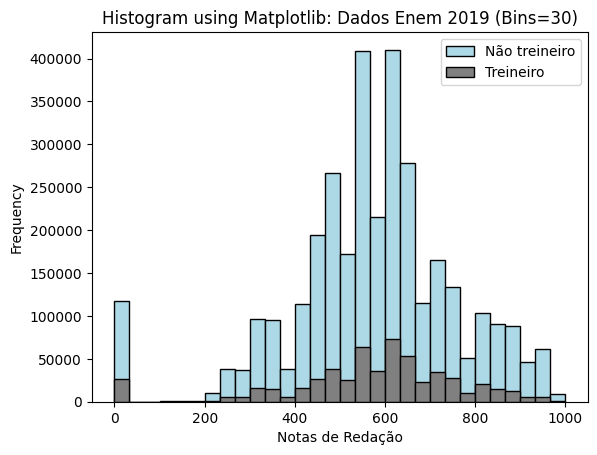

In [ ]:
# Create histogram using Matplotlib:

# Classe: Treineiro, onde: 0 se não for treineiro (pra valer); 1 se for treineiro (teste)
# Feature 1: Notas de redação
# Bins: 30

# Create histogram
plt.hist(data[data['treineiro']==0]['nota_redacao'], color='lightblue', bins=30, edgecolor='black')
plt.hist(data[data['treineiro']==1]['nota_redacao'], color='grey', bins=30, edgecolor='black')

# Add titles and labels
plt.title('Histogram using Matplotlib: Dados Enem 2019 (Bins=30)')
plt.xlabel('Notas de Redação')
plt.ylabel('Frequency')
plt.legend(["Não treineiro", "Treineiro"])

# Show plot
plt.show()

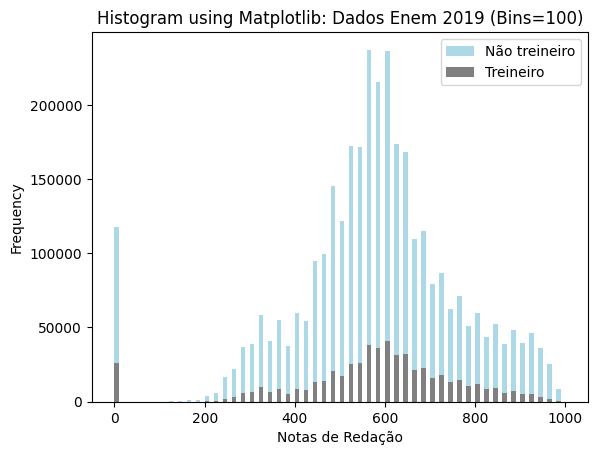

In [ ]:
# Create histogram using Matplotlib:

# Classe: Treineiro, onde: 0 se não for treineiro (pra valer); 1 se for treineiro (teste)
# Feature 1: Notas de redação
# Bins: 100

# Create histogram
plt.hist(data[data['treineiro']==0]['nota_redacao'], color='lightblue', bins=100)
plt.hist(data[data['treineiro']==1]['nota_redacao'], color='grey', bins=100)

# Add titles and labels
plt.title('Histogram using Matplotlib: Dados Enem 2019 (Bins=100)')
plt.xlabel('Notas de Redação')
plt.ylabel('Frequency')
plt.legend(["Não treineiro", "Treineiro"])

# Show plot
plt.show()

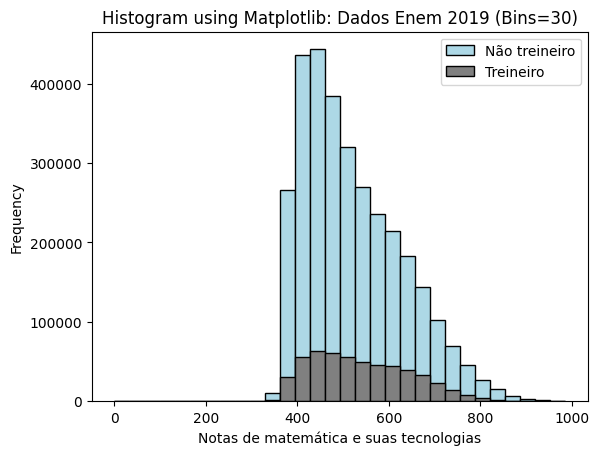

In [ ]:
# Create histogram using Matplotlib:

# Classe: Treineiro, onde: 0 se não for treineiro (pra valer); 1 se for treineiro (teste)
# Feature 2: Notas de matemática e suas tecnologias
# Bins: 30

# Create histogram
plt.hist(data[data['treineiro']==0]['nota_mt'], color='lightblue', bins=30, edgecolor='black')
plt.hist(data[data['treineiro']==1]['nota_mt'], color='grey', bins=30, edgecolor='black')

# Add titles and labels
plt.title('Histogram using Matplotlib: Dados Enem 2019 (Bins=30)')
plt.xlabel('Notas de matemática e suas tecnologias')
plt.ylabel('Frequency')
plt.legend(["Não treineiro", "Treineiro"])

# Show plot
plt.show()

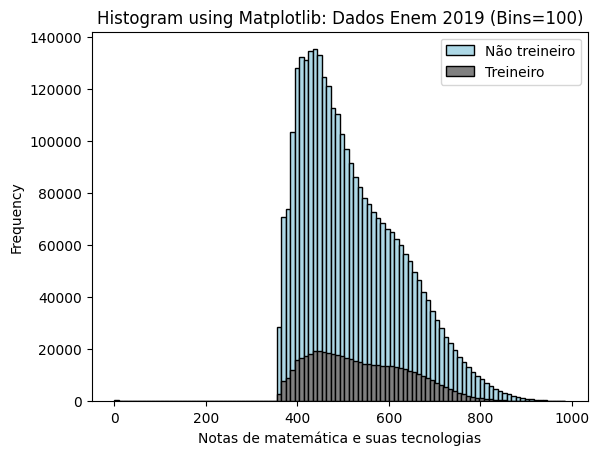

In [ ]:
# Create histogram using Matplotlib:

# Classe: Treineiro, onde: 0 se não for treineiro (pra valer); 1 se for treineiro (teste)
# Feature 2: Notas de matemática e suas tecnologias
# Bins: 100

# Create histogram
plt.hist(data[data['treineiro']==0]['nota_mt'], color='lightblue', bins=100, edgecolor='black')
plt.hist(data[data['treineiro']==1]['nota_mt'], color='grey', bins=100, edgecolor='black')

# Add titles and labels
plt.title('Histogram using Matplotlib: Dados Enem 2019 (Bins=100)')
plt.xlabel('Notas de matemática e suas tecnologias')
plt.ylabel('Frequency')
plt.legend(["Não treineiro", "Treineiro"])

# Show plot
plt.show()

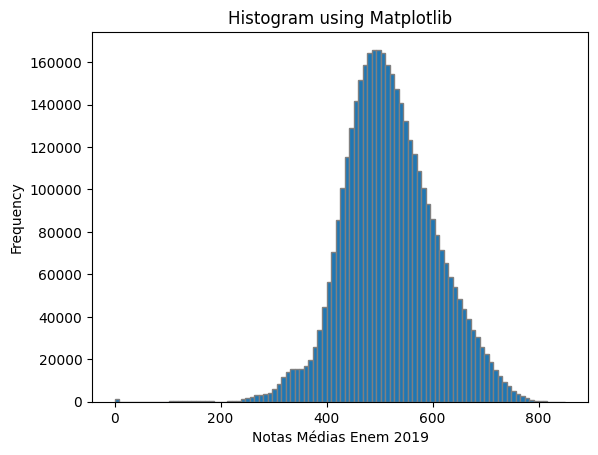

In [ ]:
# TESTE com a média das notas
# Create histogram using Matplotlib:

media_notas = data[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].mean(axis=1)

# Create histogram
plt.hist(media_notas, bins=100, edgecolor='grey')

# Add titles and labels
plt.title('Histogram using Matplotlib')
plt.xlabel('Notas Médias Enem 2019')
plt.ylabel('Frequency')

# Show plot
plt.show()



---



*Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados*:

No exemplo de dataset que utilizei, as notas de redação e de matemática e suas tecnologias são as features que podem ser utilizadas para prever a classe treineiro.

As notas de redação para os treineiros mostram uma distribuição mais uniforme, não apresntando muitos picos de notas altas. Já na distribuição para não treineiros é possível observar que ela tende a ter mais picos de notas altas.

Em relação às notas de matemática e suas tecnologias, é possível observar que os treineiros tem uma grande concentração nas notas entre 600 e 800, mas o não treineiros tem um maior número de bins para notas próximas de 1000.

No ponto de vista lógico para o aprendizado de máquina, isso faz sentido, pois treineiros são aqueles candidatos que ainda não finalizaram o ensino médio, ou seja, ainda não estudaram de forma mais aprofundada todas os assuntos que são cobrados no ENEM. Enquanto os não treineiros, por estarem disputando de fato uma vaga, tendem a ter maiores chances de tirarem notas mais altas.

Sobre o tamanho das bins:

Como pode ser observado no exemplo utilizando 30 e 100 bins, pode-se dizer que quanto maior o número de bins, maior a acurácia de previsão do modelo. Quanto menor o número de bins, mais detalhes são mostrados e por consequência algumas regras mais sensíveis podem ser aprendidas.



#####**B)** Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho. Use uma função de Python e uma tabela para obter os valores de probabilidade.

Contexto do **[Dataset](https://www.kaggle.com/datasets/shubhamgupta012/forest-soil-characteristics-dataset)**:

About Dataset

This dataset provides a comprehensive collection of forest soil characteristics, including various parameters and measurements. It contains data from different sites, each identified by a unique site code. The dataset includes information such as HouseID, REP# (replicate number), CoreID (core identification), Depth (depth range), LU_Current (current land use), LU_Previous (previous land use), Yr_Built (year built), Lawn Age, CoarseVeg (coarse vegetation), StructDen (structural density), BD (bulk density), N_Perc (nitrogen percentage), C_Perc (carbon percentage), C_N (carbon to nitrogen ratio), N_gm2 (nitrogen content in grams per square meter), C_gm2 (carbon content in grams per square meter), Sand_Perc (percentage of sand), Clay_Perc (percentage of clay), Silt_Perc (percentage of silt), MB Carbon (microbial biomass carbon), Respiration, Initial NO3 (+NO2) (initial nitrate and nitrite content), Initial NH4 (initial ammonium content), MBN (microbial biomass nitrogen), Net N Min (net nitrogen mineralization), and Net Nitr (net nitrification).

This dataset serves as a valuable resource for researchers, ecologists, and environmental scientists interested in studying forest soil characteristics and their impact on ecosystem dynamics. It can be used for various purposes, such as analyzing nutrient cycling, evaluating soil quality, and understanding the effects of land use changes on soil properties. The dataset provides a rich source of information that can contribute to a better understanding of forest ecosystems and support evidence-based decision-making in forestry and land management practices.

In [ ]:
# Dataset from Kaggle
path = kh.dataset_download('shubhamgupta012/forest-soil-characteristics-dataset')
print('Path to dataset files:', path)

data_soil = pd.read_csv(path + '/Raciti2011_from author.csv')
data_soil.head()

Path to dataset files: /kaggle/input/forest-soil-characteristics-dataset


,Site,HouseID,REP#,CoreID,Depth,LU_Current,LU_Previous,Yr_Built,Lawn Age,CoarseVeg,...,Sand_Perc,Clay_Perc,Silt_Perc,MB Carbon,Respiration,Initial NO3 (+NO2),Initial NH4,MBN,Net N Min,Net Nitr
0,Hillsdale 1,NaN,1,Hillsdale 1_1,0to10,Forest,NaN,NaN,NaN,NaN,...,20.9,13.5,65.6,248.0056495,5.843,0.277,10.297,65.433,0.417,0.070
1,Hillsdale 2,NaN,1,Hillsdale 2_1,0to10,Forest,NaN,NaN,NaN,NaN,...,33.9,12.2,53.9,461.5742368,8.219,9.164,7.807,95.314,0.386,0.351
2,Leakin 1,NaN,1,Leakin 1_1,0to10,Forest,NaN,NaN,NaN,NaN,...,38.3,14.0,47.6,414.5008999,5.853,9.069,0.819,65.638,0.180,0.186
3,Leakin 2,NaN,1,Leakin 2 _1,0to10,Forest,NaN,NaN,NaN,NaN,...,60.5,10.5,29.0,797.7840349,19.719,0.266,5.645,55.820,0.570,0.000
4,Oregon Ridge Mid 1,NaN,1,Oregon Ridge Mid 1_1,0to10,Forest,NaN,NaN,NaN,NaN,...,54.3,11.7,33.9,124.1263228,3.632,0.708,12.389,118.211,0.769,0.062


Média (μ): 1.10, Desvio Padrão (σ): 0.21


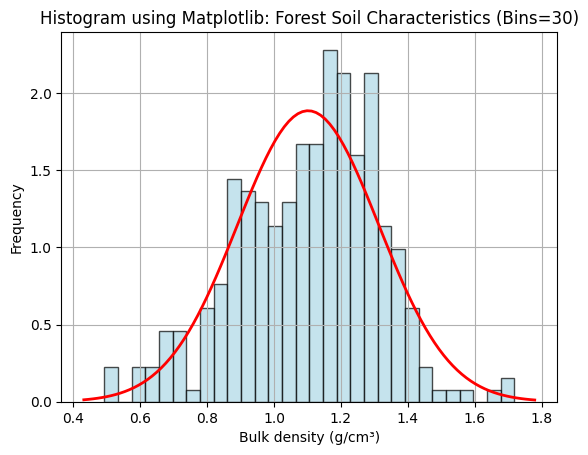

In [ ]:
# Create histogram using Matplotlib:

# Variável: BD (bulk density / densidade aparente do solo)
# Bins: 30

data_soil['BD'] = pd.to_numeric(data_soil['BD'])
data_soil['BD'] = data_soil['BD'].fillna(0)

df_soil = data_soil[(data_soil['BD']>0)]['BD']

# Create histogram
plt.hist(df_soil, color='lightblue', bins=30, edgecolor='black', density=True, alpha=0.7)

# Calculate mean and standart deviation
mean_bd = df_soil.mean()
std_bd = df_soil.std()
print(f'Média (μ): {mean_bd:.2f}, Desvio Padrão (σ): {std_bd:.2f}')

# Add titles and labels
plt.title('Histogram using Matplotlib: Forest Soil Characteristics (Bins=30)')
plt.xlabel('Bulk density (g/cm³)')
plt.ylabel('Frequency')

# Distribution that approximates the data

# Gerar valores para a curva densidade de probabilidade (PDF) da distribuição normal
# Criar uma faixa de valores de BD para plotar a PDF da normal
# Pega os limites do eixo x do histograma
xmin, xmax = plt.xlim()
# 100 pontos entre os limites
x = np.linspace(xmin, xmax, 100)
# Calcula os valores da PDF da normal para cada ponto x
p = norm.pdf(x, loc=mean_bd, scale=std_bd)

# Plotar a curva normal:
plt.plot(x, p, color='red', linewidth=2, label=f'PDF Normal (μ={mean_bd:.2f}, σ={std_bd:.2f})')

plt.grid(True)

# Show plot
plt.show()

In [ ]:
# Estudos de caso, como o exemplo da pizza:

print("Sabendo que é muito comum a terra preta ser frequentemente encontrada em sítios arqueológicos.")
print("E sabendo que a terra preta possui densidade aparente variando em média entre 0,99 e 1,52 g/cm³.")
print("\n")
print("Pergunta 1: Qual a probabilidade de uma amostra de solo ter BD maior que 0,99 e menor que 1,52 g/cm³?")
print("\n")

bd_1 = 0.99
bd_2 = 1.52

# Probabilidade não padronizada
prob_nao_padronizada = 1 - norm.cdf(bd_1, mean_bd, std_bd)
print(f'Probabilidade não padronizada para BD>0.99 g/cm³: {prob_nao_padronizada:.4f}')


prob_nao_padronizada = norm.cdf(bd_2, mean_bd, std_bd)
print(f'Probabilidade não padronizada para BD<1.52 g/cm³: {prob_nao_padronizada:.4f}')
print ("\n")

# Probabilidade padsronizada (usando Z-score)
z = (bd_1 - mean_bd) / std_bd  # Cálculo do Z-score
prob_padronizada = 1 - norm.cdf(z)  # Usando Z e distribuição padrão
print(f'Z-score: {z:.2f}, Probabilidade padronizada para BD>0.99 g/cm³: {prob_padronizada:.4f}')
print(f'Z-score: {z:.2f}, Probabilidade padronizada TABELADA para BD>0.99 g/cm³: 0.7019')
print("\n")

z = (bd_2 - mean_bd) / std_bd  # Cálculo do Z-score
prob_padronizada = norm.cdf(z)  # Usandp Z-score e distribuição padrão
print(f'Z-score: {z:.2f}, Probabilidade padronizada para BD<1.52 g/cm³: {prob_padronizada:.4f}')
print(f'Z-score: {z:.2f}, Probabilidade padronizada TABELADA para BD<1.52 g/cm³: 0.9761')
print("\n")

print("Pergunta 2: Qual a probabilidade de uma amostra de solo ter BD menor que 0,99 g/cm³?")
print("\n")

# Probabilidade não padronizada
prob_nao_padronizada = norm.cdf(bd_1, mean_bd, std_bd)
print(f'Probabilidade não padronizada para BD<0,99 g/cm³: {prob_nao_padronizada:.4f}')

# Probabilidade padronizada (z-score)
z = (bd_1 - mean_bd) / std_bd  # Cálculo do Z-score
prob_padronizada = norm.cdf(z)  # Usando Z-score e distribuição padrão
print(f'Z-score: {z:.2f}, Probabilidade padronizada para BD<0,99 g/cm³: {prob_padronizada:.4f}')
print(f'Z-score: {z:.2f}, Probabilidade padronizada TABELADA para BD<0,99 g/cm³: 0.2981')
print("\n")

Sabendo que é muito comum a terra preta ser frequentemente encontrada em sítios arqueológicos.
E sabendo que a terra preta possui densidade aparente variando em média entre 0,99 e 1,52 g/cm³.


Pergunta 1: Qual a probabilidade de uma amostra de solo ter BD maior que 0,99 e menor que 1,52 g/cm³?


Probabilidade não padronizada para BD>0.99 g/cm³: 0.7018
Probabilidade não padronizada para BD<1.52 g/cm³: 0.9759


Z-score: -0.53, Probabilidade padronizada para BD>0.99 g/cm³: 0.7018
Z-score: -0.53, Probabilidade padronizada TABELADA para BD>0.99 g/cm³: 0.7019


Z-score: 1.98, Probabilidade padronizada para BD<1.52 g/cm³: 0.9759
Z-score: 1.98, Probabilidade padronizada TABELADA para BD<1.52 g/cm³: 0.9761


Pergunta 2: Qual a probabilidade de uma amostra de solo ter BD menor que 0,99 g/cm³?


Probabilidade não padronizada para BD<0,99 g/cm³: 0.2982
Z-score: -0.53, Probabilidade padronizada para BD<0,99 g/cm³: 0.2982
Z-score: -0.53, Probabilidade padronizada TABELADA para BD<0,99 g/cm³: 0.2981

Isso pode ser útil para meu trabalho, pois a análise do solo será algo que precisarei trabalhar. Tipos de solos indicam populações e tipo de cultivos que já existiram em determinada região, impactando diretamente na probabilidade de alguns tipos de solos serem mais propensos a esterem presentes quando são encontrados determinados sítios arqueológicos.

In [ ]:
# TESTE para: "Use uma função de Python e uma tabela para obter os valores de probabilidade".
dados_soil_tabela = []

for x_bd in df_soil:
    z_score = (x_bd - mean_bd) / std_bd
    prob_bd_maior = 1 - norm.cdf(x_bd, mean_bd, std_bd)
    prob_bd_menor = norm.cdf(x_bd, mean_bd, std_bd)
    dados_soil_tabela.append({
        'BD (g/cm³)': x_bd,
        'Z-score': z_score,
        'P(BD > X)': prob_bd_maior,
        'P(BD < X)': prob_bd_menor
    })

tabela_prob = pd.DataFrame(dados_soil_tabela)
print(tabela_prob)

     BD (g/cm³)   Z-score  P(BD > X)  P(BD < X)
0         0.909 -0.912596   0.819272   0.180728
1         0.833 -1.271954   0.898305   0.101695
2         0.927 -0.827484   0.796019   0.203981
3         0.688 -1.957572   0.974860   0.025140
4         0.494 -2.874881   0.997979   0.002021
..          ...       ...        ...        ...
317       1.245  0.676146   0.249474   0.750526
318       1.297  0.922023   0.178258   0.821742
319       1.420  1.503616   0.066340   0.933660
320       1.662  2.647889   0.004050   0.995950
321       0.935 -0.789657   0.785136   0.214864

[322 rows x 4 columns]


#####**C)** Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides

Probabilidade para s=0.95: 26.1%
Probabilidade para s=0.80: 0.11%
Probabilidade simulada para s=0.95: 26.0%
Probabilidade simulada para s=0.80: 0.11%


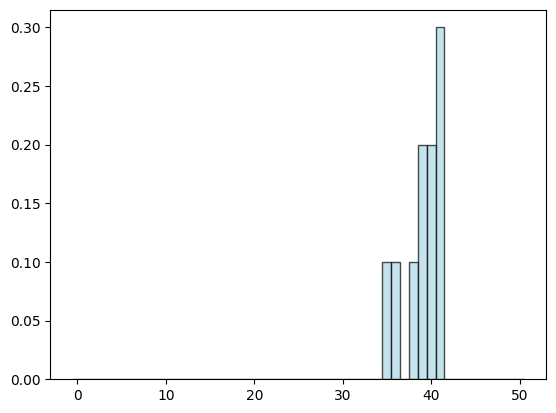

In [ ]:
# Probabilidade binomial
def probabilidade_binomial(n, x, s):
    q = 1 - s
    return math.comb(n, x) * (s ** x) * (q ** (n - x))

# Amostras aleatórias
def simular_amostras(n, x, s, amostras):
    np.random.seed(0) # Para sempre fornecer a mesma série de números
    simulacoes = np.random.binomial(n=n, p=s, size=amostras)
    contagem = np.sum(simulacoes == x)
    return contagem/amostras

# Parâmetros
n = 50
x = 48
amostras = 242482

# Cálculo pra s=0.95 e s=0.80
s1 = 0.95
prob_s1 = probabilidade_binomial(n, x, s1)

s2 = 0.80
prob_s2 = probabilidade_binomial(n, x, s2)

# Cálculo das simulações para s=0.95
prob_amostras_s1 = simular_amostras(n, x, s1, amostras)

# Cálculo das simulações pra s=0.80
prob_amostras_s2 = simular_amostras(n, x, s2, amostras)

print(f"Probabilidade para s=0.95: {prob_s1:.1%}")
print(f"Probabilidade para s=0.80: {prob_s2:.2%}")
print(f"Probabilidade simulada para s=0.95: {prob_amostras_s1:.1%}")
print(f"Probabilidade simulada para s=0.80: {prob_amostras_s2:.2%}")

# Create histograma para as 10 primeiras amostras
amostras = 10
np.random.seed(0)
simulacoes = np.random.binomial(n=n, p=s2, size=amostras)

plt.hist(simulacoes, bins=np.arange(0, n+2)-0.5, color='lightblue', edgecolor='black', alpha=0.7, density=True)
plt.show()

Observa-se que quando mudamos o valor de s=0,95 para s=0,80, a probabilidade de 48 sucessos em 50 tentativas diminui bastante. A diminuição do valor de *s* afeta consideravelmente a equação da probabilidade binomial. Com 242.485 amostras aleatórias testadas, os resultados simulados ficaaram muito próximos dos resultados  obtidos a partir do cálculo explícito. Isso significa que quanto mais amostras temos, mais a probabilidade simulada se aproxima do valor teórico.